In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpl_toolkits as mplot3d
import scipy as sp
pd.set_option("display.max_columns", None)
from tqdm import tqdm
tqdm.pandas()

In [2]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [3]:
# DF1 = Total and facet scores, and score per question
df1 = pd.read_excel('Risk Literacy data_Typeform_2024_common investors.xlsx')
df1

# Please indicate your Gender.  \
0    a28lkw5o4chja28l296t2ddl77ylgfj6                         Male   
1    7vt0kr5hood7mfi43fpx87vt0kg8owo8                       Female   
2    yjdelzbgziptekhusv37yjdelzi2r6wf                       Female   
3    voqyzkmdac7sjm5lkd80jvoqyzkgpil4                       Female   
4    lm1nk23krchy0bb0lm163osjggnzg4vl                         Male   
..                                ...                          ...   
980  9xvd4k6mdkg73uby9xve2ewi5gk7n5lm                         Male   
981  mcgfu94gspr31f82unniimcgfucmk4b9                         Male   
982  0usd6ay8aptneycurlhtd0usd6yw8rdv                       Female   
983  36dwbg1o3wywd2os736dwb4lnn2fmsox                         Male   
984  cjs9d873blyjp84wcjs9mo8nkro9533v                         Male   

    Please mark your age (in years) What is currently your highest Education?  \
0                           25 - 35                             Post Graduate   
1                           25 - 35              Diploma or vocation training   
2                           25 - 35                           Ph.D. or higher   
3                           25 - 35                            Under Graduate   
4                           25 - 35                             Post Graduate   
..                              ...                                       ...   
980                         25 - 35                             Post Graduate   
981                         36 - 45                           Ph.D. or higher   
982                         36 - 45                           Ph.D. or higher   
983                         46 - 55                             Post Graduate   
984                         25 - 35                             Post Graduate   

                 Please state your current occupation.  \
0    Employee/Consultant in Other than the Finance ...   
1    Employee/Consultant in Other than the Finance ...   
2    Employee/Consultant in Other than the Finance ...   
3                         Entrepreneur or Own Business   
4                         Entrepreneur or Own Business   
..                                                 ...   
980  Employee/Consultant in Other than the Finance ...   
981  Employee/Consultant in Other than the Finance ...   
982  Investment Professional, i.e. stock broker/tra...   
983  Employee/Consultant in Other than the Finance ...   
984  Employee/Consultant in Other than the Finance ...   

     How do you describe your willingness to take financial risk in general?  \
0                                                    6                         
1                                                    6                         
2                                                    7                         
3                                                    3                         
4                                                    3                         
..                                                 ...                         
980                                                  6                         
981                                                  7                         
982                                                  5                         
983                                                  3                         
984                                                  3                         

     Given the number of years that you have held various investments and the amount of investing you might have done, what degree of investment experience in the stock market do you have?  \
0                                                    3                                                                                                                                         
1                                                    9                                                                                                                              

In [4]:
matchCol = ["q8_2_1", "q8_2_2", "q8_2_3", "q8_2_4", "q8_2_5", "q8_3", "q8_4", "q8_5berlin_1", 
            "q8_5london_1", "q8_5paris_1", "q8_6", "q8_7", "q9_1_1", "q9_2_1", "q9_3",
            "q10_1_1", "q10_2_1", "q10_3_1", "q10_4"]
df1[ matchCol ] = 0

df1.columns

Index(['#', 'Please indicate your Gender.', 'Please mark your age (in years)',
       'What is currently your highest Education?',
       'Please state your current occupation.',
       'How do you describe your willingness to take financial risk in general?',
       'Given the number of years that you have held various investments and the amount of investing you might have done, what degree of investment experience in the stock market do you have?',
       'If an expert tries to worry or scare me, i.e. a financial advisor about my financial situation, I choose another expert.',
       'I only buy a financial product I understand.', 'I trust doctors.',
       'When I want to buy a bigger item like a refrigerator or an expensive item of clothing, I wait a month to see whether I still want it and only buy it then.',
       'I always keep in mind that everything I do on the web could be used to my disadvantage.',
       'In my household, we/I spend:', 'In my household, we/I',
       '_Dis

In [5]:
df1["q8_2_1"] = np.where(df1["HIV test"] == "Yes", 1, 2)
df1["q8_2_2"] = np.where(df1["Fingerprint"] == "Yes", 1, 2)
df1["q8_2_3"] = np.where(df1["DNA test"] == "Yes", 1, 2)
df1["q8_2_4"] = np.where(df1["Cancer screening test"] == "Yes", 1, 2)
df1["q8_2_5"] = np.where(df1["Professional horoscope"] == "Yes", 1, 2)

df1["q8_3"] = np.where(df1["A study estimates that eating 100g chocolate everyday increases the risk of obesity by 20%.  Which of the following statements is true?"] == "The lower the quality of the study, the more likely that future studies will change the risk estimate.", 1,
                          np.where(df1["A study estimates that eating 100g chocolate everyday increases the risk of obesity by 20%.  Which of the following statements is true?"] == "The higher the quality of the study, the more likely that future studies will change the risk estimate.", 2,
                                  np.where(df1["A study estimates that eating 100g chocolate everyday increases the risk of obesity by 20%.  Which of the following statements is true?"] == "Irrespective of the quality of the study, future studies will not change the risk estimate.", 3,
                                          np.where(df1["A study estimates that eating 100g chocolate everyday increases the risk of obesity by 20%.  Which of the following statements is true?"] == "Irrespective of the quality of the study, future studies will change the risk estimate substantially anyway.", 4,0
                                                  )
                                          )
                                  )
                         )


df1["q8_4"] = np.where(df1["There is an official prediction that the national stock market will grow 2% annually over the next 5 years.  This means that…"] == "the growth rate will be 0.4% on average each year", 1,
                          np.where(df1["There is an official prediction that the national stock market will grow 2% annually over the next 5 years.  This means that…"] == "the growth rate over five years will be exactly 2%", 2,
                                  np.where(df1["There is an official prediction that the national stock market will grow 2% annually over the next 5 years.  This means that…"] == "the growth rate over five years will be between 1% and 3%", 3,
                                          np.where(df1["There is an official prediction that the national stock market will grow 2% annually over the next 5 years.  This means that…"] == "it is not possible to predict the growth rate with certainty.", 4,0
                                                  )
                                          )
                                  )
                         )

In [6]:
df1["HIV test"].value_counts()

HIV test
Yes    631
No     354
Name: count, dtype: int64

In [7]:
df1["q8_2_1"].value_counts()

q8_2_1
1    631
2    354
Name: count, dtype: int64

In [8]:
df1["q8_5berlin_1"] = np.where(df1["*Mumbai * A = 9 out of 10000   *OR   * B = 1 out of 1000"] == "A", 1, 2)
df1["q8_5london_1"] = np.where(df1["*Bengaluru * A = 0.7%   *OR  * B = 0.099%"] == "A", 1, 2)
df1["q8_5paris_1"] = np.where(df1["*Kolkata * A = 0.61%   *OR   * B = 6 out of 10000"] == "A", 1, 2)

df1["q8_6"] = np.where(df1["Imagine you are told that a new medication increases the number of people who recover from a disease from 2 out of 1,000 to 4 out of 1,000.  This implies:"] == "The medication increases recovery by 100%", 1,
                          np.where(df1["Imagine you are told that a new medication increases the number of people who recover from a disease from 2 out of 1,000 to 4 out of 1,000.  This implies:"] == "The medication increases recovery by 50%", 2,
                                   np.where(df1["Imagine you are told that a new medication increases the number of people who recover from a disease from 2 out of 1,000 to 4 out of 1,000.  This implies:"] == "The medication increases recovery by 2%", 3,
                                            np.where(df1["Imagine you are told that a new medication increases the number of people who recover from a disease from 2 out of 1,000 to 4 out of 1,000.  This implies:"] == "None of the above is implied.", 4, 0
                                                    )
                                           )
                                  )
                         )

df1["q8_7"] = np.where(df1["A new policy intervention increases the number of people who are employed by 20%. This statistic implies that the intervention increases the number of people who are employed from:"] == "5 in 100 people prior to the intervention to 6 out of 100 people after the intervention", 1,
                          np.where(df1["A new policy intervention increases the number of people who are employed by 20%. This statistic implies that the intervention increases the number of people who are employed from:"] == "100 in 10,000 people prior to the intervention to 120 out of 10,000 people after the intervention", 2,
                                   np.where(df1["A new policy intervention increases the number of people who are employed by 20%. This statistic implies that the intervention increases the number of people who are employed from:"] == "70 in 100 people prior to the intervention to 90 out of 100 people after the intervention", 3,
                                            np.where(df1["A new policy intervention increases the number of people who are employed by 20%. This statistic implies that the intervention increases the number of people who are employed from:"] == "it is not possible to determine which of the answers is correct given the information provided", 4, 0
                                                    )
                                           )
                                  )
                         )


df1["q9_1_1"] = df1["Approximately what percentage (%) of people who die from cancer die from colon cancer, breast cancer, and prostate cancer taken together?"].copy()
df1["q9_2_1"] = df1["The following figure shows the number of men and women among a group of smartphone users. The total number of circles is 100. \n\nHow many more men than women are there among the 100 people using a smartphone?"].copy()

df1["q9_3"] = np.where(df1["In a magazine you see two advertisements, one on page 5 and another on page 12. Each is for a different drug for treating heart disease, and each includes a graph showing the effectiveness of the drug compared to a placebo (sugar pill).\n\nCompared to the placebo, which treatment leads to a larger decrease in the percentage of patients who die?"] == "Crosicol", 1,
                          np.where(df1["In a magazine you see two advertisements, one on page 5 and another on page 12. Each is for a different drug for treating heart disease, and each includes a graph showing the effectiveness of the drug compared to a placebo (sugar pill).\n\nCompared to the placebo, which treatment leads to a larger decrease in the percentage of patients who die?"] == "Hertinol", 2,
                                   np.where(df1["In a magazine you see two advertisements, one on page 5 and another on page 12. Each is for a different drug for treating heart disease, and each includes a graph showing the effectiveness of the drug compared to a placebo (sugar pill).\n\nCompared to the placebo, which treatment leads to a larger decrease in the percentage of patients who die?"] == "They are equal", 3,
                                            np.where(df1["In a magazine you see two advertisements, one on page 5 and another on page 12. Each is for a different drug for treating heart disease, and each includes a graph showing the effectiveness of the drug compared to a placebo (sugar pill).\n\nCompared to the placebo, which treatment leads to a larger decrease in the percentage of patients who die?"] == "Can’t say", 4, 0
                                                    )
                                           )
                                  )
                         )

In [9]:
df1["In a magazine you see two advertisements, one on page 5 and another on page 12. Each is for a different drug for treating heart disease, and each includes a graph showing the effectiveness of the drug compared to a placebo (sugar pill).\n\nCompared to the placebo, which treatment leads to a larger decrease in the percentage of patients who die?"].value_counts()

In a magazine you see two advertisements, one on page 5 and another on page 12. Each is for a different drug for treating heart disease, and each includes a graph showing the effectiveness of the drug compared to a placebo (sugar pill).\n\nCompared to the placebo, which treatment leads to a larger decrease in the percentage of patients who die?
They are equal    324
Hertinol          298
Crosicol          267
Can’t say          96
Name: count, dtype: int64

In [10]:
df1["q9_3"].value_counts()

q9_3
3    324
2    298
1    267
4     96
Name: count, dtype: int64

In [11]:
df1["q10_1_1"] = df1["Imagine that we flip a fair coin 1,000 times. What is your best guess about how many times the coin will come up heads in 1,000 flips? \n\n\_\_\_\_\_\_ times out of 1,000."].copy()
df1["q10_2_1"] = df1["In the Bingo Lottery, the chance of winning a $10 prize is 1%. What is your best guess about how many people will win a $10 prize if 1,000 people each buy a single ticket for Bingo Lottery?\n\n\_\_\_\_\_\_ person(s) out of 1,000."].copy()
df1["q10_3_1"] = df1["In a sweepstakes, the chance of winning a car is 1 in 1,000. What percentage of tickets for the sweepstakes wins a car?\n\n\_\_\_\_\_ % of tickets"].copy()

df1["q10_4"] = np.where(df1["About 10 out of 1,000 children develop Down syndrome. In a Down syndrome test, 9 out of these 10 children with Down syndrome tested positive. Out of the 990 children without Down syndrome 50 nevertheless tested positive. Among those women with a positive test result concerning their child how many actually have a child with Down syndrome? [Select one response only]"] == "9 out of 59", 1,
                          np.where(df1["About 10 out of 1,000 children develop Down syndrome. In a Down syndrome test, 9 out of these 10 children with Down syndrome tested positive. Out of the 990 children without Down syndrome 50 nevertheless tested positive. Among those women with a positive test result concerning their child how many actually have a child with Down syndrome? [Select one response only]"] == "9 out of 10", 2,
                                   np.where(df1["About 10 out of 1,000 children develop Down syndrome. In a Down syndrome test, 9 out of these 10 children with Down syndrome tested positive. Out of the 990 children without Down syndrome 50 nevertheless tested positive. Among those women with a positive test result concerning their child how many actually have a child with Down syndrome? [Select one response only]"] == "59 out of 1000", 3,
                                            np.where(df1["About 10 out of 1,000 children develop Down syndrome. In a Down syndrome test, 9 out of these 10 children with Down syndrome tested positive. Out of the 990 children without Down syndrome 50 nevertheless tested positive. Among those women with a positive test result concerning their child how many actually have a child with Down syndrome? [Select one response only]"] == "59 out of 100", 4, 0
                                                    )
                                           )
                                  )
                         )

In [12]:
df1["About 10 out of 1,000 children develop Down syndrome. In a Down syndrome test, 9 out of these 10 children with Down syndrome tested positive. Out of the 990 children without Down syndrome 50 nevertheless tested positive. Among those women with a positive test result concerning their child how many actually have a child with Down syndrome? [Select one response only]"].value_counts()

About 10 out of 1,000 children develop Down syndrome. In a Down syndrome test, 9 out of these 10 children with Down syndrome tested positive. Out of the 990 children without Down syndrome 50 nevertheless tested positive. Among those women with a positive test result concerning their child how many actually have a child with Down syndrome? [Select one response only]
59 out of 1000    340
9 out of 10       258
9 out of 59       196
59 out of 100     191
Name: count, dtype: int64

In [13]:
df1["#"].value_counts()

#
a28lkw5o4chja28l296t2ddl77ylgfj6    1
fm2hveibtn6mdveqflo5efm2hveik0vm    1
10utcgrue12b2xedn0r10utc1is68haw    1
bpvq3o0b2hghvxhrbpwopje66rjbdxs4    1
68m5g9tx9nq03tp68m5g7sqc3zilip66    1
                                   ..
ne5rksr7safoeek2b0eaine5rkylq3xg    1
mwpq6n56r255bmwpq68irzfdh8iggkir    1
hd74us743tivcqf5elhd74usdvvgsp1h    1
dunyrcag58e96j4vidunyrxcnrdnur2e    1
cjs9d873blyjp84wcjs9mo8nkro9533v    1
Name: count, Length: 985, dtype: int64

In [14]:
scoreColumns = ["certainty1", "certainty2", "certainty3", "certainty4", "certainty5", "uncertainty1", "uncertainty2", "numeracy1", "numeracy2", "numeracy3", "numeracy4", "numeracy5", "graph1", "graph2", "graph3", "riskcalculation1", "riskcalculation2", "riskcalculation3", "riskcalculation4"]
df1[scoreColumns] = 0

In [15]:
# Assigning scores

def scoring1(df1Facet):
    df1Facet.loc[ df1Facet["q8_2_1"] == 2, "certainty1"] = 1
    df1Facet.loc[ df1Facet["q8_2_2"] == 2, "certainty2"] = 1
    df1Facet.loc[ df1Facet["q8_2_3"] == 2, "certainty3"] = 1
    df1Facet.loc[ df1Facet["q8_2_4"] == 2, "certainty4"] = 1
    df1Facet.loc[ df1Facet["q8_2_5"] == 2, "certainty5"] = 1

    df1Facet.loc[ df1Facet["q8_3"] == 1, "uncertainty1"] = 1
    df1Facet.loc[ df1Facet["q8_4"] == 4, "uncertainty2"] = 1

    df1Facet.loc[ df1Facet["q8_5berlin_1"] == 2, "numeracy1"] = 1
    df1Facet.loc[ df1Facet["q8_5london_1"] == 1, "numeracy2"] = 1
    df1Facet.loc[ df1Facet["q8_5paris_1"] == 1, "numeracy3"] = 1
    df1Facet.loc[ df1Facet["q8_6"] == 1, "numeracy4"] = 1
    df1Facet.loc[ df1Facet["q8_7"] == 4, "numeracy5"] = 1

    df1Facet.loc[ df1Facet["q9_1_1"] == 25, "graph1"] = 1
    df1Facet.loc[ df1Facet["q9_2_1"] == 20, "graph2"] = 1
    df1Facet.loc[ df1Facet["q9_3"] == 3, "graph3"] = 1

    df1Facet.loc[ df1Facet["q10_1_1"] == 500, "riskcalculation1"] = 1
    df1Facet.loc[ df1Facet["q10_2_1"] == 10, "riskcalculation2"] = 1
    df1Facet.loc[ (df1Facet["q10_3_1"] == 0.1) | (df1Facet["q10_3_1"] == ".1") | (df1Facet["q10_3_1"] == ",1") , "riskcalculation3"] = 1
    df1Facet.loc[ df1Facet["q10_4"] == 1, "riskcalculation4"] = 1

    # Assigning total scores
    #df1Facet["Certainty score_5"] = df1Facet["certainty1"] + df1Facet["certainty2"] + df1Facet["certainty3"] + df1Facet["certainty4"] + df1Facet["certainty5"]
    #df1Facet["Uncertainty score_5"] = df1Facet["uncertainty1"] + df1Facet["uncertainty2"]

    #df1Facet["Number Comprehension score_5"] = df1Facet["numeracy1"] + df1Facet["numeracy2"] + df1Facet["numeracy3"] + df1Facet["numeracy4"] + df1Facet["numeracy5"]
    #df1Facet["Graph Comprehension score_5"] = df1Facet["graph1"] + df1Facet["graph2"] + df1Facet["graph3"]

    #df1Facet["Calculation score_4"] = df1Facet["riskcalculation1"] + df1Facet["riskcalculation2"] + df1Facet["riskcalculation3"] + df1Facet["riskcalculation4"]

    #df1Facet["Total Score_19"] = df1Facet["Certainty score_5"] + df1Facet["Uncertainty score_5"] + df1Facet["Number Comprehension score_5"] + df1Facet["Graph Comprehension score_5"] + df1Facet["Calculation score_4"]

    return df1Facet

In [16]:
df1Facet = df1.groupby(["#"]).progress_apply(scoring1)

100%|███████████████████████████████████████████████████████████████████████████████| 985/985 [00:06<00:00, 151.45it/s]


In [17]:
df1Facet

#  \
#                                                                        
00dn8csjzlekx6gzhrcv00dn8csj32tz 744  00dn8csjzlekx6gzhrcv00dn8csj32tz   
00uemucogcgyu20vn9m00ue219u9ddic 926  00uemucogcgyu20vn9m00ue219u9ddic   
00ujdxbfoya0donu8r00ujcjdkojc99x 581  00ujdxbfoya0donu8r00ujcjdkojc99x   
01ro2iftnum5v4cn01r03c75aa24emhq 720  01ro2iftnum5v4cn01r03c75aa24emhq   
020g9exzbof6i3x0ttvg020g9es6rcp0 896  020g9exzbof6i3x0ttvg020g9es6rcp0   
...                                                                ...   
zpi483wl5wg19f1zfyztzpi48hb7uom3 953  zpi483wl5wg19f1zfyztzpi48hb7uom3   
zstpq23h1x3ilab8s8vsrbkw8t4zstpq 427  zstpq23h1x3ilab8s8vsrbkw8t4zstpq   
ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9 155  ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9   
ztgyef6dpzjhstztgy57o48rtwg8eef8 497  ztgyef6dpzjhstztgy57o48rtwg8eef8   
zyhky1g8uxcmfhhdd07lzyhky1g75spd 913  zyhky1g8uxcmfhhdd07lzyhky1g75spd   

                                     Please indicate your Gender.  \
#                                                                   
00dn8csjzlekx6gzhrcv00dn8csj32tz 744                         Male   
00uemucogcgyu20vn9m00ue219u9ddic 926                       Female   
00ujdxbfoya0donu8r00ujcjdkojc99x 581                       Female   
01ro2iftnum5v4cn01r03c75aa24emhq 720                       Female   
020g9exzbof6i3x0ttvg020g9es6rcp0 896                       Female   
...                                                           ...   
zpi483wl5wg19f1zfyztzpi48hb7uom3 953                         Male   
zstpq23h1x3ilab8s8vsrbkw8t4zstpq 427                         Male   
ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9 155                         Male   
ztgyef6dpzjhstztgy57o48rtwg8eef8 497                       Female   
zyhky1g8uxcmfhhdd07lzyhky1g75spd 913                         Male   

                                     Please mark your age (in years)  \
#                                                                      
00dn8csjzlekx6gzhrcv00dn8csj32tz 744                         25 - 35   
00uemucogcgyu20vn9m00ue219u9ddic 926                         25 - 35   
00ujdxbfoya0donu8r00ujcjdkojc99x 581                         25 - 35   
01ro2iftnum5v4cn01r03c75aa24emhq 720                         18 - 25   
020g9exzbof6i3x0ttvg020g9es6rcp0 896                         36 - 45   
...                                                              ...   
zpi483wl5wg19f1zfyztzpi48hb7uom3 953                         25 - 35   
zstpq23h1x3ilab8s8vsrbkw8t4zstpq 427                         18 - 25   
ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9 155                         25 - 35   
ztgyef6dpzjhstztgy57o48rtwg8eef8 497                         46 - 55   
zyhky1g8uxcmfhhdd07lzyhky1g75spd 913                         25 - 35   

                                     What is currently your highest Education?  \
#                                                                                
00dn8csjzlekx6gzhrcv00dn8csj32tz 744                            Under Graduate   
00uemucogcgyu20vn9m00ue219u9ddic 926                             Post Graduate   
00ujdxbfoya0donu8r00ujcjdkojc99x 581                            Under Graduate   
01ro2iftnum5v4cn01r03c75aa24emhq 720                            Under Graduate   
020g9exzbof6i3x0ttvg020g9es6rcp0 896                             Post Graduate   
...                                                                        ...   
zpi483wl5wg19f1zfyztzpi48hb7uom3 953                             Post Graduate   
zstpq23h1x3ilab8s8vsrbkw8t4zstpq 427                            Under Graduate   
ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9 155                             Post Graduate   
ztgyef6dpzjhstztgy57o48rtwg8eef8 497                             Post Graduate   
zyhky1g8uxcmfhhdd07lzyhky1g75spd 913              Diploma or vocation training   

                                                  Please state your current occupation.  \
#                                                                                         
00dn8csjzlekx6gzhrcv00

In [18]:
df1 = df1Facet.copy()

In [19]:
 df1["What is currently your highest Education?"].value_counts()

What is currently your highest Education?
Post Graduate                   525
Under Graduate                  266
Ph.D. or higher                 106
Diploma or vocation training     56
School degree (X or XII)         32
Name: count, dtype: int64

In [20]:
# Age groups = [2,3,4]
# Age group 2 = 18 to 35 y/o
# Age group 3 = 36 to 59 y/o
# Age group 4 = 60 to 75 y/o (75 y/o, i.e, within the scope of the data we have, it can mean 60 and above also)
df1["Please mark your age (in years)"].value_counts()

Please mark your age (in years)
25 - 35     495
36 - 45     239
18 - 25     144
46 - 55      76
56 - 65      25
Above 65      6
Name: count, dtype: int64

In [21]:
df1["age_rec"] = np.where(df1["Please mark your age (in years)"] == "25 - 35", 2,
                        np.where(df1["Please mark your age (in years)"] == "36 - 45", 3,
                                 np.where(df1["Please mark your age (in years)"] == "18 - 25", 2,
                                          np.where(df1["Please mark your age (in years)"] == "46 - 55", 3,
                                                   np.where(df1["Please mark your age (in years)"] == "Above 65", 4,
                                                            np.where(df1["Please mark your age (in years)"] == "56 - 65", 4,0
                                                                    )
                                                           )
                                                  )
                                         )
                                )
                       )

In [22]:
df1["age"] = np.where(df1["Please mark your age (in years)"] == "25 - 35", (25+35)/2,
                        np.where(df1["Please mark your age (in years)"] == "36 - 45", (36+45)/2,
                                 np.where(df1["Please mark your age (in years)"] == "18 - 25", (18+25)/2,
                                          np.where(df1["Please mark your age (in years)"] == "46 - 55", (46+55)/2,
                                                   np.where(df1["Please mark your age (in years)"] == "Above 65", (65+75)/2,
                                                            np.where(df1["Please mark your age (in years)"] == "56 - 65", (56+65)/2,0
                                                                    )
                                                           )
                                                  )
                                         )
                                )
                       )

In [23]:
df1["Please indicate your approximate annual personal income from all sources for last year"].value_counts()

Please indicate your approximate annual personal income from all sources for last year
5,00,000 - 15,00,000     425
15,00,001 - 25,00,000    197
&lt; 5,00,000            159
25,00,001 - 35,00,000     77
35,00,001 - 45,00,000     64
&gt; 45,00,000            63
Name: count, dtype: int64

In [24]:
df1["income"] = np.where(df1["Please indicate your approximate annual personal income from all sources for last year"] == "&lt; 5,00,000", 1,
                        np.where(df1["Please indicate your approximate annual personal income from all sources for last year"] == "5,00,000 - 15,00,000", 2,
                                 np.where(df1["Please indicate your approximate annual personal income from all sources for last year"] == "15,00,001 - 25,00,000", 3,
                                          np.where(df1["Please indicate your approximate annual personal income from all sources for last year"] == "25,00,001 - 35,00,000", 4,
                                                   np.where(df1["Please indicate your approximate annual personal income from all sources for last year"] == "35,00,001 - 45,00,000", 5,
                                                            np.where(df1["Please indicate your approximate annual personal income from all sources for last year"] == "&gt; 45,00,000", 6,0
                                                                    )
                                                           )
                                                  )
                                         )
                                )
                       )

In [25]:
df1["isced"] = np.where(df1["What is currently your highest Education?"] == "Post Graduate", 1,
                        np.where(df1["What is currently your highest Education?"] == "Under Graduate", 2,
                                 np.where(df1["What is currently your highest Education?"] == "Ph.D. or higher", 2,
                                          np.where(df1["What is currently your highest Education?"] == "Diploma or vocation training", 2,
                                                   np.where(df1["What is currently your highest Education?"] == "School degree (X or XII)", 3, 0
                                                           )
                                                  )
                                         )
                                )
                       )

In [26]:
#df1["age"] = df1["Please mark your age (in years)"]
# df1["income"] = df1["Please indicate your approximate annual personal income from all sources for last year"]
df1["wealth"] = df1["Please provide a rough guess (in Indian Rupees) of the worth of your household's assets. Please do not forget to correct it for your debts, such as a mortgage or any loans you might have."]

df1["Certainty_3"] = df1["certainty1"] + df1["certainty2"] + df1["certainty3"]
df1["RiskComprehension_4"] = df1["riskcalculation1"] + df1["riskcalculation2"] + df1["riskcalculation3"] + df1["riskcalculation4"]
df1["GraphLiteracy_3"] = df1["graph1"] + df1["graph2"] + df1["graph3"]
df1["Numeracy_3"] = df1["numeracy1"] + df1["numeracy2"] + df1["numeracy3"]
df1["Bayesianreasoning_1"] = df1["numeracy4"]
df1["TotalScore_14"] = df1["Certainty_3"] + df1["RiskComprehension_4"] + df1["GraphLiteracy_3"] + df1["Numeracy_3"] + df1["Bayesianreasoning_1"]

df1["Certainty_%"] = df1["Certainty_3"] / 3 * 100
df1["RiskComprehension_%"] = df1["RiskComprehension_4"] / 4 * 100
df1["GraphLiteracy_%"] = df1["GraphLiteracy_3"] / 3 * 100
df1["Numeracy_%"] = df1["Numeracy_3"] / 3 * 100
df1["Bayesianreasoning_%"] = df1["Bayesianreasoning_1"] / 1 * 100

df1["TotalScore_%"] = df1["TotalScore_14"] / 14 * 100


colReq = ["#", "age", "age_rec", "isced", "income", "wealth", "Certainty_3", "RiskComprehension_4", "GraphLiteracy_3",
          "Numeracy_3", "Bayesianreasoning_1", "Certainty_%", "RiskComprehension_%", "GraphLiteracy_%", "Numeracy_%", "Bayesianreasoning_%",
          "TotalScore_14", "TotalScore_%",]

df2 = df1[colReq].copy()
df2

#   age  \
#                                                                              
00dn8csjzlekx6gzhrcv00dn8csj32tz 744  00dn8csjzlekx6gzhrcv00dn8csj32tz  30.0   
00uemucogcgyu20vn9m00ue219u9ddic 926  00uemucogcgyu20vn9m00ue219u9ddic  30.0   
00ujdxbfoya0donu8r00ujcjdkojc99x 581  00ujdxbfoya0donu8r00ujcjdkojc99x  30.0   
01ro2iftnum5v4cn01r03c75aa24emhq 720  01ro2iftnum5v4cn01r03c75aa24emhq  21.5   
020g9exzbof6i3x0ttvg020g9es6rcp0 896  020g9exzbof6i3x0ttvg020g9es6rcp0  40.5   
...                                                                ...   ...   
zpi483wl5wg19f1zfyztzpi48hb7uom3 953  zpi483wl5wg19f1zfyztzpi48hb7uom3  30.0   
zstpq23h1x3ilab8s8vsrbkw8t4zstpq 427  zstpq23h1x3ilab8s8vsrbkw8t4zstpq  21.5   
ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9 155  ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9  30.0   
ztgyef6dpzjhstztgy57o48rtwg8eef8 497  ztgyef6dpzjhstztgy57o48rtwg8eef8  50.5   
zyhky1g8uxcmfhhdd07lzyhky1g75spd 913  zyhky1g8uxcmfhhdd07lzyhky1g75spd  30.0   

                                      age_rec  isced  income    wealth  \
#                                                                        
00dn8csjzlekx6gzhrcv00dn8csj32tz 744        2      2       2     50000   
00uemucogcgyu20vn9m00ue219u9ddic 926        2      1       2  12000000   
00ujdxbfoya0donu8r00ujcjdkojc99x 581        2      2       1   1500000   
01ro2iftnum5v4cn01r03c75aa24emhq 720        2      2       2    500000   
020g9exzbof6i3x0ttvg020g9es6rcp0 896        3      1       5   8500000   
...                                       ...    ...     ...       ...   
zpi483wl5wg19f1zfyztzpi48hb7uom3 953        2      1       3   2100000   
zstpq23h1x3ilab8s8vsrbkw8t4zstpq 427        2      2       2  60000000   
ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9 155        2      1       3   5000000   
ztgyef6dpzjhstztgy57o48rtwg8eef8 497        3      1       1    550000   
zyhky1g8uxcmfhhdd07lzyhky1g75spd 913        2      2       1     10000   

                                      Certainty_3  RiskComprehension_4  \
#                                                                        
00dn8csjzlekx6gzhrcv00dn8csj32tz 744            0                    0   
00uemucogcgyu20vn9m00ue219u9ddic 926            0                    2   
00ujdxbfoya0donu8r00ujcjdkojc99x 581            0                    1   
01ro2iftnum5v4cn01r03c75aa24emhq 720            1                    0   
020g9exzbof6i3x0ttvg020g9es6rcp0 896            2                    0   
...                                           ...                  ...   
zpi483wl5wg19f1zfyztzpi48hb7uom3 953            0                    1   
zstpq23h1x3ilab8s8vsrbkw8t4zstpq 427            1                    1   
ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9 155            1                    2   
ztgyef6dpzjhstztgy57o48rtwg8eef8 497            2                    0   
zyhky1g8uxcmfhhdd07lzyhky1g75spd 913            1                    1   

                                      GraphLiteracy_3  Numeracy_3  \
#                                                                   
00dn8csjzlekx6gzhrcv00dn8csj32tz 744                1           1   
00uemucogcgyu20vn9m00ue219u9ddic 926                1           2   
00ujdxbfoya0donu8r00ujcjdkojc99x 581                1           2   
01ro2iftnum5v4cn01r03c75aa24emhq 720                0           0   
020g9exzbof6i3x0ttvg020g9es6rcp0 896                1           2   
...                                               ...         ...   
zpi483wl5wg19f1zfyztzpi48hb7uom3 953                1           2   
zstpq23h1x3ilab8s8vsrbkw8t4zstpq 427                1           1   
ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9 155                1           3   
ztgyef6dpzjhstztgy57o48rtwg8eef8 497                0           2   
zyhky1g8uxcmfhhdd07lzyhky1g75spd 913                1           2   

                                      Bayesianreasoning_1  Certainty_%  \
#                                                                        
00dn8csjzlekx6gzhrcv00dn8csj32tz 744                    

<Axes: title={'center': 'Frequency of Scores'}, xlabel='TotalScore_14', ylabel='Frequency'>

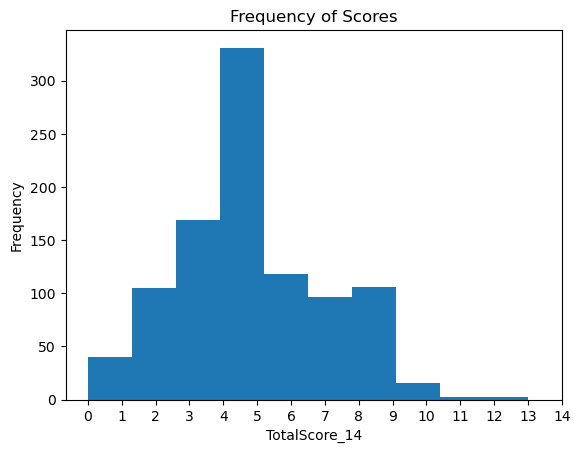

In [27]:
# The following graph represents frequency of each data point on "TotalScore_14" or the total score out of 19 questions across the sample.

df2['TotalScore_14'].plot(kind = 'hist', xticks = np.arange(0, 15, step=1), xlabel = 'TotalScore_14', title = 'Frequency of Scores' )

<Axes: title={'center': 'Absolute mean of scores for above data set'}>

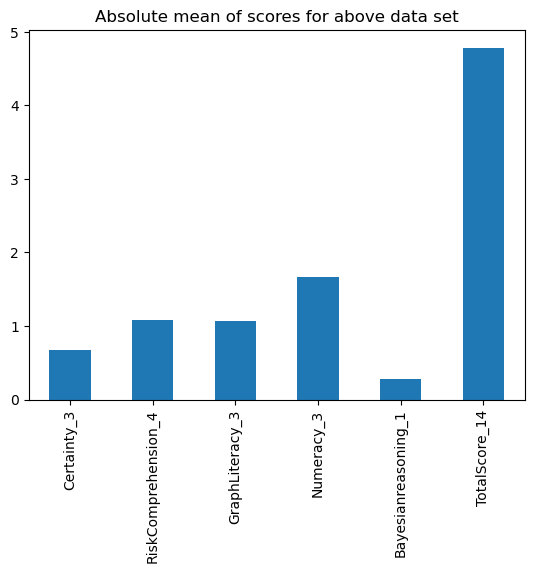

In [28]:
# Absolute mean scores for each facet

(df2[['Certainty_3','RiskComprehension_4','GraphLiteracy_3','Numeracy_3','Bayesianreasoning_1','TotalScore_14']].mean(axis = 0)).plot(kind = 'bar', title = 'Absolute mean of scores for above data set')

<Axes: title={'center': 'Normalised mean of scores for above data set'}>

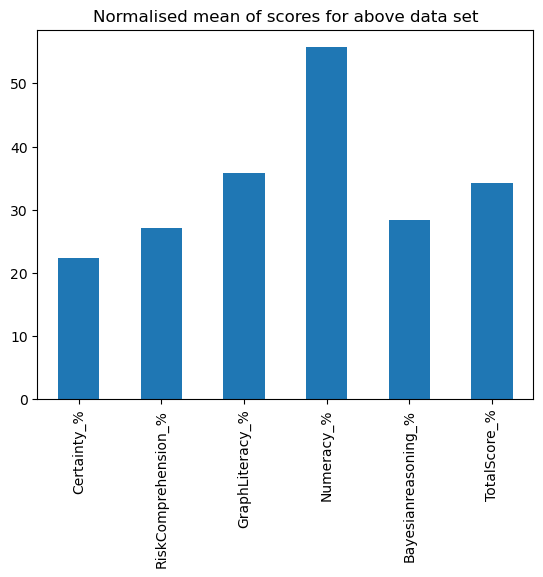

In [29]:
# Normalised mean scores for each facet

df2[['Certainty_%','RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%','TotalScore_%']].mean(axis = 0).plot(kind = 'bar', title = 'Normalised mean of scores for above data set')

In [30]:
# DF3 = Sorted by income

df3 = df2.sort_values(by = 'income')
df3 = df3.reset_index(drop = True)
df3.drop(df3[df3['income'] == 7].index, inplace = True)

df3

#   age  age_rec  isced  income  \
0    zyhky1g8uxcmfhhdd07lzyhky1g75spd  30.0        2      2       1   
1    qt4btily2rqt6phgfaldqt4btixo2oe9  30.0        2      1       1   
2    qqmiu5ib9ensqq9edpoqjqqmiu5ibwxw  30.0        2      2       1   
3    74ds1uode3leoameg6974ds1ur73zuwk  70.0        4      2       1   
4    75d17ssswhdujw7x75d1cbxfdyjuepra  50.5        3      1       1   
..                                ...   ...      ...    ...     ...   
980  ov906fk07l4p40ngmtheov906fkqyre0  40.5        3      2       6   
981  oczyh23wpxpk4o0teoczy5zzzng3i6kk  30.0        2      2       6   
982  o8kt5ubq0j21ajlo8kto9cb1bo3rebdq  40.5        3      2       6   
983  nmrm806ufaeu47t2nmrm807qongj9ij0  30.0        2      1       6   
984  i4ipejjfq0rnwbbi4ipe025xluvm5s8d  40.5        3      1       6   

        wealth  Certainty_3  RiskComprehension_4  GraphLiteracy_3  Numeracy_3  \
0        10000            1                    1                1           2   
1       600000            0                    0                2           1   
2      1000000            0                    2                3           2   
3      5000000            1                    0                1           0   
4       200000            0                    0                1           2   
..         ...          ...                  ...              ...         ...   
980   20000000            0                    2                1           0   
981  500000000            1                    2                3           3   
982     450000            0                    1                1           0   
983    5000000            2                    0                0           1   
984     850000            1                    0                0           1   

     Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
0                      0    33.333333                 25.0        33.333333   
1                      0     0.000000                  0.0        66.666667   
2                      0     0.000000                 50.0       100.000000   
3                      0    33.333333                  0.0        33.333333   
4                      0     0.000000                  0.0        33.333333   
..                   ...          ...                  ...              ...   
980                    0     0.000000                 50.0        33.333333   
981                    0    33.333333                 50.0       100.000000   
982                    1     0.000000                 25.0        33.333333   
983                    0    66.666667                  0.0         0.000000   
984                    1    33.333333                  0.0         0.000000   

     Numeracy_%  Bayesianreasoning_%  TotalScore_14  TotalScore_%  
0     66.666667                  0.0              5     35.714286  
1     33.333333                  0.0              3     21.428571  
2     66.666667                  0.0              7     50.000000  
3      0.000000                  0.0              2     14.285714  
4     66.666667                  0.0              3     21.428571  
..          ...                  ...            ...           ...  
980    0.000000                  0.0              3     21.428571  
981  100.000000                  0.0              9     64.285714  
982    0.000000                100.0              3     21.428571  
983   33.333333                  0.0              3     21.428571  
984   33.333333                100.0              3     21.428571  

[985 rows x 18 columns]

<Axes: title={'center': 'Absolute mean score for each facet (Sort by Income)'}>

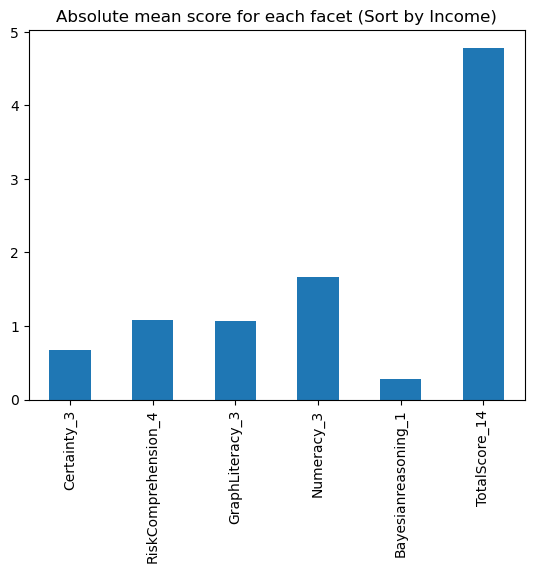

In [31]:
# Absolute mean score for each facet (Sort by Income)

df3[['Certainty_3','RiskComprehension_4','GraphLiteracy_3','Numeracy_3','Bayesianreasoning_1','TotalScore_14']].mean(axis = 0).plot(kind = 'bar', title = 'Absolute mean score for each facet (Sort by Income)')

<Axes: title={'center': 'Normalised mean score for each facet (Sort by Income)'}>

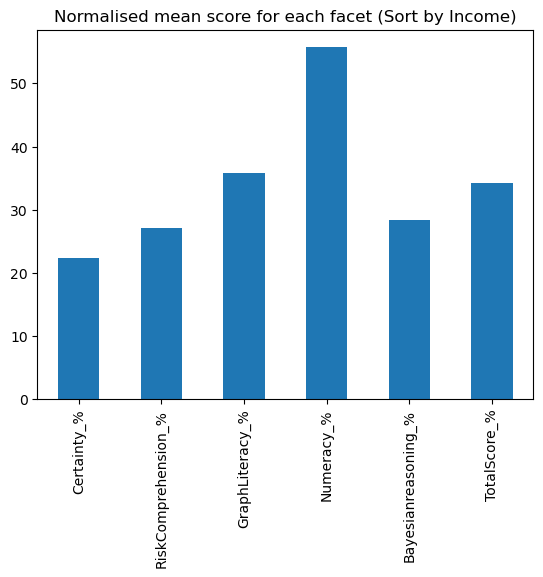

In [32]:
# Normalised mean score for each facet (Sort by Income)

(df3[['Certainty_%','RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%','TotalScore_%']].mean(axis = 0)).plot(kind = 'bar', title = 'Normalised mean score for each facet (Sort by Income)')

In [33]:
# Normalised mean of each facet as a numerical (sorted by income)

df3.groupby('income')[['Certainty_%','RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%','TotalScore_%']].mean()

Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
income                                                                  
1         22.641509            26.415094        35.849057   59.329140   
2         20.862745            28.705882        39.137255   55.607843   
3         25.380711            26.776650        32.487310   55.837563   
4         23.809524            23.376623        27.705628   57.575758   
5         21.875000            24.609375        37.500000   50.000000   
6         21.693122            25.396825        32.275132   50.264550   

        Bayesianreasoning_%  TotalScore_%  
income                                     
1                 27.044025     34.725966  
2                 26.823529     34.890756  
3                 28.426396     34.046410  
4                 24.675325     31.818182  
5                 34.375000     32.924107  
6                 39.682540     32.426304

In [34]:
# Count of responses for each category (sorted by income)

df3.groupby('income')[['#']].count()

#
income     
1       159
2       425
3       197
4        77
5        64
6        63

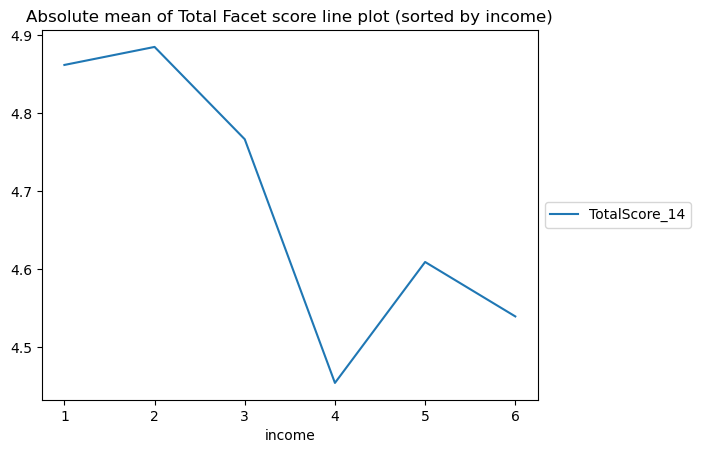

In [35]:
# Absolute mean of Total Facet score line plot (sorted by income)

df3.groupby('income')[['TotalScore_14']].mean().plot( kind = 'line', title = 'Absolute mean of Total Facet score line plot (sorted by income)').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

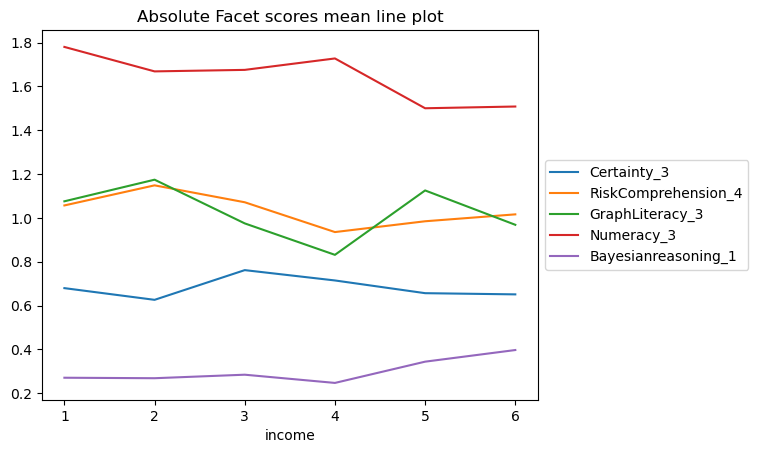

In [36]:
# Absolute mean of each Facet score line plot (sorted by income)

df3.groupby('income')[['Certainty_3','RiskComprehension_4','GraphLiteracy_3','Numeracy_3','Bayesianreasoning_1']].mean().plot( kind = 'line', title = 'Absolute Facet scores mean line plot').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

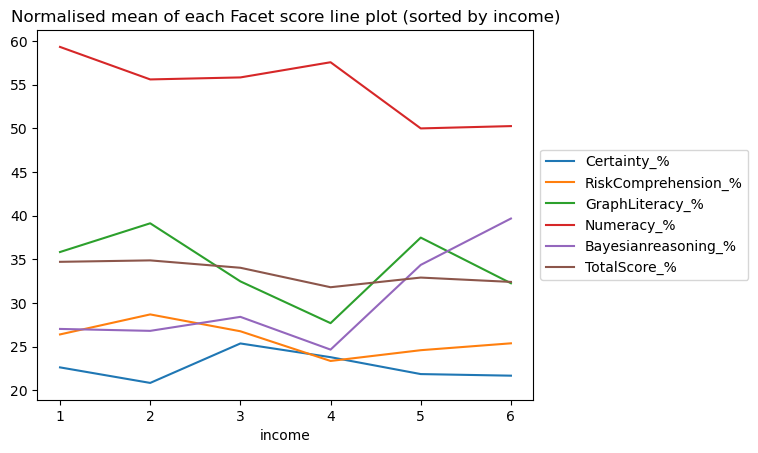

In [37]:
# Normalised mean of each Facet score line plot (sorted by income)


df3.groupby('income')[['Certainty_%','RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%', 'TotalScore_%']].mean().plot( kind = 'line', title = 'Normalised mean of each Facet score line plot (sorted by income)').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

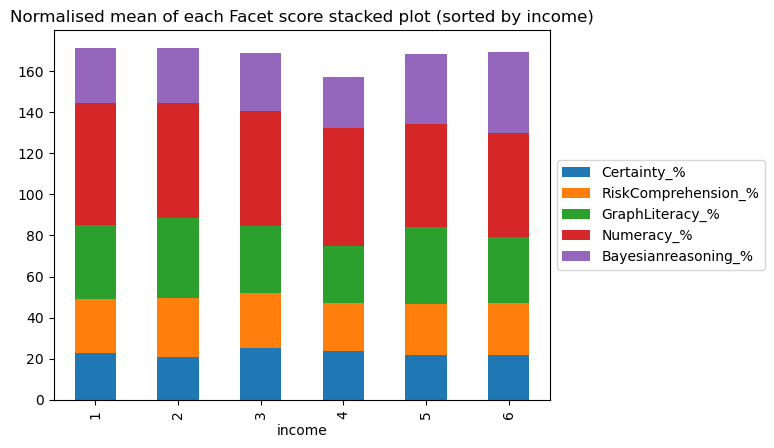

In [38]:
# Normalised mean of each Facet score stacked plot (sorted by income)

df3.groupby('income')[['Certainty_%','RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%']].mean().plot( kind = 'bar', title = 'Normalised mean of each Facet score stacked plot (sorted by income)', stacked = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

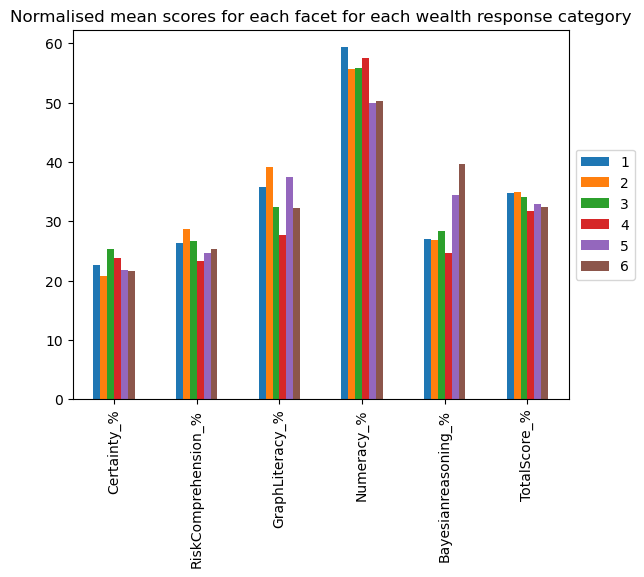

In [39]:
# Normalised mean of each Facet score hist plot (sorted by income)

df3.groupby('income')[['Certainty_%','RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%','TotalScore_%']].mean().T.plot(kind = 'bar', title = 'Normalised mean scores for each facet for each wealth response category').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: xlabel='income', ylabel='TotalScore_14'>

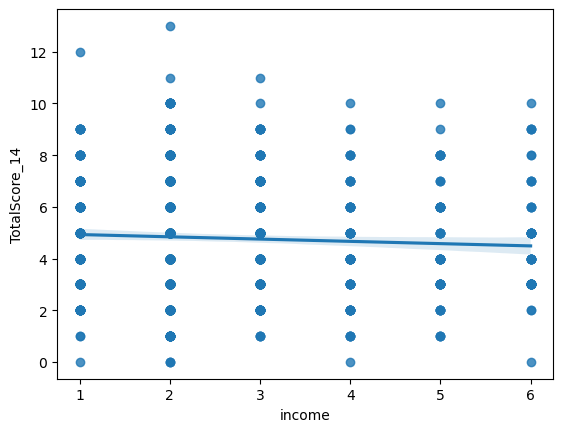

In [40]:
# Trend line for Absolute Total Facet Score vs income

sns.regplot (data = df3, x = 'income', y = 'TotalScore_14')

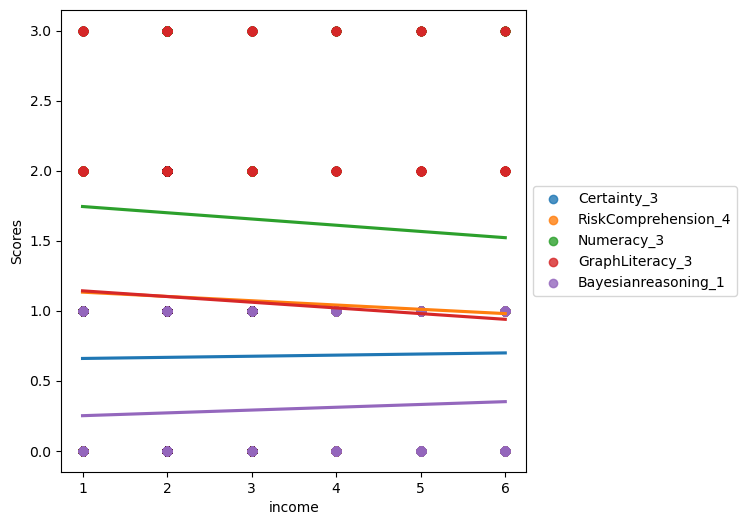

In [41]:
# Trend line for Absolute Independent Facet Score vs income reponses

fig, ax = plt.subplots(figsize=(6, 6))

sns.regplot (data = df3, x = 'income', y = 'Certainty_3', fit_reg=True, ci=None, ax=ax, label='Certainty_3')
sns.regplot (data = df3, x = 'income', y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax, label='RiskComprehension_4')
sns.regplot (data = df3, x = 'income', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax, label='Numeracy_3')
sns.regplot (data = df3, x = 'income', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax, label='GraphLiteracy_3')
sns.regplot (data = df3, x = 'income', y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax, label='Bayesianreasoning_1' )

ax.set(ylabel='Scores', xlabel='income')
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

<Axes: xlabel='income', ylabel='TotalScore_14'>

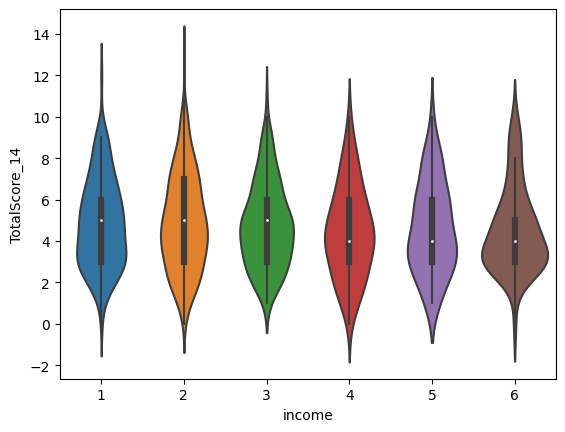

In [42]:
# Violine Plot for TotalScore_14 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'TotalScore_14')

<Axes: xlabel='income', ylabel='Certainty_3'>

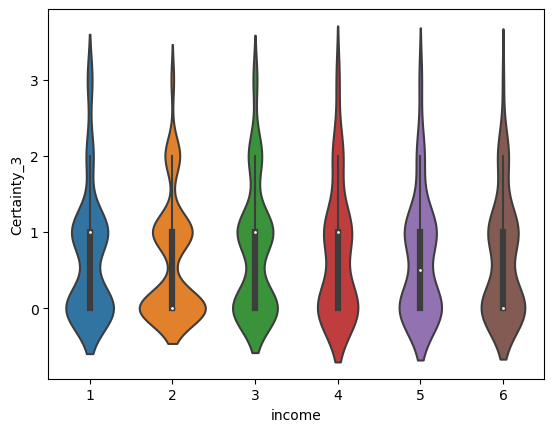

In [43]:
# Violine Plot for Certainty_3 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'Certainty_3')

<Axes: xlabel='income', ylabel='RiskComprehension_4'>

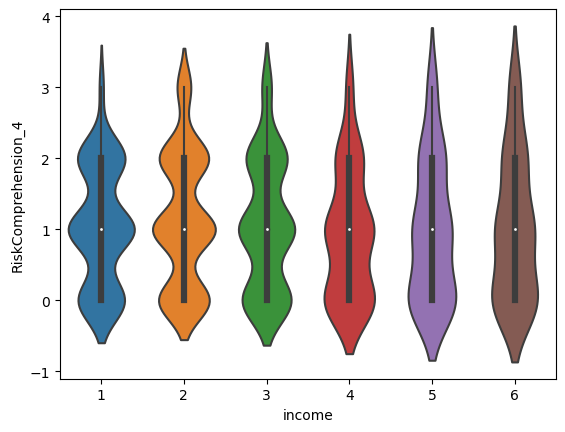

In [44]:
# Violine Plot for RiskComprehension_4 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'RiskComprehension_4')

<Axes: xlabel='income', ylabel='GraphLiteracy_3'>

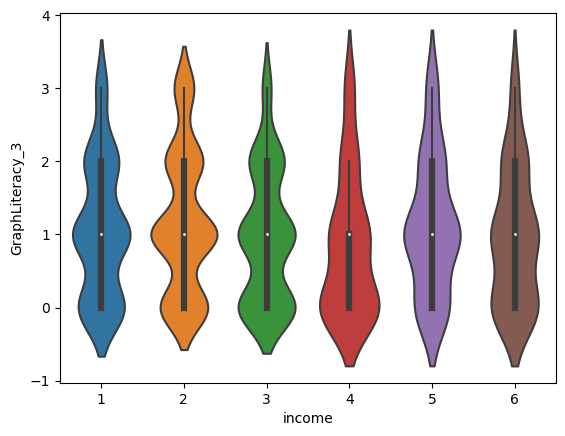

In [45]:
# Violine Plot for GraphLiteracy_3 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'GraphLiteracy_3')

<Axes: xlabel='income', ylabel='Numeracy_3'>

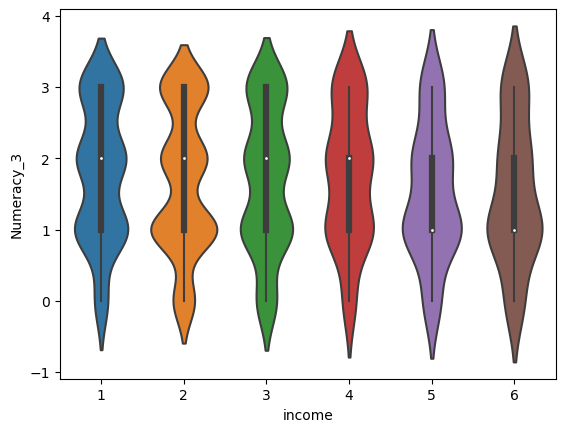

In [46]:
# Violine Plot for Numeracy_3 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'Numeracy_3')

<Axes: xlabel='income', ylabel='Bayesianreasoning_1'>

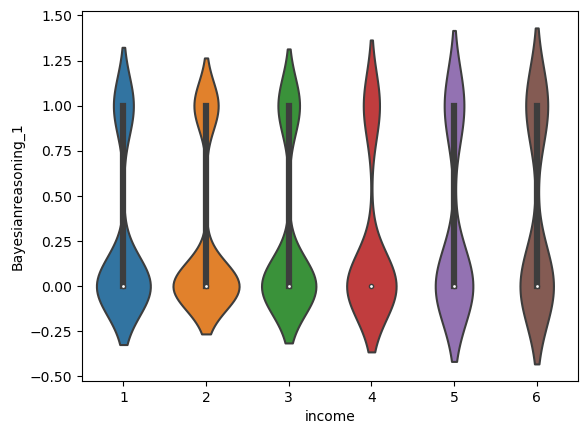

In [47]:
# Violine Plot for TotalScore_14 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'Bayesianreasoning_1')

In [48]:
# Data Frame 2 or df2 is an aggregate data on facet total scores and over all total score, along with wealth and income data vs each response. 
# This data set is also sorted by wealth with all responses 'NA' removed.
# We also assign quartiles ranking each response according to this sort.

df4 = df2.sort_values(by = 'wealth')
df4 = df4.reset_index(drop = True)
df4 = df4.dropna(axis = 0, subset = 'wealth')
df4.insert(loc = len(df4.columns), column = "Quartile Number", value = pd.qcut(df4["wealth"],q = 4, labels = False ) + 1, allow_duplicates = 'False')

df4

#   age  age_rec  isced  income  \
0    2rkur9ckjvsyz36zmayz1zw2rkur9ckn  40.5        3      2       3   
1    y139mcxc619h0ooosy139muk14mpfpvm  30.0        2      3       1   
2    e7ty2tbwa1hcmte7ty683aw64pla7689  30.0        2      2       1   
3    k783at5pit8cmfecjjessbi63k783ato  21.5        2      2       1   
4    dxa1rrk9eq39bfdxa3lmyyjbrit73ofa  30.0        2      2       2   
..                                ...   ...      ...    ...     ...   
980  4udfypw7lf8mmgjmxr4d4udfym4sx1sf  40.5        3      1       3   
981  wn9mk6m1k8o10l1twn9mk6b4z7l7yvhc  50.5        3      1       3   
982  35zux4sc18rplyz3dc85z35zux4sdfm4  21.5        2      2       4   
983  zcj7ldokhyo6217f9sriwizcj7ldodwt  40.5        3      2       3   
984  gqyrw25wb6k70f3475s2kgqyrw22py28  30.0        2      2       2   

        wealth  Certainty_3  RiskComprehension_4  GraphLiteracy_3  Numeracy_3  \
0            0            1                    0                0           2   
1            0            3                    1                0           2   
2            0            0                    1                1           1   
3            0            1                    2                1           3   
4            0            1                    2                3           3   
..         ...          ...                  ...              ...         ...   
980  500000000            0                    0                0           2   
981  500000000            1                    2                3           3   
982  500000000            1                    1                0           1   
983  600000000            1                    3                1           1   
984  870000000            0                    1                3           3   

     Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
0                      0    33.333333                  0.0         0.000000   
1                      0   100.000000                 25.0         0.000000   
2                      0     0.000000                 25.0        33.333333   
3                      0    33.333333                 50.0        33.333333   
4                      0    33.333333                 50.0       100.000000   
..                   ...          ...                  ...              ...   
980                    1     0.000000                  0.0         0.000000   
981                    0    33.333333                 50.0       100.000000   
982                    0    33.333333                 25.0         0.000000   
983                    0    33.333333                 75.0        33.333333   
984                    0     0.000000                 25.0       100.000000   

     Numeracy_%  Bayesianreasoning_%  TotalScore_14  TotalScore_%  \
0     66.666667                  0.0              3     21.428571   
1     66.666667                  0.0              6     42.857143   
2     33.333333                  0.0              3     21.428571   
3    100.000000                  0.0              7     50.000000   
4    100.000000                  0.0              9     64.285714   
..          ...                  ...            ...           ...   
980   66.666667                100.0              3     21.428571   
981  100.000000                  0.0              9     64.285714   
982   33.333333                  0.0              3     21.428571   
983   33.333333                  0.0              6     42.857143   
984  100.000000                  0.0              7     50.000000   

     Quartile Number  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
..               ...  
980                4  
981                4  
982                4  
983                4  
984                4  

[985 rows x 19 columns]

<Axes: title={'center': 'Absolute mean score for each facet (Sort by Wealth)'}>

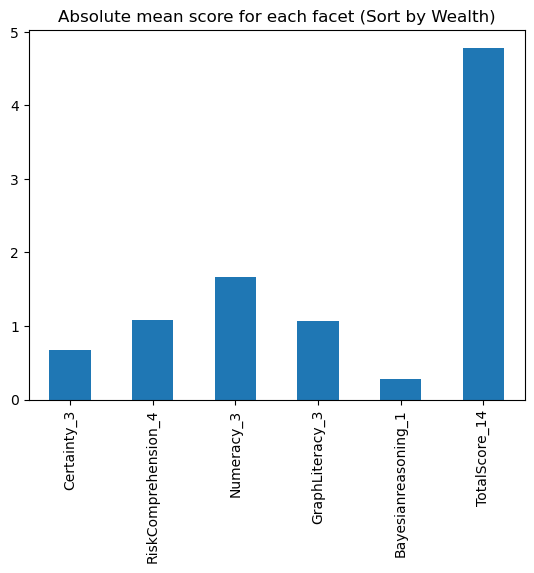

In [49]:
# Absolute mean score for each facet (Sort by Wealth)

df4[['Certainty_3','RiskComprehension_4','Numeracy_3','GraphLiteracy_3','Bayesianreasoning_1','TotalScore_14']].mean(axis = 0).plot(kind = 'bar', title = 'Absolute mean score for each facet (Sort by Wealth)')

<Axes: title={'center': 'Normalised mean score for each facet (Sort by Wealth)'}>

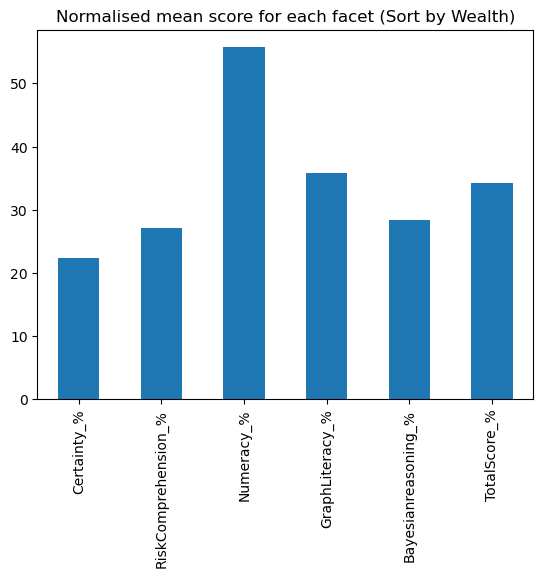

In [50]:
# Normalised mean score for each facet (Sort by Wealth)

(df4[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean(axis = 0)).plot(kind = 'bar', title = 'Normalised mean score for each facet (Sort by Wealth)')

<Axes: title={'center': 'Total responses line plot sorted by Wealth'}, xlabel='Unique responses sorted by wealth', ylabel='TotalScore_14'>

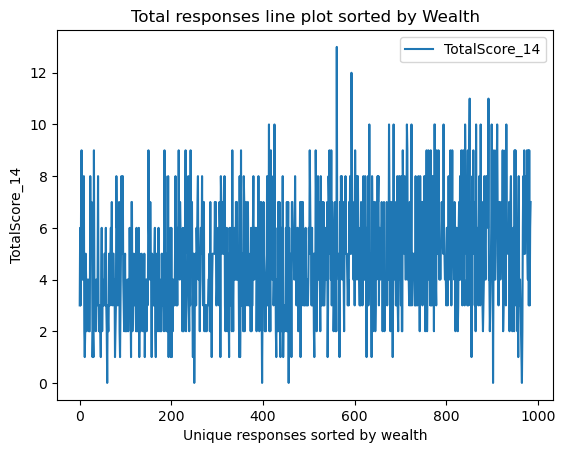

In [51]:
# Line Plot of Absolute Total Facet score vs sorted wealth

df4.plot(use_index = 'True' , kind = 'line', y = ['TotalScore_14'], title = 'Total responses line plot sorted by Wealth',xlabel = 'Unique responses sorted by wealth', ylabel = 'TotalScore_14')

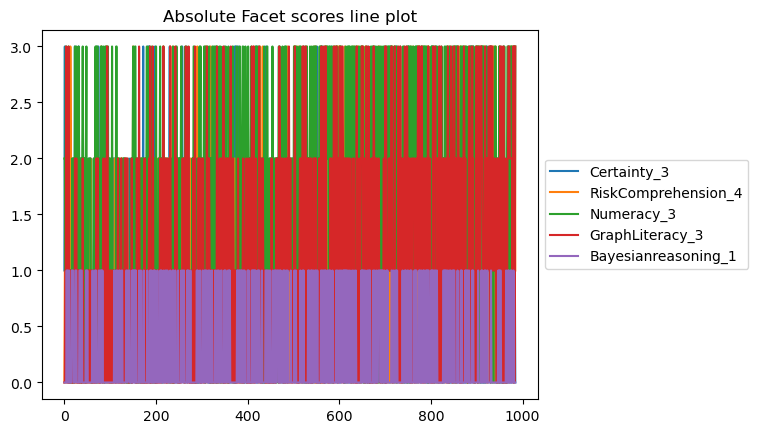

In [52]:
# Absolute Facet scores line plot from low to high wealth 
# I do understand that this is non readable

df4[['Certainty_3','RiskComprehension_4','Numeracy_3','GraphLiteracy_3','Bayesianreasoning_1']].plot( kind = 'line', title = 'Absolute Facet scores line plot', use_index = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: ylabel='TotalScore_14'>

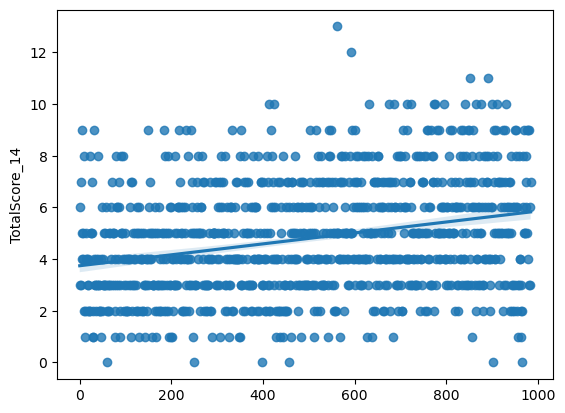

In [53]:
# Trend line for Absolute Total Facet Score vs unique wealth reponses

sns.regplot (data = df4, x = df4.index, y = 'TotalScore_14')

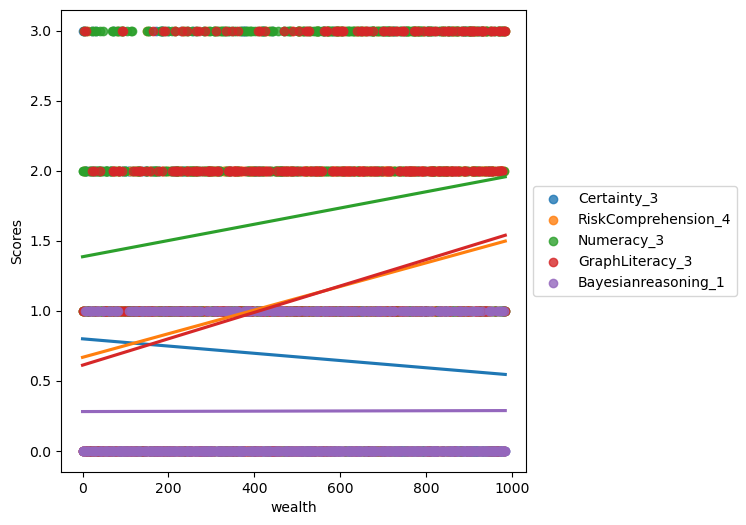

In [54]:
# Trend line for Absolute Independent Facet Score vs wealth reponses

fig1, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4, x = df4.index, y = 'Certainty_3', fit_reg=True, ci=None, ax=ax1, label='Certainty_3')
sns.regplot (data = df4, x = df4.index, y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax1, label='RiskComprehension_4')
sns.regplot (data = df4, x = df4.index, y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax1, label='Numeracy_3')
sns.regplot (data = df4, x = df4.index, y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax1, label='GraphLiteracy_3')
sns.regplot (data = df4, x = df4.index, y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax1, label='Bayesianreasoning_1' )

ax1.set(ylabel='Scores', xlabel='wealth')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [55]:
# Count of number of responses under each quartile

df4.groupby('Quartile Number')[['Quartile Number']].count()

Quartile Number
Quartile Number                 
1                            252
2                            267
3                            261
4                            205

In [56]:
df4.loc[df4['Quartile Number']==1]

#   age  age_rec  isced  income  wealth  \
0    2rkur9ckjvsyz36zmayz1zw2rkur9ckn  40.5        3      2       3       0   
1    y139mcxc619h0ooosy139muk14mpfpvm  30.0        2      3       1       0   
2    e7ty2tbwa1hcmte7ty683aw64pla7689  30.0        2      2       1       0   
3    k783at5pit8cmfecjjessbi63k783ato  21.5        2      2       1       0   
4    dxa1rrk9eq39bfdxa3lmyyjbrit73ofa  30.0        2      2       2       0   
..                                ...   ...      ...    ...     ...     ...   
247  jk7uqs11v1xucd2nwvjk7uf1hfh2626m  21.5        2      2       2  200000   
248  yzuiigi5sodjp6gefryzuii6zqqslykb  30.0        2      1       1  200000   
249  alu7c19ltacklzi2r5valu7c1o108qo2  40.5        3      2       2  200000   
250  8eynniv5jpifaxbqslk8eynnw7he4d4q  40.5        3      3       1  200000   
251  75d17ssswhdujw7x75d1cbxfdyjuepra  50.5        3      1       1  200000   

     Certainty_3  RiskComprehension_4  GraphLiteracy_3  Numeracy_3  \
0              1                    0                0           2   
1              3                    1                0           2   
2              0                    1                1           1   
3              1                    2                1           3   
4              1                    2                3           3   
..           ...                  ...              ...         ...   
247            0                    0                0           1   
248            1                    1                0           2   
249            2                    1                0           2   
250            0                    0                0           0   
251            0                    0                1           2   

     Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
0                      0    33.333333                  0.0         0.000000   
1                      0   100.000000                 25.0         0.000000   
2                      0     0.000000                 25.0        33.333333   
3                      0    33.333333                 50.0        33.333333   
4                      0    33.333333                 50.0       100.000000   
..                   ...          ...                  ...              ...   
247                    0     0.000000                  0.0         0.000000   
248                    1    33.333333                 25.0         0.000000   
249                    0    66.666667                 25.0         0.000000   
250                    0     0.000000                  0.0         0.000000   
251                    0     0.000000                  0.0        33.333333   

     Numeracy_%  Bayesianreasoning_%  TotalScore_14  TotalScore_%  \
0     66.666667                  0.0              3     21.428571   
1     66.666667                  0.0              6     42.857143   
2     33.333333                  0.0              3     21.428571   
3    100.000000                  0.0              7     50.000000   
4    100.000000                  0.0              9     64.285714   
..          ...                  ...            ...           ...   
247   33.333333                  0.0              1      7.142857   
248   66.666667                100.0              5     35.714286   
249   66.666667                  0.0              5     35.714286   
250    0.000000                  0.0              0      0.000000   
251   66.666667                  0.0              3     21.428571   

     Quartile Number  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
..               ...  
247                1  
248                1  
249                1  
250                1  
251                1  

[252 rows x 19 columns]

<Axes: title={'center': 'Total Score line plot sorted by Wealth Q1'}, xlabel='Unique responses', ylabel='TotalScore_14'>

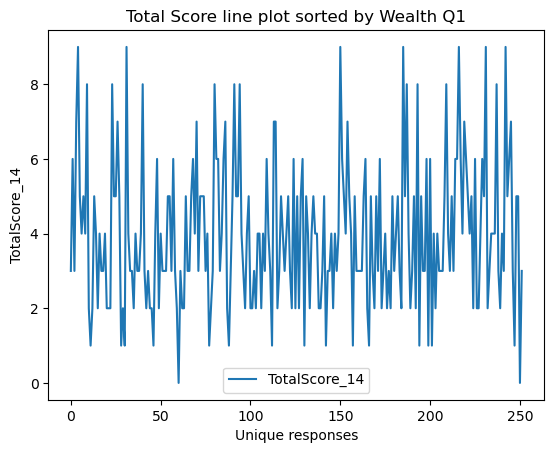

In [57]:
# This graph is basically a line plot of the TotalScore_14 across first quartile unique responses which are ordered by income

df4.loc[df4['Quartile Number']==1].plot(use_index = 'True' , kind = 'line', y = ['TotalScore_14'], title = 'Total Score line plot sorted by Wealth Q1',xlabel = 'Unique responses', ylabel = 'TotalScore_14')

<Axes: ylabel='TotalScore_14'>

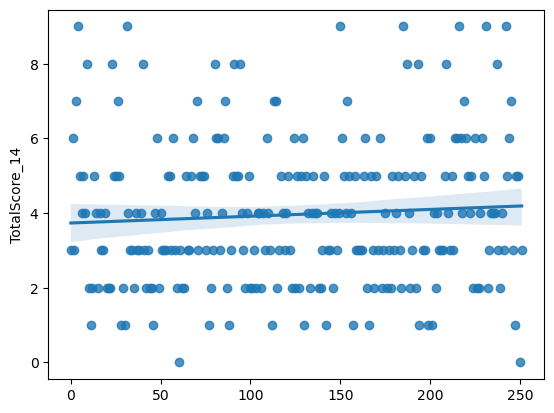

In [58]:
# Trend line for Absolute Total Facet Score vs unique Q14. Income reponses in Quartile 1

sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'TotalScore_14')

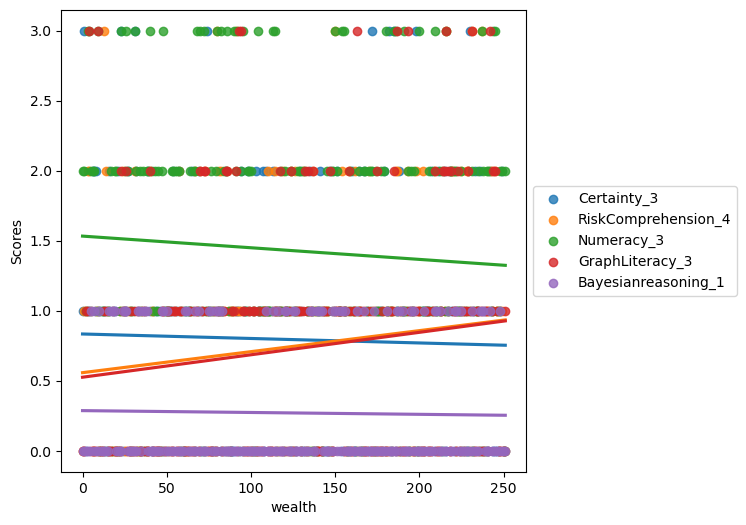

In [59]:
# Trend line for Absolute Independent Facet Score vs wealth reponses in Quartile 1

fig1, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'Certainty_3', fit_reg=True, ci=None, ax=ax2, label='Certainty_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax2, label='RiskComprehension_4')
sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax2, label='Numeracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax2, label='GraphLiteracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax2, label='Bayesianreasoning_1' )

ax2.set(ylabel='Scores', xlabel='wealth')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [60]:
df4.loc[df4['Quartile Number']==2]

#   age  age_rec  isced  income   wealth  \
252  a3t6jdeeok5fi9ytwm26t8a3t6jeslm2  60.5        4      1       2   249999   
253  60d324mk8v9k6b72kta160d324awybfe  40.5        3      1       1   250000   
254  x2hvxmx1dlx8c0eetx2hv6i6gwydnm4n  40.5        3      2       3   250000   
255  moxclsul6frvz7zumox1ui0fzmuzr1ui  21.5        2      2       2   250000   
256  umyw9zmbzzq1ezmapniumyw9rrxvtv04  30.0        2      2       3   250000   
..                                ...   ...      ...    ...     ...      ...   
514  p6ysf6v8twjp5tvbdp6ysf6c4z8ph6yu  40.5        3      1       1  1000000   
515  wdhgkmf4w07atbnabwdhgkmmlpxlzzk9  50.5        3      2       3  1000000   
516  stnbflow1djoo3c6wstnbf3bh0zfrghl  50.5        3      1       1  1000000   
517  phtgoyb2qh5lc4mhzq1fcphtgo8o361s  30.0        2      2       3  1000000   
518  oh9pe24l8uzloh9pwh60duary5z380p9  40.5        3      2       2  1000000   

     Certainty_3  RiskComprehension_4  GraphLiteracy_3  Numeracy_3  \
252            0                    2                0           1   
253            1                    2                0           2   
254            1                    0                0           2   
255            1                    0                1           3   
256            1                    1                1           2   
..           ...                  ...              ...         ...   
514            0                    0                2           1   
515            1                    2                2           3   
516            1                    2                1           3   
517            0                    0                1           1   
518            0                    1                2           1   

     Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
252                    0     0.000000                 50.0         0.000000   
253                    0    33.333333                 50.0         0.000000   
254                    0    33.333333                  0.0         0.000000   
255                    1    33.333333                  0.0        33.333333   
256                    0    33.333333                 25.0        33.333333   
..                   ...          ...                  ...              ...   
514                    0     0.000000                  0.0        66.666667   
515                    1    33.333333                 50.0        66.666667   
516                    0    33.333333                 50.0        33.333333   
517                    0     0.000000                  0.0        33.333333   
518                    0     0.000000                 25.0        66.666667   

     Numeracy_%  Bayesianreasoning_%  TotalScore_14  TotalScore_%  \
252   33.333333                  0.0              3     21.428571   
253   66.666667                  0.0              5     35.714286   
254   66.666667                  0.0              3     21.428571   
255  100.000000                100.0              6     42.857143   
256   66.666667                  0.0              5     35.714286   
..          ...                  ...            ...           ...   
514   33.333333                  0.0              3     21.428571   
515  100.000000                100.0              9     64.285714   
516  100.000000                  0.0              7     50.000000   
517   33.333333                  0.0              2     14.285714   
518   33.333333                  0.0              4     28.571429   

     Quartile Number  
252                2  
253                2  
254                2  
255                2  
256                2  
..               ...  
514                2  
515                2  
516                2  
517                2  
518                2  

[267 rows x 19 columns]

<Axes: title={'center': 'Total Score line plot sorted by Wealth Q1'}, xlabel='Unique responses', ylabel='TotalScore_14'>

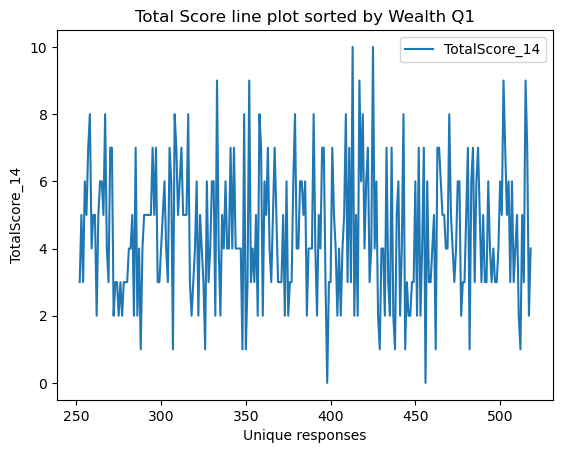

In [61]:
# This graph is basically a line plot of the TotalScore_14 across second quartile unique responses which are ordered by income

df4.loc[df4['Quartile Number']==2].plot(use_index = 'True' , kind = 'line', y = ['TotalScore_14'], title = 'Total Score line plot sorted by Wealth Q1',xlabel = 'Unique responses', ylabel = 'TotalScore_14')

<Axes: ylabel='TotalScore_14'>

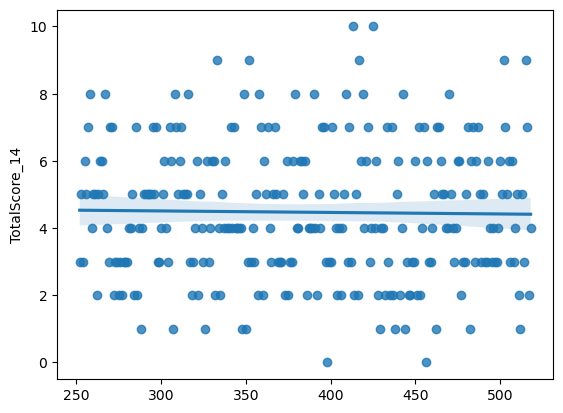

In [62]:
# Trend line for Absolute Total Facet Score vs unique wealth reponses in Quartile 2

sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'TotalScore_14')

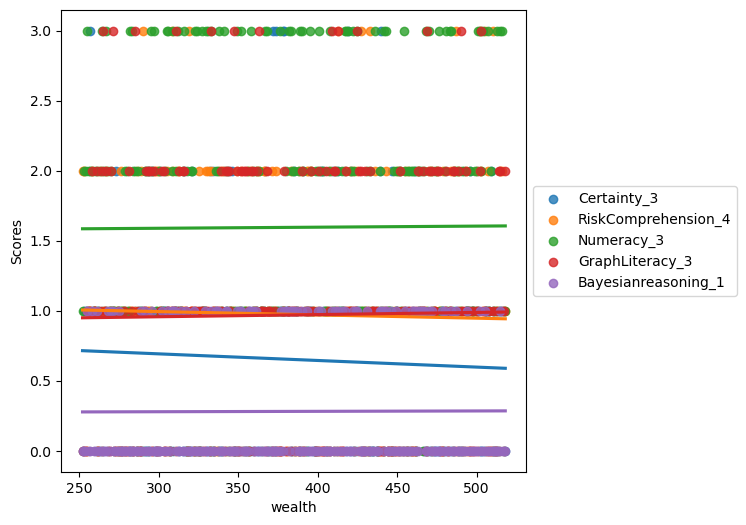

In [63]:
# Trend line for Absolute Independent Facet Score vs wealth reponses in Quartile 2

fig1, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'Certainty_3', fit_reg=True, ci=None, ax=ax3, label='Certainty_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax3, label='RiskComprehension_4')
sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax3, label='Numeracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax3, label='GraphLiteracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax3, label='Bayesianreasoning_1' )

ax3.set(ylabel='Scores', xlabel='wealth')
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [64]:
df4.loc[df4['Quartile Number']==3]

#   age  age_rec  isced  income   wealth  \
519  10utcgrue12b2xedn0r10utc1is68haw  50.5        3      1       2  1005000   
520  6xwg9kqxd8dko1cvq26xw35t43bd6th9  30.0        2      1       2  1025638   
521  4r28kn5y6hze7b830b1z14r28ny2y8ms  21.5        2      1       2  1050000   
522  7rjksqqby6at13qv93d7rjksvn67w2du  30.0        2      1       2  1100000   
523  lou9povqizdfljz9255xlou9poadabjr  30.0        2      2       2  1150000   
..                                ...   ...      ...    ...     ...      ...   
775  gredxi4udks1ypigrep103ik4wrfy35m  50.5        3      1       2  5000000   
776  a901mflv973pm8kbxl3ba901mei1v6ag  30.0        2      2       6  5000000   
777  mwpq6n56r255bmwpq68irzfdh8iggkir  30.0        2      1       3  5000000   
778  a31qwuv5yj3n5tlmea3183d7y7salhcl  30.0        2      3       1  5000000   
779  1g5v4ycgo16lqs9d1g5v5b6b8lnjv6q7  40.5        3      1       4  5000000   

     Certainty_3  RiskComprehension_4  GraphLiteracy_3  Numeracy_3  \
519            0                    2                0           2   
520            0                    2                3           2   
521            1                    1                1           1   
522            0                    0                3           3   
523            0                    2                2           2   
..           ...                  ...              ...         ...   
775            2                    2                3           3   
776            1                    1                1           1   
777            0                    1                1           2   
778            0                    1                0           2   
779            0                    3                2           3   

     Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
519                    0     0.000000                 50.0         0.000000   
520                    1     0.000000                 50.0       100.000000   
521                    0    33.333333                 25.0        33.333333   
522                    1     0.000000                  0.0       100.000000   
523                    0     0.000000                 50.0        66.666667   
..                   ...          ...                  ...              ...   
775                    0    66.666667                 50.0       100.000000   
776                    1    33.333333                 25.0        33.333333   
777                    0     0.000000                 25.0        33.333333   
778                    0     0.000000                 25.0         0.000000   
779                    1     0.000000                 75.0        66.666667   

     Numeracy_%  Bayesianreasoning_%  TotalScore_14  TotalScore_%  \
519   66.666667                  0.0              4     28.571429   
520   66.666667                100.0              8     57.142857   
521   33.333333                  0.0              4     28.571429   
522  100.000000                100.0              7     50.000000   
523   66.666667                  0.0              6     42.857143   
..          ...                  ...            ...           ...   
775  100.000000                  0.0             10     71.428571   
776   33.333333                100.0              5     35.714286   
777   66.666667                  0.0              4     28.571429   
778   66.666667                  0.0              3     21.428571   
779  100.000000                100.0              9     64.285714   

     Quartile Number  
519                3  
520                3  
521                3  
522                3  
523                3  
..               ...  
775                3  
776                3  
777                3  
778                3  
779                3  

[261 rows x 19 columns]

<Axes: title={'center': 'Total Score line plot sorted by Wealth Q3'}, xlabel='Unique responses', ylabel='TotalScore_14'>

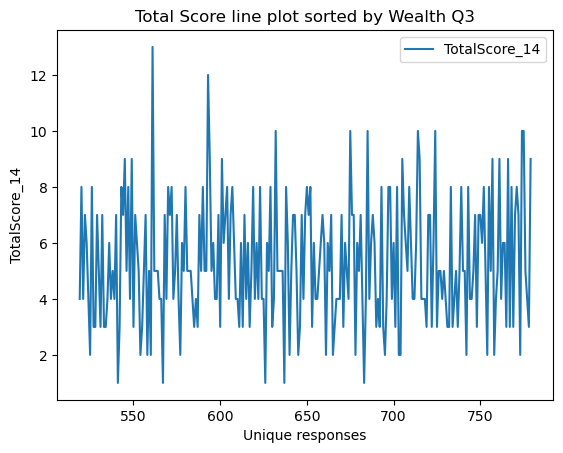

In [65]:
# This graph is basically a line plot of the TotalScore_14 across third quartile unique responses which are ordered by wealth

df4.loc[df4['Quartile Number']==3].plot(use_index = 'True' , kind = 'line', y = ['TotalScore_14'], title = 'Total Score line plot sorted by Wealth Q3',xlabel = 'Unique responses', ylabel = 'TotalScore_14')

<Axes: ylabel='TotalScore_14'>

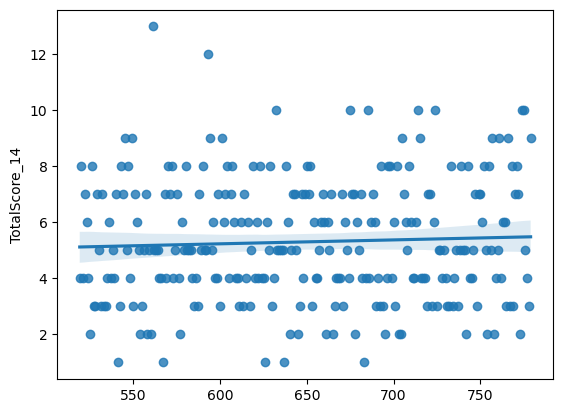

In [66]:
# Trend line for Absolute Total Facet Score vs unique wealth reponses in Quartile 3

sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'TotalScore_14')

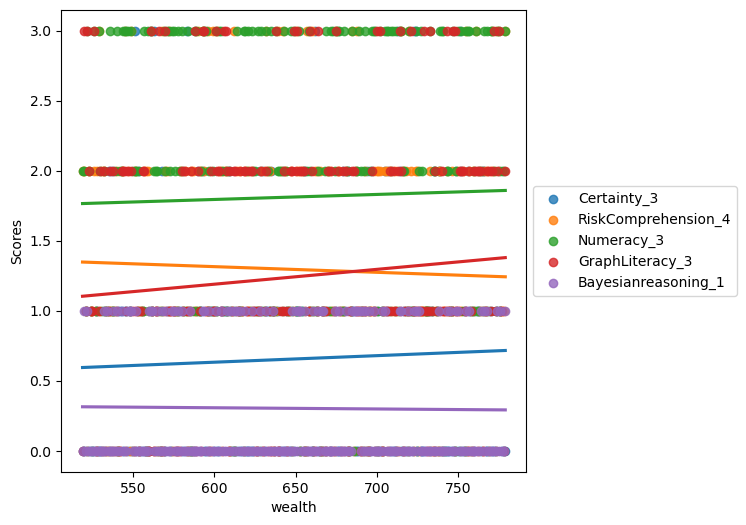

In [67]:
# Trend line for Absolute Independent Facet Score vs wealth reponses in Quartile 3

fig1, ax4 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'Certainty_3', fit_reg=True, ci=None, ax=ax4, label='Certainty_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax4, label='RiskComprehension_4')
sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax4, label='Numeracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax4, label='GraphLiteracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax4, label='Bayesianreasoning_1' )

ax4.set(ylabel='Scores', xlabel='wealth')
ax4.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [68]:
df4.loc[df4['Quartile Number']==4]

#   age  age_rec  isced  income  \
780  obftinjncjw2fkari22ghobfti6alubg  30.0        2      1       3   
781  rh3ida1re0oohl9crh3ida1s6gcynlil  30.0        2      2       4   
782  fa4fw88qzaxzjxw31rzchtfa4fw8gn8h  30.0        2      2       3   
783  gdsir9721na619gpfsu9jqk7bi4rhpfs  30.0        2      2       3   
784  8pwy5gq2mcpugpldx8pwy5javd312pha  30.0        2      1       3   
..                                ...   ...      ...    ...     ...   
980  4udfypw7lf8mmgjmxr4d4udfym4sx1sf  40.5        3      1       3   
981  wn9mk6m1k8o10l1twn9mk6b4z7l7yvhc  50.5        3      1       3   
982  35zux4sc18rplyz3dc85z35zux4sdfm4  21.5        2      2       4   
983  zcj7ldokhyo6217f9sriwizcj7ldodwt  40.5        3      2       3   
984  gqyrw25wb6k70f3475s2kgqyrw22py28  30.0        2      2       2   

        wealth  Certainty_3  RiskComprehension_4  GraphLiteracy_3  Numeracy_3  \
780    5200000            0                    1                3           3   
781    5245899            3                    0                1           1   
782    5500000            2                    1                0           2   
783    5500000            1                    3                2           2   
784    5500000            1                    1                0           3   
..         ...          ...                  ...              ...         ...   
980  500000000            0                    0                0           2   
981  500000000            1                    2                3           3   
982  500000000            1                    1                0           1   
983  600000000            1                    3                1           1   
984  870000000            0                    1                3           3   

     Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
780                    0     0.000000                 25.0       100.000000   
781                    0   100.000000                  0.0        33.333333   
782                    0    66.666667                 25.0         0.000000   
783                    1    33.333333                 75.0        66.666667   
784                    0    33.333333                 25.0         0.000000   
..                   ...          ...                  ...              ...   
980                    1     0.000000                  0.0         0.000000   
981                    0    33.333333                 50.0       100.000000   
982                    0    33.333333                 25.0         0.000000   
983                    0    33.333333                 75.0        33.333333   
984                    0     0.000000                 25.0       100.000000   

     Numeracy_%  Bayesianreasoning_%  TotalScore_14  TotalScore_%  \
780  100.000000                  0.0              7     50.000000   
781   33.333333                  0.0              5     35.714286   
782   66.666667                  0.0              5     35.714286   
783   66.666667                100.0              9     64.285714   
784  100.000000                  0.0              5     35.714286   
..          ...                  ...            ...           ...   
980   66.666667                100.0              3     21.428571   
981  100.000000                  0.0              9     64.285714   
982   33.333333                  0.0              3     21.428571   
983   33.333333                  0.0              6     42.857143   
984  100.000000                  0.0              7     50.000000   

     Quartile Number  
780                4  
781                4  
782                4  
783                4  
784                4  
..               ...  
980                4  
981                4  
982                4  
983                4  
984                4  

[205 rows x 19 columns]

<Axes: title={'center': 'Total Score line plot sorted by Wealth Q4'}, xlabel='Unique responses', ylabel='TotalScore_14'>

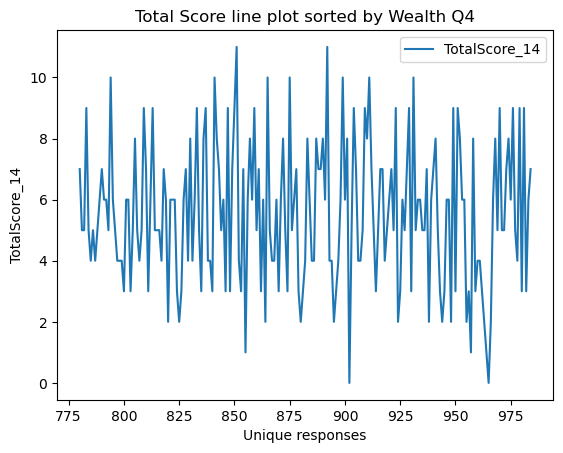

In [69]:
# This graph is basically a line plot of the TotalScore_14 across fourth quartile unique responses which are ordered by Wealth

df4.loc[df4['Quartile Number']==4].plot(use_index = 'True' , kind = 'line', y = ['TotalScore_14'], title = 'Total Score line plot sorted by Wealth Q4',xlabel = 'Unique responses', ylabel = 'TotalScore_14')

<Axes: ylabel='TotalScore_14'>

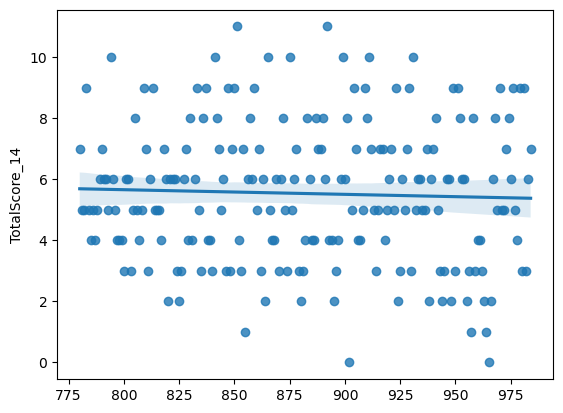

In [70]:
# Trend line for Absolute Total Facet Score vs unique wealth reponses in Quartile 4

sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'TotalScore_14')

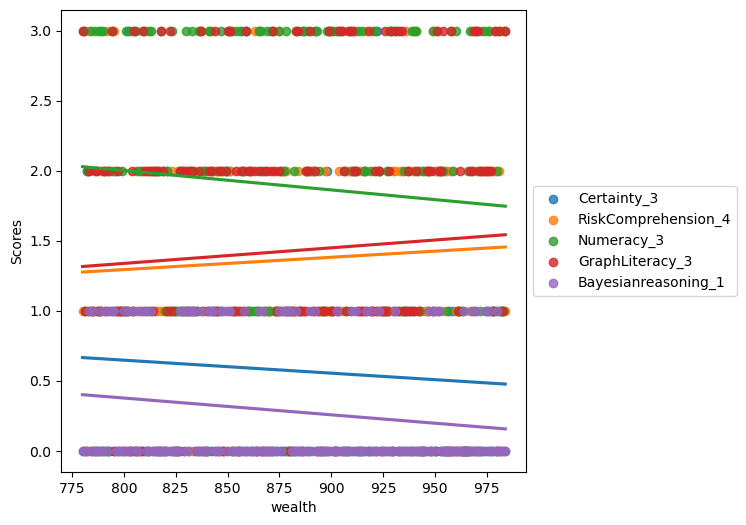

In [71]:
# Trend line for Absolute Independent Facet Score vs wealth reponses in Quartile 4

fig1, ax5 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'Certainty_3', fit_reg=True, ci=None, ax=ax5, label='Certainty_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax5, label='RiskComprehension_4')
sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax5, label='Numeracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax5, label='GraphLiteracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax5, label='Bayesianreasoning_1' )

ax5.set(ylabel='Scores', xlabel='wealth')
ax5.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

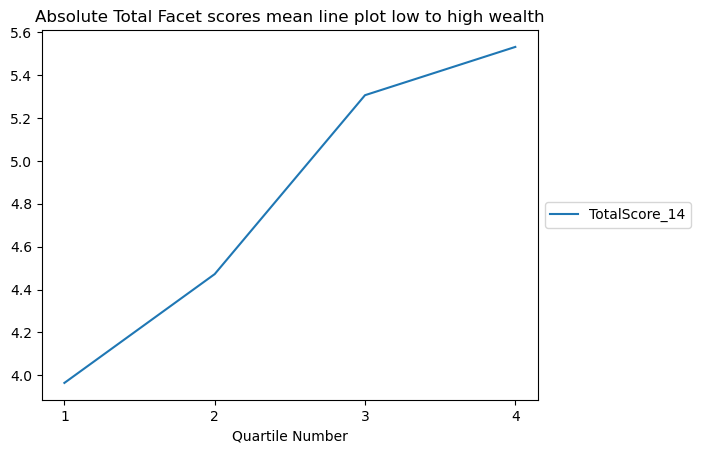

In [72]:
# Absolute Total Facet scores mean line plot from low to high Wealth

df4.groupby('Quartile Number')[['TotalScore_14']].mean().plot( kind = 'line', title = 'Absolute Total Facet scores mean line plot low to high wealth', xticks = np.arange(1,5,step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

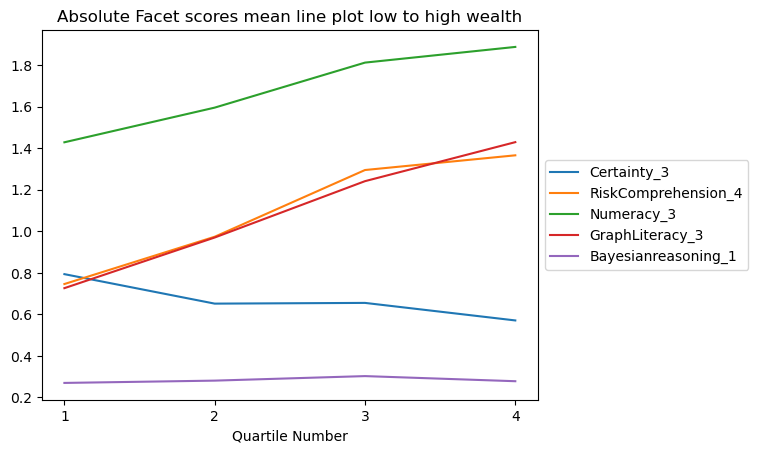

In [73]:
# Absolute Facet scores mean line plot from low to high wealth

df4.groupby('Quartile Number')[['Certainty_3','RiskComprehension_4','Numeracy_3','GraphLiteracy_3','Bayesianreasoning_1']].mean().plot( kind = 'line', title = 'Absolute Facet scores mean line plot low to high wealth', xticks = np.arange(1,5,step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

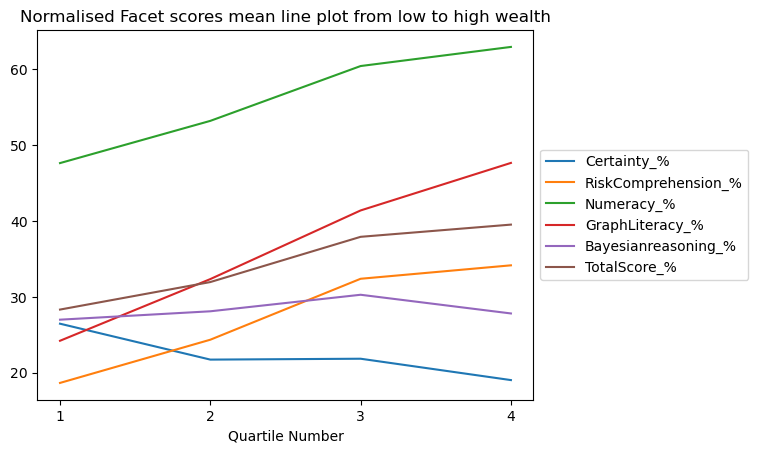

In [74]:
# Normalised Facet scores mean line plot from low to high wealth


df4.groupby('Quartile Number')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean().plot( kind = 'line', title = 'Normalised Facet scores mean line plot from low to high wealth',  xticks = np.arange(1,5,step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

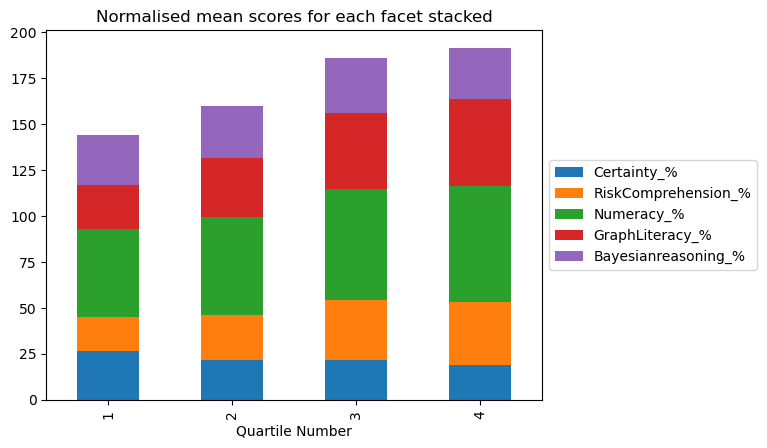

In [75]:
# Normalised mean scores for each facet stacked

df4.groupby('Quartile Number')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%']].mean().plot( kind = 'bar', title = 'Normalised mean scores for each facet stacked', stacked = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

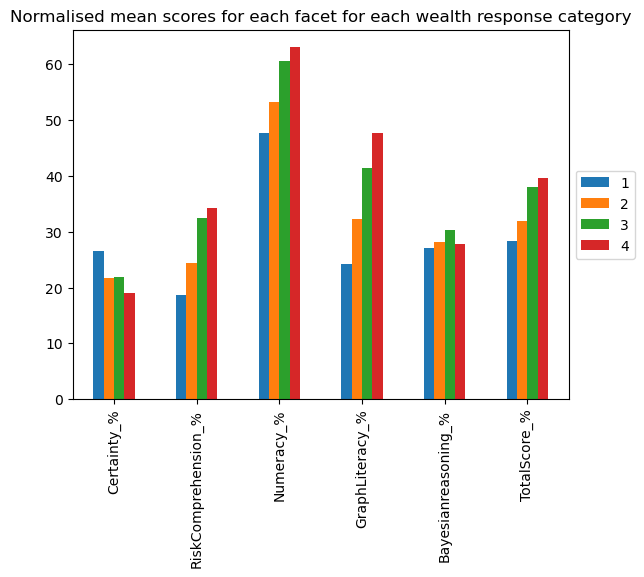

In [76]:
# Normalised mean scores for each facet for each wealth response Quartile

df4.groupby('Quartile Number')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean().T.plot(kind = 'bar', title = 'Normalised mean scores for each facet for each wealth response category').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: xlabel='Quartile Number', ylabel='TotalScore_14'>

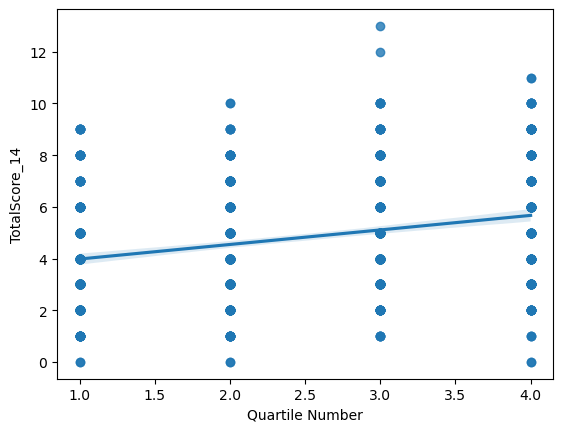

In [77]:
# Trend line for Absolute Total Facet Score vs Quartiles

sns.regplot (data = df4, x = 'Quartile Number', y = 'TotalScore_14')

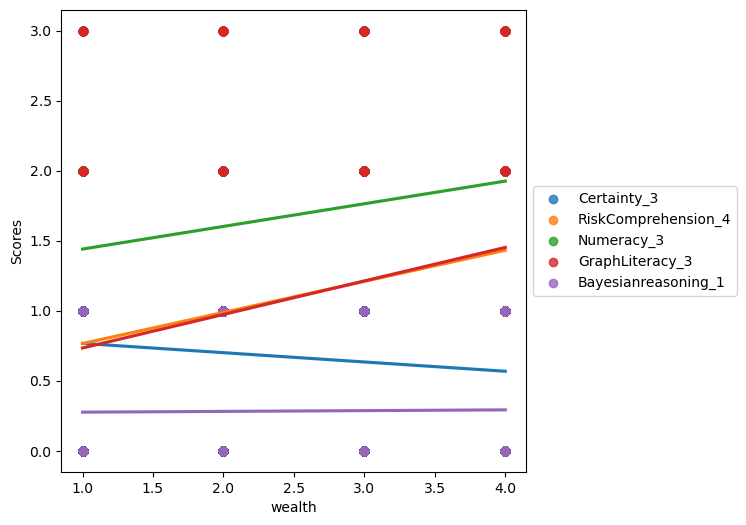

In [78]:
# Trend line for Absolute Independent Facet Score vs Quartiles

fig2, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4, x = 'Quartile Number', y = 'Certainty_3', fit_reg=True, ci=None, ax=ax2, label='Certainty_3')
sns.regplot (data = df4, x = 'Quartile Number', y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax2, label='RiskComprehension_4')
sns.regplot (data = df4, x = 'Quartile Number', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax2, label='Numeracy_3')
sns.regplot (data = df4, x = 'Quartile Number', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax2, label='GraphLiteracy_3')
sns.regplot (data = df4, x = 'Quartile Number', y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax2, label='Bayesianreasoning_1' )

ax2.set(ylabel='Scores', xlabel='wealth')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

<Axes: xlabel='Quartile Number', ylabel='TotalScore_14'>

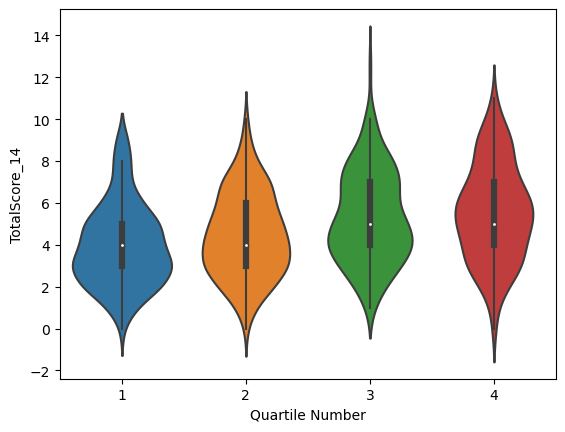

In [79]:
# Violine Plot for TotalScore_14 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'TotalScore_14')

<Axes: xlabel='Quartile Number', ylabel='Certainty_3'>

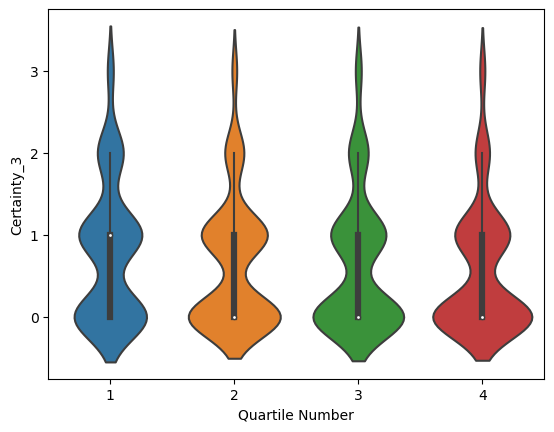

In [80]:
# Violine Plot for Certainty_3 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Certainty_3')

<Axes: xlabel='Quartile Number', ylabel='RiskComprehension_4'>

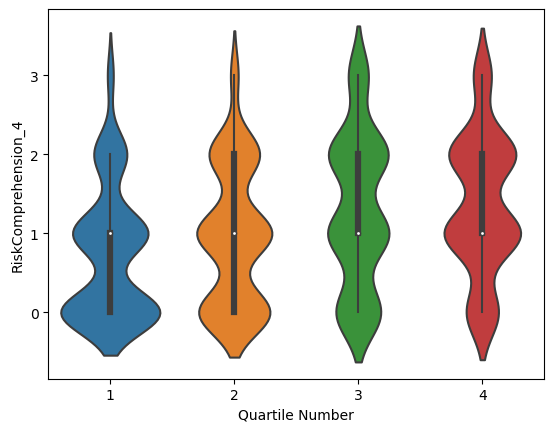

In [81]:
# Violine Plot for RiskComprehension_4 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'RiskComprehension_4')

<Axes: xlabel='Quartile Number', ylabel='GraphLiteracy_3'>

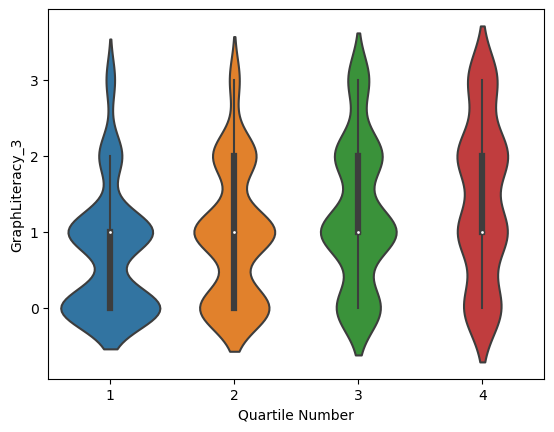

In [82]:
# Violine Plot for GraphLiteracy_3 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'GraphLiteracy_3')

<Axes: xlabel='Quartile Number', ylabel='Numeracy_3'>

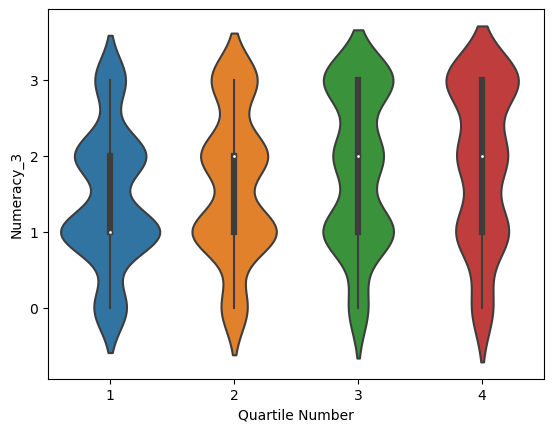

In [83]:
# Violine Plot for Numeracy_3 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Numeracy_3')

<Axes: xlabel='Quartile Number', ylabel='Bayesianreasoning_1'>

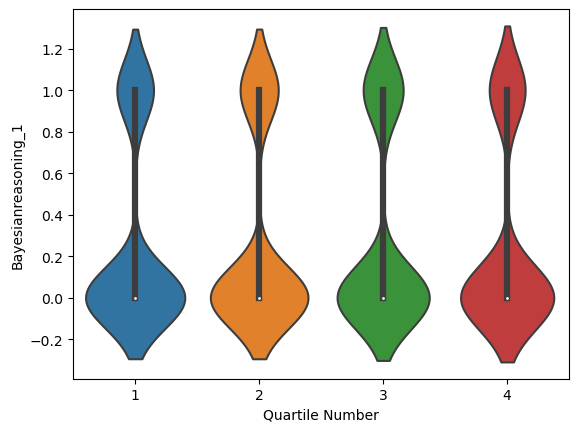

In [84]:
# Violine Plot for Bayesianreasoning_1 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Bayesianreasoning_1')

In [85]:
# Data Frame 5 or df5 is an aggregate data on facet total scores and over all total score, along with  education data vs each response. 
# This data set is now sorted by education.

df5 = df2.sort_values(by = 'isced')
df5 = df5.reset_index(drop = True)

df5

#   age  age_rec  isced  income    wealth  \
0    i4ipejjfq0rnwbbi4ipe025xluvm5s8d  40.5        3      1       6    850000   
1    fdgu6z978d91tquervfdgu6z6j6nutt1  30.0        2      1       2        10   
2    ff9rrxl271u8oarkff9rypsrml3aewt8  30.0        2      1       2  10000000   
3    sm67z605u7x7he9zjss0qdbjsm67z6wc  21.5        2      1       3    350000   
4    fgvoot3ywvc1yfvm9m89y2fgvoot332v  30.0        2      1       2        30   
..                                ...   ...      ...    ...     ...       ...   
980  eau4o2cunbe58icx2ameau4ontwd5izg  40.5        3      3       1    125000   
981  ay6yqxe7agj90e0mqpzcay69gpc4ljtr  50.5        3      3       3  15000000   
982  17z0ue9f3y4vs17z00et5fi41iwxtpaa  21.5        2      3       1     20000   
983  2oe2qtnajnmekk32oe2qtf1f9cymy3af  30.0        2      3       3     20000   
984  a31qwuv5yj3n5tlmea3183d7y7salhcl  30.0        2      3       1   5000000   

     Certainty_3  RiskComprehension_4  GraphLiteracy_3  Numeracy_3  \
0              1                    0                0           1   
1              0                    1                0           1   
2              1                    2                2           2   
3              1                    3                1           0   
4              0                    0                1           1   
..           ...                  ...              ...         ...   
980            1                    2                3           2   
981            3                    1                1           3   
982            0                    0                1           1   
983            0                    0                0           2   
984            0                    1                0           2   

     Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
0                      1    33.333333                  0.0         0.000000   
1                      0     0.000000                 25.0         0.000000   
2                      0    33.333333                 50.0        66.666667   
3                      0    33.333333                 75.0        33.333333   
4                      0     0.000000                  0.0        33.333333   
..                   ...          ...                  ...              ...   
980                    0    33.333333                 50.0       100.000000   
981                    0   100.000000                 25.0        33.333333   
982                    0     0.000000                  0.0        33.333333   
983                    1     0.000000                  0.0         0.000000   
984                    0     0.000000                 25.0         0.000000   

     Numeracy_%  Bayesianreasoning_%  TotalScore_14  TotalScore_%  
0     33.333333                100.0              3     21.428571  
1     33.333333                  0.0              2     14.285714  
2     66.666667                  0.0              7     50.000000  
3      0.000000                  0.0              5     35.714286  
4     33.333333                  0.0              2     14.285714  
..          ...                  ...            ...           ...  
980   66.666667                  0.0              8     57.142857  
981  100.000000                  0.0              8     57.142857  
982   33.333333                  0.0              2     14.285714  
983   66.666667                100.0              3     21.428571  
984   66.666667                  0.0              3     21.428571  

[985 rows x 18 columns]

In [86]:
# since we didnt drop any values, the dataset is essentially the same as df2, but sorted

In [87]:
# Mean of each facet as a % for each category of isced

df5.groupby('isced')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%']].mean()

Certainty_%  RiskComprehension_%  Numeracy_%  GraphLiteracy_%  \
isced                                                                  
1        21.714286            26.904762   54.730159        36.126984   
2        22.741433            27.745327   57.632399        35.825545   
3        29.166667            20.312500   45.833333        31.250000   

       Bayesianreasoning_%  
isced                       
1                27.428571  
2                30.373832  
3                15.625000

In [88]:
# Count of responses for each category isced

df5.groupby('isced')[['#']].count()

#
isced     
1      525
2      428
3       32

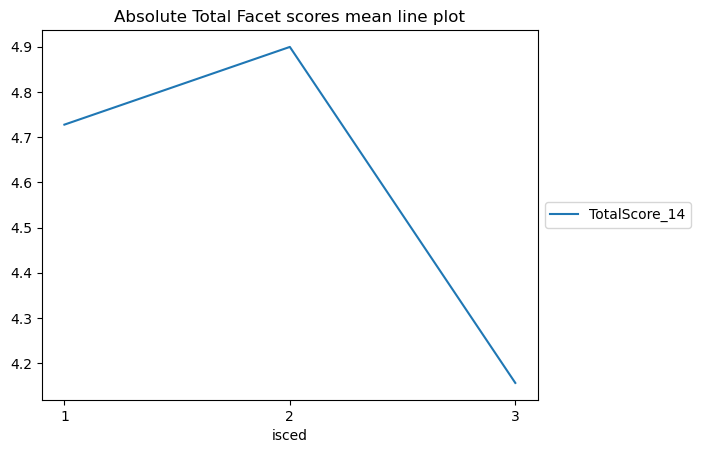

In [89]:
# Absolute Total Facet scores mean line plot from low to high education

df5.groupby('isced')[['TotalScore_14']].mean().plot( kind = 'line', title = 'Absolute Total Facet scores mean line plot', xticks = np.arange(1,4, step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

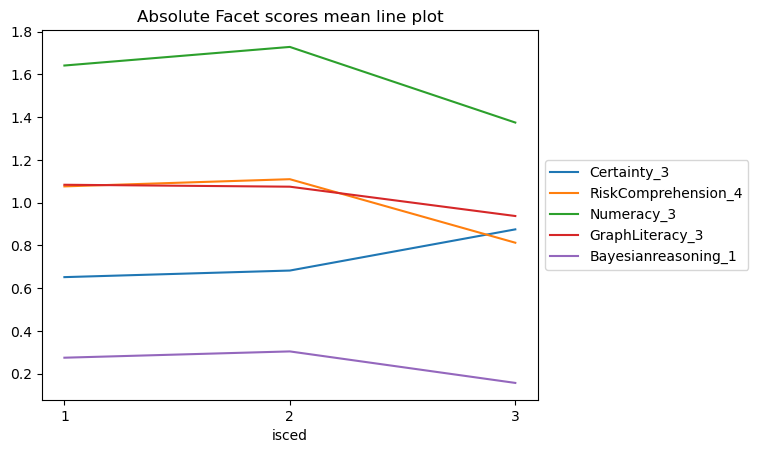

In [90]:
# Absolute Facet scores mean line plot from low to high edu

df5.groupby('isced')[['Certainty_3','RiskComprehension_4','Numeracy_3','GraphLiteracy_3','Bayesianreasoning_1']].mean().plot( kind = 'line', title = 'Absolute Facet scores mean line plot', xticks = np.arange(1,4, step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

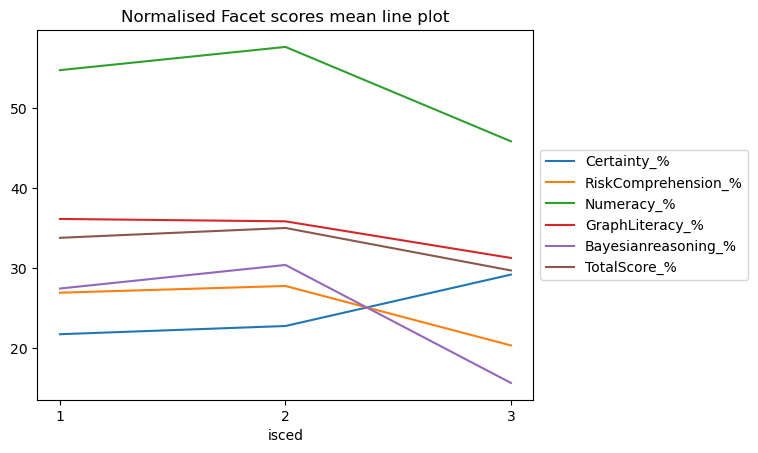

In [91]:
# Normalised Facet scores mean line plot from low to high edu


df5.groupby('isced')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean().plot( kind = 'line', title = 'Normalised Facet scores mean line plot', xticks = np.arange(1,4, step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

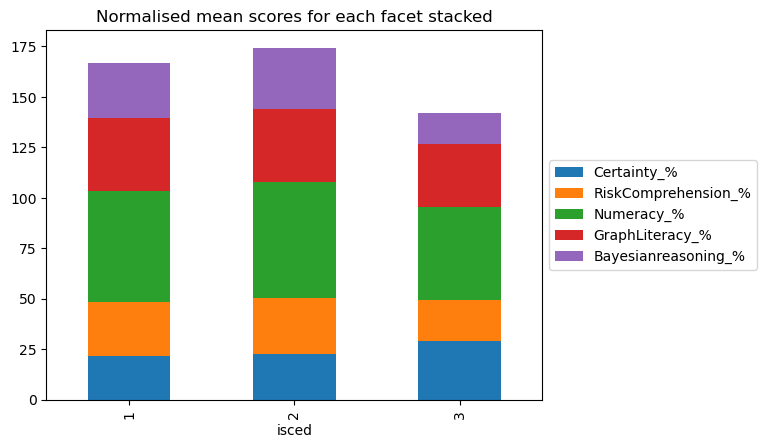

In [92]:
# Normalised mean scores for each facet stacked

df5.groupby('isced')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%']].mean().plot( kind = 'bar', title = 'Normalised mean scores for each facet stacked', stacked = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

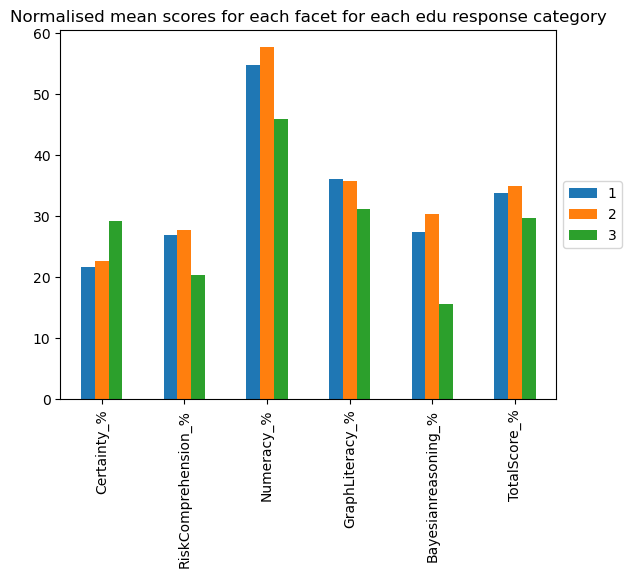

In [93]:
# Normalised mean scores for each facet for each edu response category

df5.groupby('isced')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean().T.plot(kind = 'bar', title = 'Normalised mean scores for each facet for each edu response category').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: xlabel='isced', ylabel='TotalScore_14'>

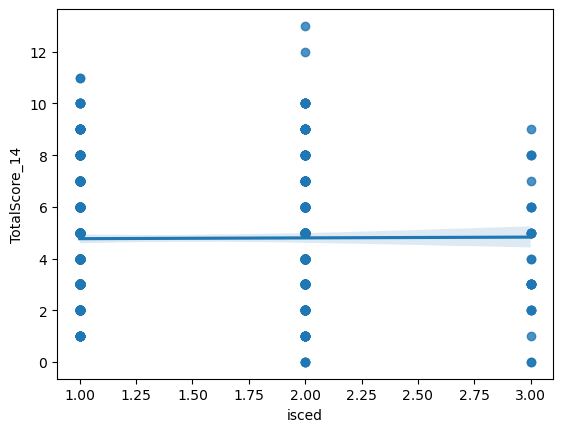

In [94]:
# Trend line for Absolute Total Facet Score vs edu (isced) reponses

sns.regplot (data = df5, x = 'isced', y = 'TotalScore_14')

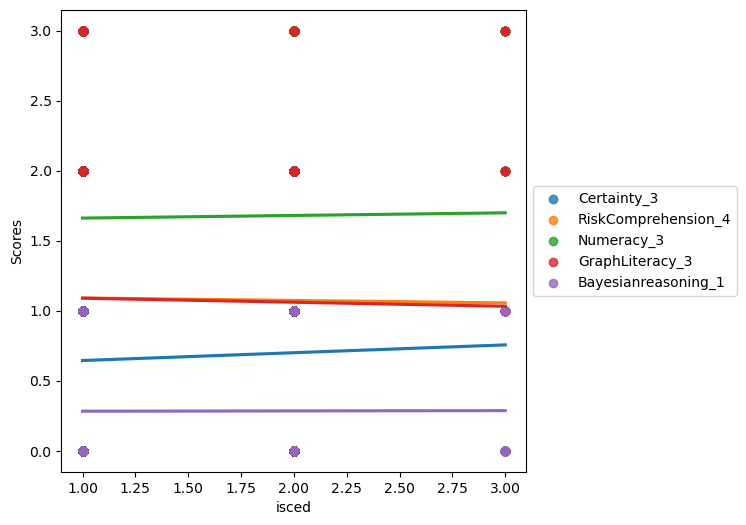

In [95]:
# Trend line for Absolute Independent Facet Score vs edu (isced) reponses

fig, ax6 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df5, x = 'isced', y = 'Certainty_3', fit_reg=True, ci=None, ax=ax6, label='Certainty_3')
sns.regplot (data = df5, x = 'isced', y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax6, label='RiskComprehension_4')
sns.regplot (data = df5, x = 'isced', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax6, label='Numeracy_3')
sns.regplot (data = df5, x = 'isced', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax6, label='GraphLiteracy_3')
sns.regplot (data = df5, x = 'isced', y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax6, label='Bayesianreasoning_1' )

ax6.set(ylabel='Scores', xlabel='isced')
ax6.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

<Axes: xlabel='isced', ylabel='TotalScore_14'>

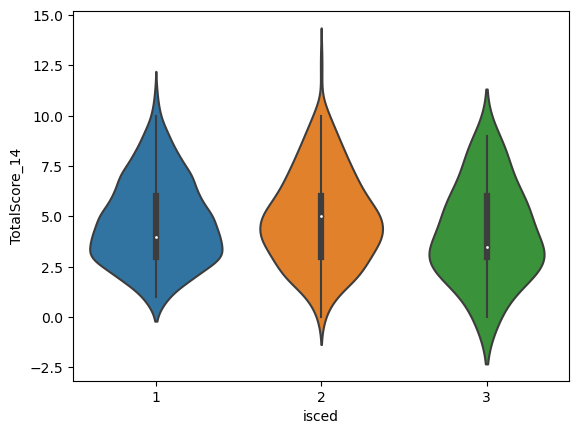

In [96]:
# Violine Plot for TotalScore_14 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'TotalScore_14')

<Axes: xlabel='isced', ylabel='Certainty_3'>

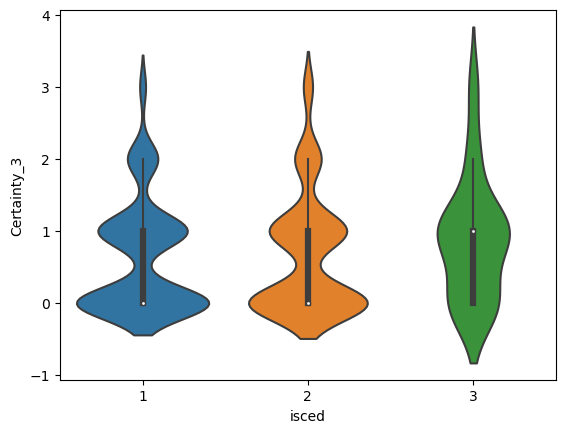

In [97]:
# Violine Plot for Certainty_3 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Certainty_3')

<Axes: xlabel='isced', ylabel='RiskComprehension_4'>

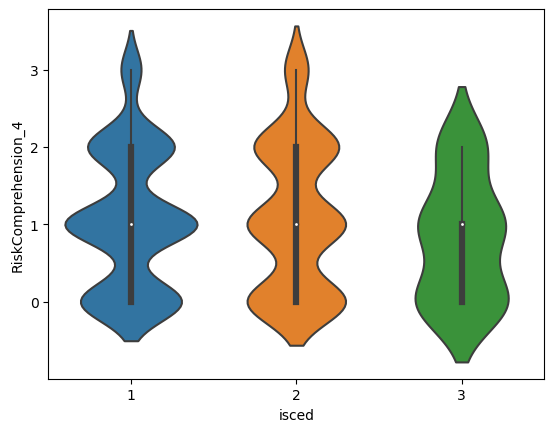

In [98]:
# Violine Plot for RiskComprehension_4 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'RiskComprehension_4')

<Axes: xlabel='isced', ylabel='GraphLiteracy_3'>

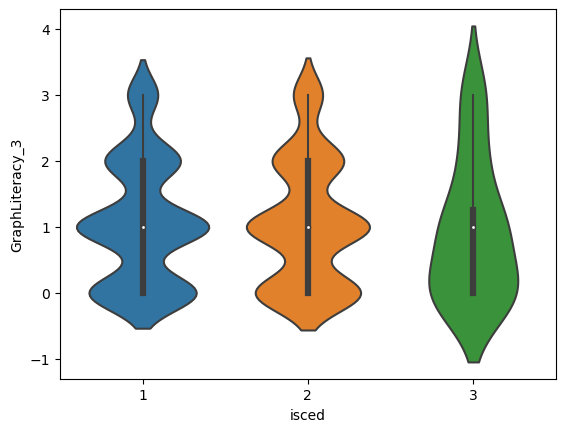

In [99]:
# Violine Plot for GraphLiteracy_3 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'GraphLiteracy_3')

<Axes: xlabel='isced', ylabel='Numeracy_3'>

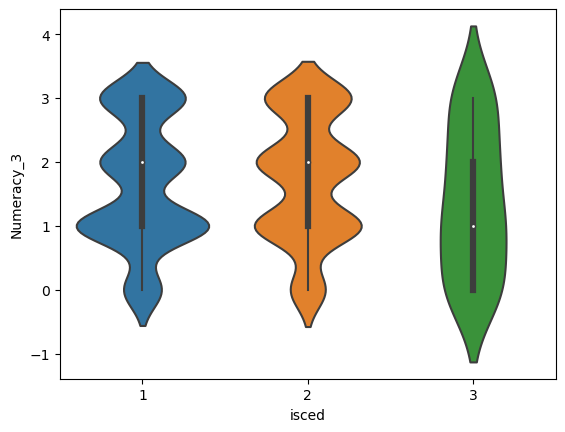

In [100]:
# Violine Plot for Numeracy_3 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Numeracy_3')

<Axes: xlabel='isced', ylabel='Bayesianreasoning_1'>

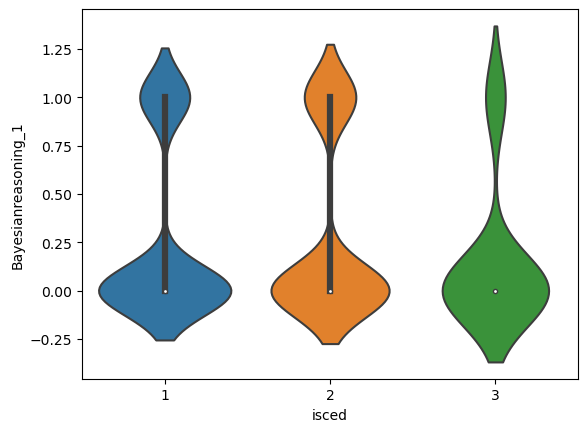

In [101]:
# Violine Plot for TotalScore_14 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Bayesianreasoning_1')

In [102]:
# Descriptive stats for the data set, isced = 1
# NA values of wealth are removed

df6 = df5.dropna(axis = 0, subset = 'wealth')
# df6.drop(df6[df6['wealth'] == 3500000].index, inplace = True)
df6.loc[df6['isced']==1][['wealth']].describe()

wealth
count  5.250000e+02
mean   9.589529e+06
std    4.007188e+07
min    1.000000e+00
25%    2.500000e+05
50%    1.050000e+06
75%    5.000000e+06
max    5.000000e+08

In [103]:
# Descriptive stats for the data set, isced = 2

df6.loc[df6['isced']==2][['wealth']].describe()

wealth
count  4.280000e+02
mean   1.179345e+07
std    6.407987e+07
min    0.000000e+00
25%    2.500000e+05
50%    1.000000e+06
75%    5.000000e+06
max    8.700000e+08

In [104]:
# Descriptive stats for the data set, isced = 3

df6.loc[df6['isced']==3][['wealth']].describe()

wealth
count  3.200000e+01
mean   2.612424e+06
std    6.397476e+06
min    0.000000e+00
25%    1.900000e+04
50%    1.750000e+05
75%    6.753750e+05
max    3.000000e+07

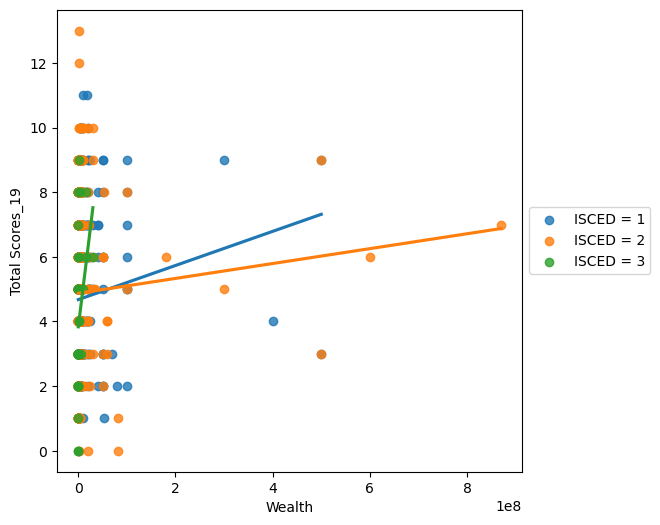

In [105]:
# Trend line for Absolute Tota Facet Score vs wealth reponses sorted by isced and ORDERED by wealth WITH scatter

fig, ax7 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'TotalScore_14', fit_reg=True, ci=None, ax=ax7, label='ISCED = 1')
sns.regplot (data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'TotalScore_14', fit_reg=True, ci=None, ax=ax7, label='ISCED = 2')
sns.regplot (data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'TotalScore_14', fit_reg=True, ci=None, ax=ax7, label='ISCED = 3')

ax7.set(ylabel='Total Scores_19', xlabel='Wealth')
ax7.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

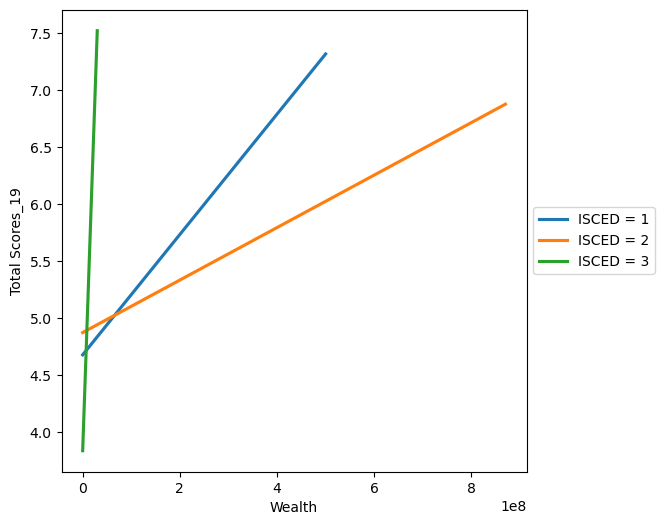

In [106]:
# Trend line for Absolute Tota Facet Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax8 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'TotalScore_14', fit_reg=True, ci=None, ax=ax8, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'TotalScore_14', fit_reg=True, ci=None, ax=ax8, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'TotalScore_14', fit_reg=True, ci=None, ax=ax8, label='ISCED = 3')

ax8.set(ylabel='Total Scores_19', xlabel='Wealth')
ax8.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

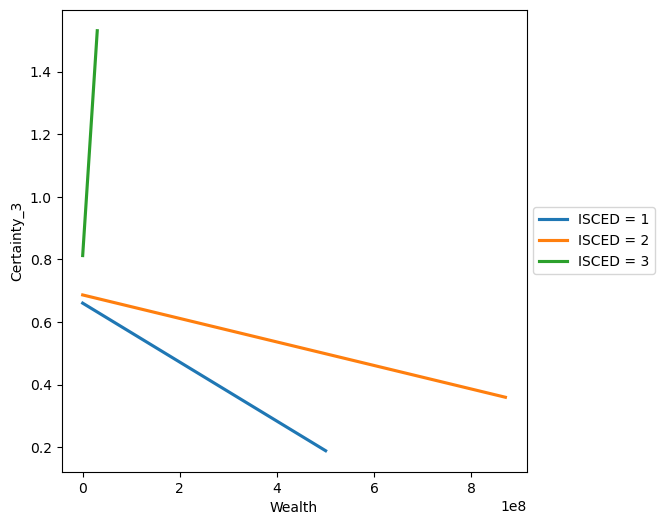

In [107]:
# Trend line for Absolute Certainty Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax9 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'Certainty_3', fit_reg=True, ci=None, ax=ax9, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'Certainty_3', fit_reg=True, ci=None, ax=ax9, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'Certainty_3', fit_reg=True, ci=None, ax=ax9, label='ISCED = 3')

ax9.set(ylabel='Certainty_3', xlabel='Wealth')
ax9.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

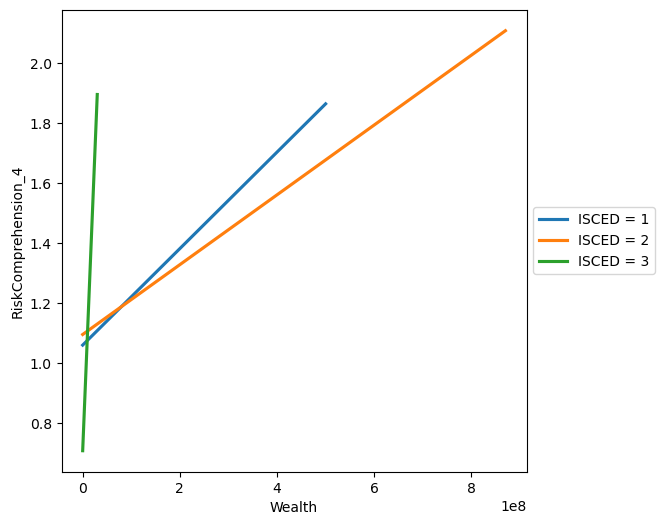

In [108]:
# Trend line for Absolute Uncertainty Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax10 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax10, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax10, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax10, label='ISCED = 3')

ax10.set(ylabel='RiskComprehension_4', xlabel='Wealth')
ax10.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

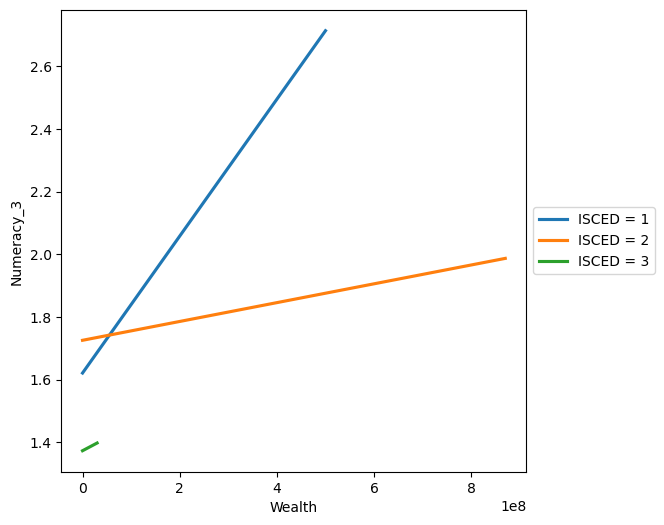

In [109]:
# Trend line for Absolute Number Comprehension Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='Numeracy_3', xlabel='Wealth')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

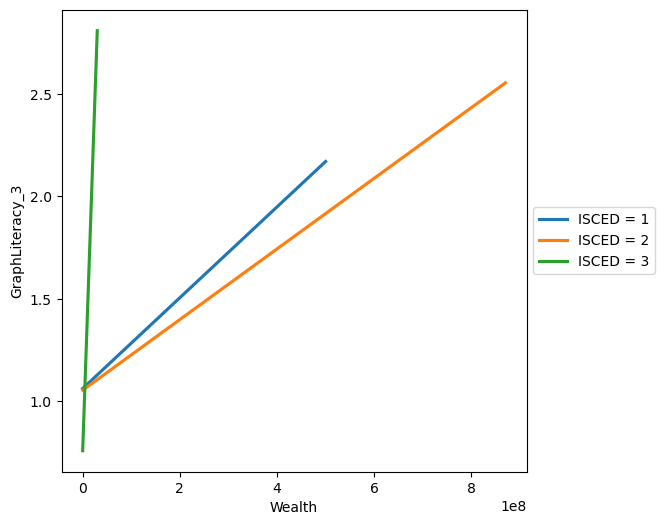

In [110]:
# Trend line for Absolute Graph Comprehension Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='GraphLiteracy_3', xlabel='Wealth')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

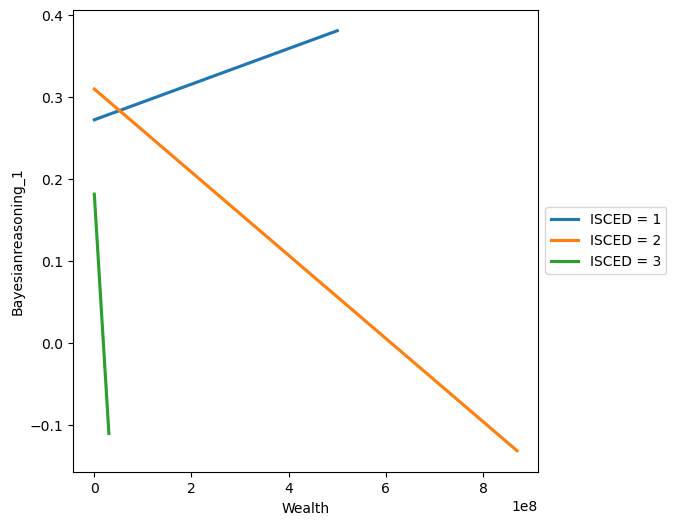

In [111]:
# Trend line for Absolute Bayesian Reasoning Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax12 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 3')

ax12.set(ylabel='Bayesianreasoning_1', xlabel='Wealth')
ax12.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [112]:
# Descriptive stats for the data set, isced = 1
# NA values of income are removed

df7 = df5
df7.drop(df7[df7['income'] == 7].index, inplace = True)

df7.loc[df7['isced']==1].describe()

age     age_rec  isced     income        wealth  Certainty_3  \
count  525.000000  525.000000  525.0  525.00000  5.250000e+02   525.000000   
mean    34.340952    2.405714    1.0    2.76000  9.589529e+06     0.651429   
std      9.031642    0.546646    0.0    1.34488  4.007188e+07     0.775596   
min     21.500000    2.000000    1.0    1.00000  1.000000e+00     0.000000   
25%     30.000000    2.000000    1.0    2.00000  2.500000e+05     0.000000   
50%     30.000000    2.000000    1.0    2.00000  1.050000e+06     0.000000   
75%     40.500000    3.000000    1.0    3.00000  5.000000e+06     1.000000   
max     70.000000    4.000000    1.0    6.00000  5.000000e+08     3.000000   

       RiskComprehension_4  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
count           525.000000       525.000000  525.000000           525.000000   
mean              1.076190         1.083810    1.641905             0.274286   
std               0.885585         0.935223    0.977493             0.446579   
min               0.000000         0.000000    0.000000             0.000000   
25%               0.000000         0.000000    1.000000             0.000000   
50%               1.000000         1.000000    2.000000             0.000000   
75%               2.000000         2.000000    3.000000             1.000000   
max               3.000000         3.000000    3.000000             1.000000   

       Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
count   525.000000           525.000000       525.000000  525.000000   
mean     21.714286            26.904762        36.126984   54.730159   
std      25.853187            22.139618        31.174098   32.583100   
min       0.000000             0.000000         0.000000    0.000000   
25%       0.000000             0.000000         0.000000   33.333333   
50%       0.000000            25.000000        33.333333   66.666667   
75%      33.333333            50.000000        66.666667  100.000000   
max     100.000000            75.000000       100.000000  100.000000   

       Bayesianreasoning_%  TotalScore_14  TotalScore_%  
count           525.000000     525.000000    525.000000  
mean             27.428571       4.727619     33.768707  
std              44.657915       2.107805     15.055751  
min               0.000000       1.000000      7.142857  
25%               0.000000       3.000000     21.428571  
50%               0.000000       4.000000     28.571429  
75%             100.000000       6.000000     42.857143  
max             100.000000      11.000000     78.571429

In [113]:
df7.loc[df7['isced']==2].describe()

age     age_rec  isced      income        wealth  Certainty_3  \
count  428.000000  428.000000  428.0  428.000000  4.280000e+02   428.000000   
mean    33.248832    2.345794    2.0    2.553738  1.179345e+07     0.682243   
std      9.487666    0.540670    0.0    1.366858  6.407987e+07     0.828058   
min     21.500000    2.000000    2.0    1.000000  0.000000e+00     0.000000   
25%     30.000000    2.000000    2.0    2.000000  2.500000e+05     0.000000   
50%     30.000000    2.000000    2.0    2.000000  1.000000e+06     0.000000   
75%     40.500000    3.000000    2.0    3.000000  5.000000e+06     1.000000   
max     70.000000    4.000000    2.0    6.000000  8.700000e+08     3.000000   

       RiskComprehension_4  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
count           428.000000       428.000000  428.000000           428.000000   
mean              1.109813         1.074766    1.728972             0.303738   
std               0.948114         0.942874    0.966125             0.460409   
min               0.000000         0.000000    0.000000             0.000000   
25%               0.000000         0.000000    1.000000             0.000000   
50%               1.000000         1.000000    2.000000             0.000000   
75%               2.000000         2.000000    3.000000             1.000000   
max               3.000000         3.000000    3.000000             1.000000   

       Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
count   428.000000           428.000000       428.000000  428.000000   
mean     22.741433            27.745327        35.825545   57.632399   
std      27.601918            23.702846        31.429117   32.204167   
min       0.000000             0.000000         0.000000    0.000000   
25%       0.000000             0.000000         0.000000   33.333333   
50%       0.000000            25.000000        33.333333   66.666667   
75%      33.333333            50.000000        66.666667  100.000000   
max     100.000000            75.000000       100.000000  100.000000   

       Bayesianreasoning_%  TotalScore_14  TotalScore_%  
count           428.000000     428.000000    428.000000  
mean             30.373832       4.899533     34.996662  
std              46.040919       2.291763     16.369736  
min               0.000000       0.000000      0.000000  
25%               0.000000       3.000000     21.428571  
50%               0.000000       5.000000     35.714286  
75%             100.000000       6.000000     42.857143  
max             100.000000      13.000000     92.857143

In [114]:
df7.loc[df7['isced']==3].describe()

age    age_rec  isced     income        wealth  Certainty_3  \
count  32.000000  32.000000   32.0  32.000000  3.200000e+01    32.000000   
mean   35.515625   2.500000    3.0   2.000000  2.612424e+06     0.875000   
std    12.681256   0.622171    0.0   1.481063  6.397476e+06     0.832796   
min    21.500000   2.000000    3.0   1.000000  0.000000e+00     0.000000   
25%    30.000000   2.000000    3.0   1.000000  1.900000e+04     0.000000   
50%    30.000000   2.000000    3.0   1.000000  1.750000e+05     1.000000   
75%    40.500000   3.000000    3.0   2.250000  6.753750e+05     1.000000   
max    70.000000   4.000000    3.0   6.000000  3.000000e+07     3.000000   

       RiskComprehension_4  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
count            32.000000        32.000000   32.000000            32.000000   
mean              0.812500         0.937500    1.375000             0.156250   
std               0.780302         1.045343    1.128802             0.368902   
min               0.000000         0.000000    0.000000             0.000000   
25%               0.000000         0.000000    0.000000             0.000000   
50%               1.000000         1.000000    1.000000             0.000000   
75%               1.000000         1.250000    2.000000             0.000000   
max               2.000000         3.000000    3.000000             1.000000   

       Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
count    32.000000            32.000000        32.000000   32.000000   
mean     29.166667            20.312500        31.250000   45.833333   
std      27.759851            19.507546        34.844766   37.626727   
min       0.000000             0.000000         0.000000    0.000000   
25%       0.000000             0.000000         0.000000    0.000000   
50%      33.333333            25.000000        33.333333   33.333333   
75%      33.333333            25.000000        41.666667   66.666667   
max     100.000000            50.000000       100.000000  100.000000   

       Bayesianreasoning_%  TotalScore_14  TotalScore_%  
count            32.000000      32.000000     32.000000  
mean             15.625000       4.156250     29.687500  
std              36.890203       2.329466     16.639042  
min               0.000000       0.000000      0.000000  
25%               0.000000       3.000000     21.428571  
50%               0.000000       3.500000     25.000000  
75%               0.000000       6.000000     42.857143  
max             100.000000       9.000000     64.285714

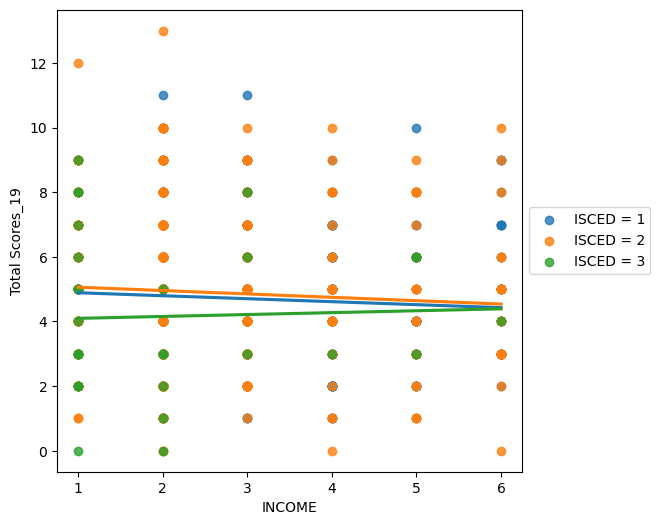

In [115]:
# Trend line for Absolute Tota Facet Score vs income reponses sorted by isced and ORDERED by income WITH scatter

fig, ax7 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = df7.loc[df7['isced']==1]['TotalScore_14'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 1')
sns.regplot (data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = df7.loc[df7['isced']==2]['TotalScore_14'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 2')
sns.regplot (data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = df7.loc[df7['isced']==3]['TotalScore_14'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 3')

ax7.set(ylabel='Total Scores_19', xlabel='INCOME')
ax7.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

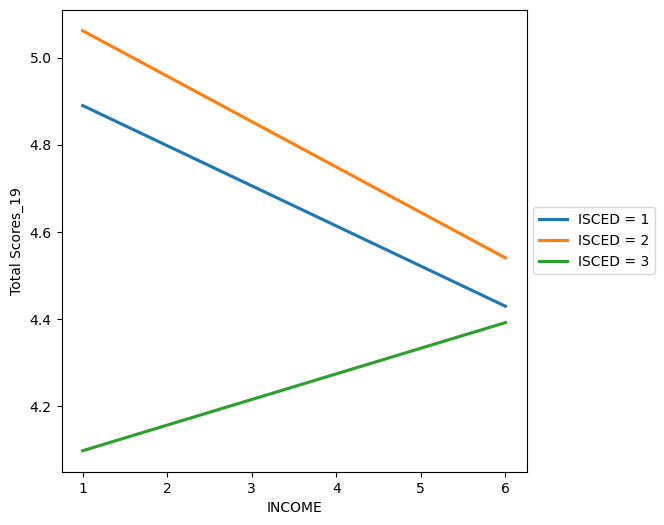

In [116]:
# Trend line for Absolute Tota Facet Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax8 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'TotalScore_14', fit_reg=True, ci=None, ax=ax8, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'TotalScore_14', fit_reg=True, ci=None, ax=ax8, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'TotalScore_14', fit_reg=True, ci=None, ax=ax8, label='ISCED = 3')

ax8.set(ylabel='Total Scores_19', xlabel='INCOME')
ax8.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

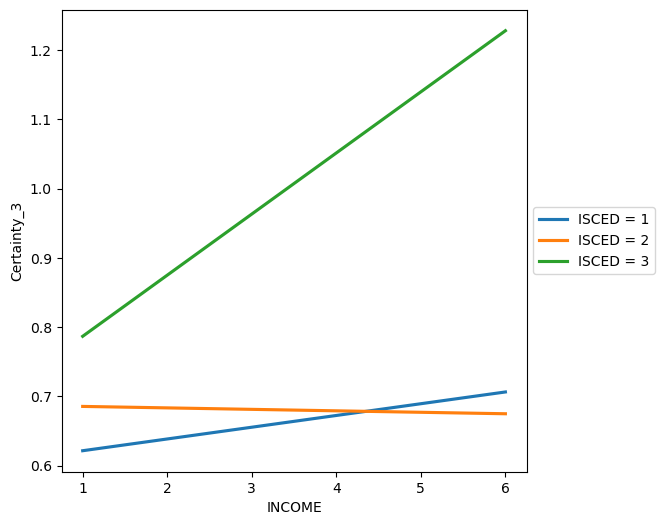

In [117]:
# Trend line for Absolute Certainty Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax9 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'Certainty_3', fit_reg=True, ci=None, ax=ax9, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'Certainty_3', fit_reg=True, ci=None, ax=ax9, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'Certainty_3', fit_reg=True, ci=None, ax=ax9, label='ISCED = 3')

ax9.set(ylabel='Certainty_3', xlabel='INCOME')
ax9.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

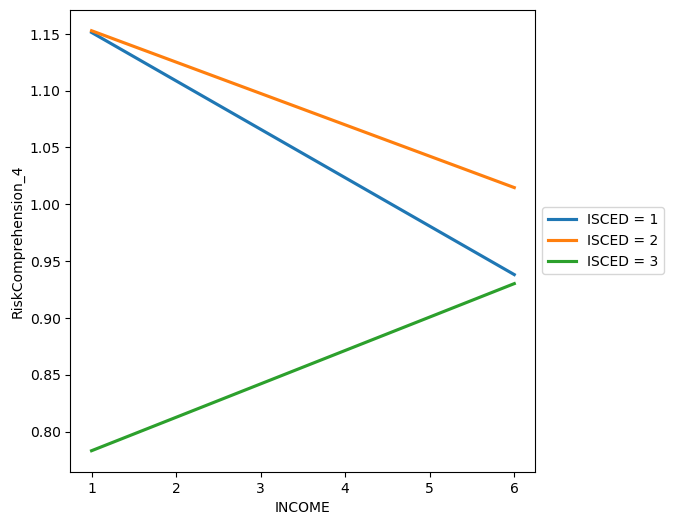

In [118]:
# Trend line for Absolute Risk Comprehension Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax10 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax10, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax10, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax10, label='ISCED = 3')

ax10.set(ylabel='RiskComprehension_4', xlabel='INCOME')
ax10.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

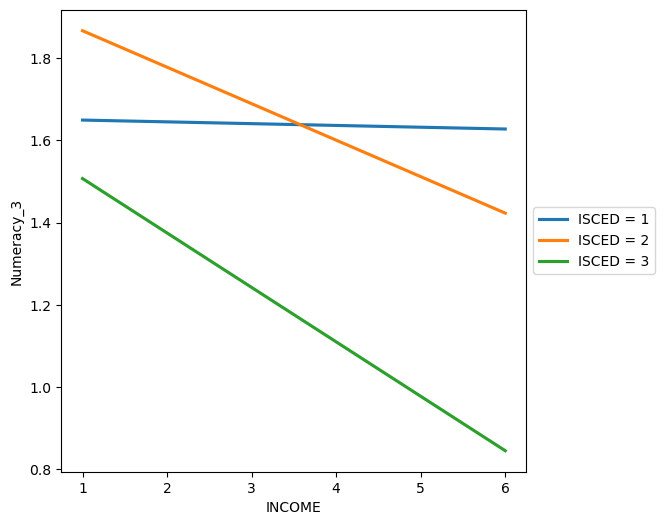

In [119]:
# Trend line for Absolute Number Comprehension Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='Numeracy_3', xlabel='INCOME')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

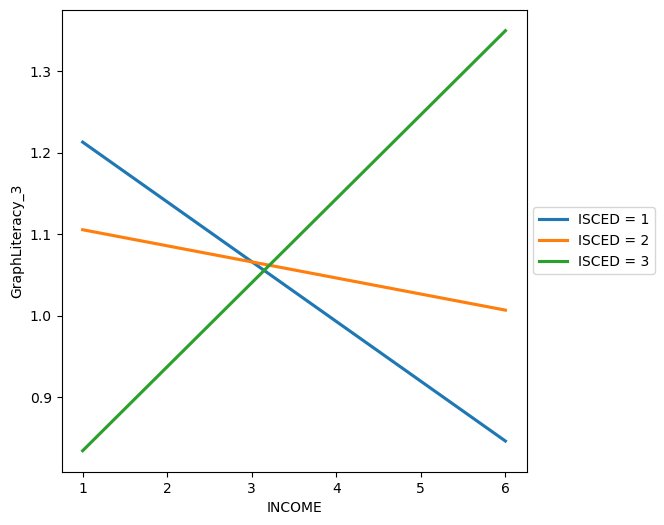

In [120]:
# Trend line for Absolute Graph Comprehension Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='GraphLiteracy_3', xlabel='INCOME')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

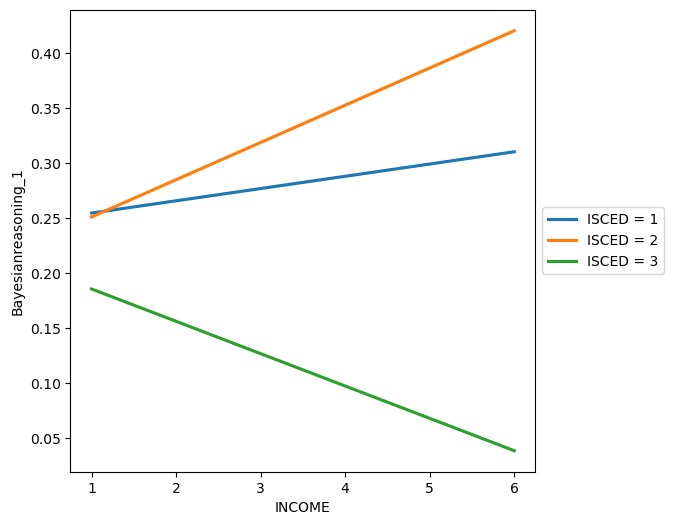

In [121]:
# Trend line for Absolute Bayesian Reasoning Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax12 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 3')

ax12.set(ylabel='Bayesianreasoning_1', xlabel='INCOME')
ax12.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [122]:
df7

#   age  age_rec  isced  income    wealth  \
0    i4ipejjfq0rnwbbi4ipe025xluvm5s8d  40.5        3      1       6    850000   
1    fdgu6z978d91tquervfdgu6z6j6nutt1  30.0        2      1       2        10   
2    ff9rrxl271u8oarkff9rypsrml3aewt8  30.0        2      1       2  10000000   
3    sm67z605u7x7he9zjss0qdbjsm67z6wc  21.5        2      1       3    350000   
4    fgvoot3ywvc1yfvm9m89y2fgvoot332v  30.0        2      1       2        30   
..                                ...   ...      ...    ...     ...       ...   
980  eau4o2cunbe58icx2ameau4ontwd5izg  40.5        3      3       1    125000   
981  ay6yqxe7agj90e0mqpzcay69gpc4ljtr  50.5        3      3       3  15000000   
982  17z0ue9f3y4vs17z00et5fi41iwxtpaa  21.5        2      3       1     20000   
983  2oe2qtnajnmekk32oe2qtf1f9cymy3af  30.0        2      3       3     20000   
984  a31qwuv5yj3n5tlmea3183d7y7salhcl  30.0        2      3       1   5000000   

     Certainty_3  RiskComprehension_4  GraphLiteracy_3  Numeracy_3  \
0              1                    0                0           1   
1              0                    1                0           1   
2              1                    2                2           2   
3              1                    3                1           0   
4              0                    0                1           1   
..           ...                  ...              ...         ...   
980            1                    2                3           2   
981            3                    1                1           3   
982            0                    0                1           1   
983            0                    0                0           2   
984            0                    1                0           2   

     Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
0                      1    33.333333                  0.0         0.000000   
1                      0     0.000000                 25.0         0.000000   
2                      0    33.333333                 50.0        66.666667   
3                      0    33.333333                 75.0        33.333333   
4                      0     0.000000                  0.0        33.333333   
..                   ...          ...                  ...              ...   
980                    0    33.333333                 50.0       100.000000   
981                    0   100.000000                 25.0        33.333333   
982                    0     0.000000                  0.0        33.333333   
983                    1     0.000000                  0.0         0.000000   
984                    0     0.000000                 25.0         0.000000   

     Numeracy_%  Bayesianreasoning_%  TotalScore_14  TotalScore_%  
0     33.333333                100.0              3     21.428571  
1     33.333333                  0.0              2     14.285714  
2     66.666667                  0.0              7     50.000000  
3      0.000000                  0.0              5     35.714286  
4     33.333333                  0.0              2     14.285714  
..          ...                  ...            ...           ...  
980   66.666667                  0.0              8     57.142857  
981  100.000000                  0.0              8     57.142857  
982   33.333333                  0.0              2     14.285714  
983   66.666667                100.0              3     21.428571  
984   66.666667                  0.0              3     21.428571  

[985 rows x 18 columns]

In [123]:
# Since we already have a classification for Age groups in the form of age_rec, we will use that.
# We will also use median of age to see if it yields any relevant results, as instructed.

# AXES to be used = Age or age groups, ISCED, Income

# Age groups = [2,3,4]
# Age group 2 = 18 to 35 y/o
# Age group 3 = 36 to 59 y/o
# Age group 4 = 60 to 75 y/o (75 y/o, i.e, within the scope of the data we have, it can mean 60 and above also)



In [124]:
df7.loc[(df7['age_rec']==2)].describe()

age  age_rec       isced      income        wealth  Certainty_3  \
count  639.000000    639.0  639.000000  639.000000  6.390000e+02   639.000000   
mean    28.084507      2.0    1.516432    2.543036  8.317083e+06     0.641628   
std      3.554201      0.0    0.553668    1.278326  4.743555e+07     0.766596   
min     21.500000      2.0    1.000000    1.000000  0.000000e+00     0.000000   
25%     30.000000      2.0    1.000000    2.000000  2.000000e+05     0.000000   
50%     30.000000      2.0    1.000000    2.000000  1.000000e+06     0.000000   
75%     30.000000      2.0    2.000000    3.000000  3.500000e+06     1.000000   
max     30.000000      2.0    3.000000    6.000000  8.700000e+08     3.000000   

       RiskComprehension_4  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
count           639.000000       639.000000  639.000000           639.000000   
mean              1.076682         1.056338    1.671362             0.276995   
std               0.922755         0.921675    0.976997             0.447865   
min               0.000000         0.000000    0.000000             0.000000   
25%               0.000000         0.000000    1.000000             0.000000   
50%               1.000000         1.000000    2.000000             0.000000   
75%               2.000000         2.000000    3.000000             1.000000   
max               3.000000         3.000000    3.000000             1.000000   

       Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
count   639.000000           639.000000       639.000000  639.000000   
mean     21.387585            26.917058        35.211268   55.712050   
std      25.553187            23.068883        30.722515   32.566571   
min       0.000000             0.000000         0.000000    0.000000   
25%       0.000000             0.000000         0.000000   33.333333   
50%       0.000000            25.000000        33.333333   66.666667   
75%      33.333333            50.000000        66.666667  100.000000   
max     100.000000            75.000000       100.000000  100.000000   

       Bayesianreasoning_%  TotalScore_14  TotalScore_%  
count           639.000000     639.000000    639.000000  
mean             27.699531       4.723005     33.735748  
std              44.786472       2.153939     15.385280  
min               0.000000       0.000000      0.000000  
25%               0.000000       3.000000     21.428571  
50%               0.000000       5.000000     35.714286  
75%             100.000000       6.000000     42.857143  
max             100.000000      13.000000     92.857143

In [125]:
df7.loc[(df7['age_rec']==3)].describe()

age  age_rec       isced      income        wealth  Certainty_3  \
count  315.000000    315.0  315.000000  315.000000  3.150000e+02   315.000000   
mean    42.912698      3.0    1.457143    2.885714  1.433067e+07     0.726984   
std      4.285344      0.0    0.570427    1.488690  6.047906e+07     0.871562   
min     40.500000      3.0    1.000000    1.000000  0.000000e+00     0.000000   
25%     40.500000      3.0    1.000000    2.000000  3.000000e+05     0.000000   
50%     40.500000      3.0    1.000000    2.000000  1.500000e+06     0.000000   
75%     40.500000      3.0    2.000000    4.000000  7.350000e+06     1.000000   
max     50.500000      3.0    3.000000    6.000000  6.000000e+08     3.000000   

       RiskComprehension_4  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
count           315.000000       315.000000  315.000000           315.000000   
mean              1.073016         1.063492    1.676190             0.292063   
std               0.891075         0.962233    0.979034             0.455435   
min               0.000000         0.000000    0.000000             0.000000   
25%               0.000000         0.000000    1.000000             0.000000   
50%               1.000000         1.000000    2.000000             0.000000   
75%               2.000000         2.000000    3.000000             1.000000   
max               3.000000         3.000000    3.000000             1.000000   

       Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
count   315.000000           315.000000       315.000000  315.000000   
mean     24.232804            26.825397        35.449735   55.873016   
std      29.052058            22.276876        32.074431   32.634469   
min       0.000000             0.000000         0.000000    0.000000   
25%       0.000000             0.000000         0.000000   33.333333   
50%       0.000000            25.000000        33.333333   66.666667   
75%      33.333333            50.000000        66.666667  100.000000   
max     100.000000            75.000000       100.000000  100.000000   

       Bayesianreasoning_%  TotalScore_14  TotalScore_%  
count           315.000000     315.000000    315.000000  
mean             29.206349       4.831746     34.512472  
std              45.543483       2.279850     16.284641  
min               0.000000       0.000000      0.000000  
25%               0.000000       3.000000     21.428571  
50%               0.000000       5.000000     35.714286  
75%             100.000000       6.000000     42.857143  
max             100.000000      11.000000     78.571429

In [126]:
df7.loc[(df7['age_rec']==4)].describe()

age  age_rec      isced     income        wealth  Certainty_3  \
count  31.000000     31.0  31.000000  31.000000  3.100000e+01    31.000000   
mean   62.338710      4.0   1.580645   2.322581  1.086838e+07     0.741935   
std     3.815292      0.0   0.620440   1.535949  1.571499e+07     0.728823   
min    60.500000      4.0   1.000000   1.000000  2.000000e+04     0.000000   
25%    60.500000      4.0   1.000000   1.000000  1.125000e+06     0.000000   
50%    60.500000      4.0   2.000000   2.000000  3.000000e+06     1.000000   
75%    60.500000      4.0   2.000000   2.000000  1.000000e+07     1.000000   
max    70.000000      4.0   3.000000   6.000000  5.250000e+07     3.000000   

       RiskComprehension_4  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
count            31.000000        31.000000   31.000000            31.000000   
mean              1.290323         1.580645    1.612903             0.322581   
std               0.863850         1.025482    1.054433             0.475191   
min               0.000000         0.000000    0.000000             0.000000   
25%               1.000000         1.000000    1.000000             0.000000   
50%               1.000000         2.000000    1.000000             0.000000   
75%               2.000000         2.000000    3.000000             1.000000   
max               3.000000         3.000000    3.000000             1.000000   

       Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
count    31.000000            31.000000        31.000000   31.000000   
mean     24.731183            32.258065        52.688172   53.763441   
std      24.294096            21.596246        34.182726   35.147751   
min       0.000000             0.000000         0.000000    0.000000   
25%       0.000000            25.000000        33.333333   33.333333   
50%      33.333333            25.000000        66.666667   33.333333   
75%      33.333333            50.000000        66.666667  100.000000   
max     100.000000            75.000000       100.000000  100.000000   

       Bayesianreasoning_%  TotalScore_14  TotalScore_%  
count            31.000000      31.000000     31.000000  
mean             32.258065       5.548387     39.631336  
std              47.519096       2.203614     15.740099  
min               0.000000       2.000000     14.285714  
25%               0.000000       4.000000     28.571429  
50%               0.000000       5.000000     35.714286  
75%             100.000000       7.500000     53.571429  
max             100.000000       9.000000     64.285714

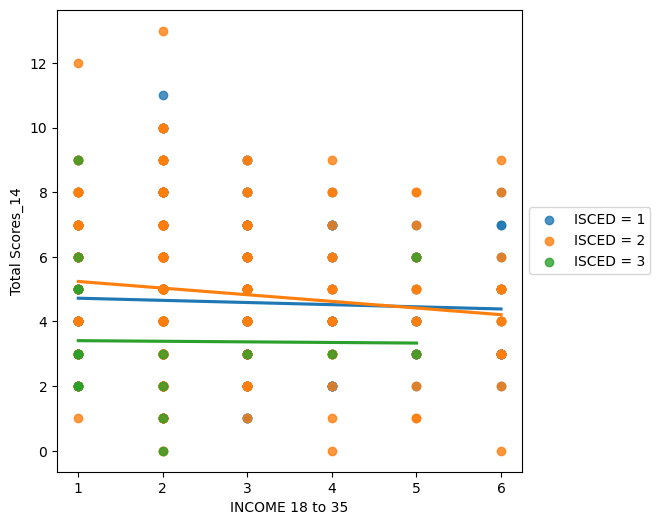

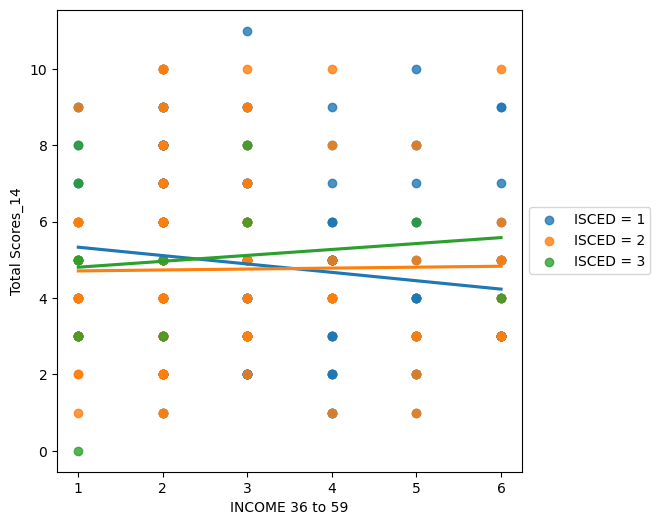

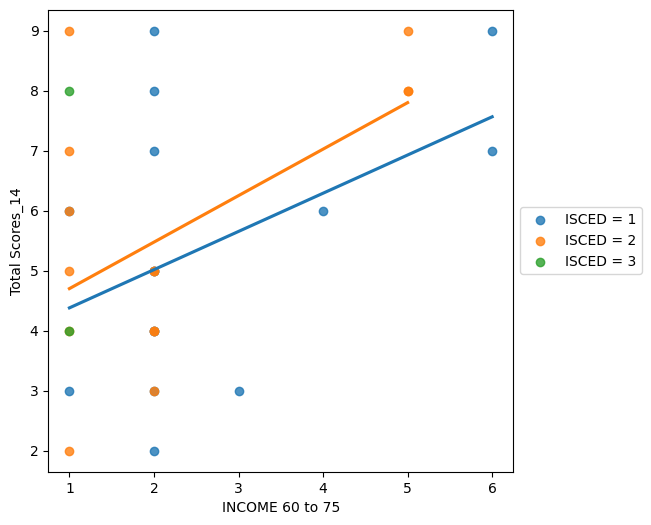

In [127]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Total Scores_14', xlabel='INCOME 18 to 35')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_14', xlabel='INCOME 36 to 59')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Total Scores_14', xlabel='INCOME 60 to 75')
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

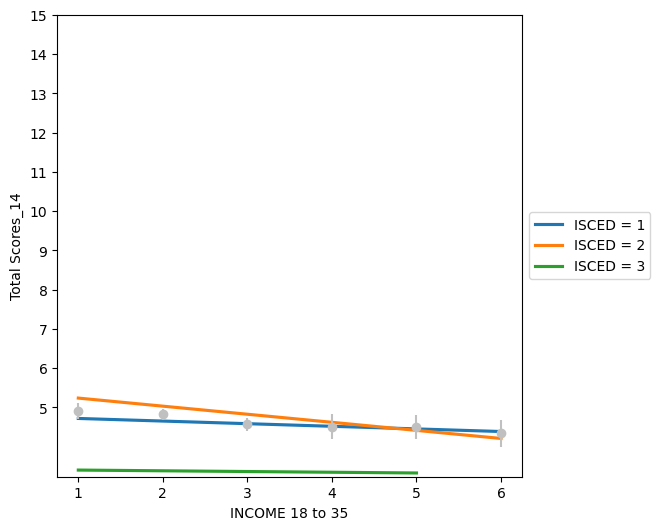

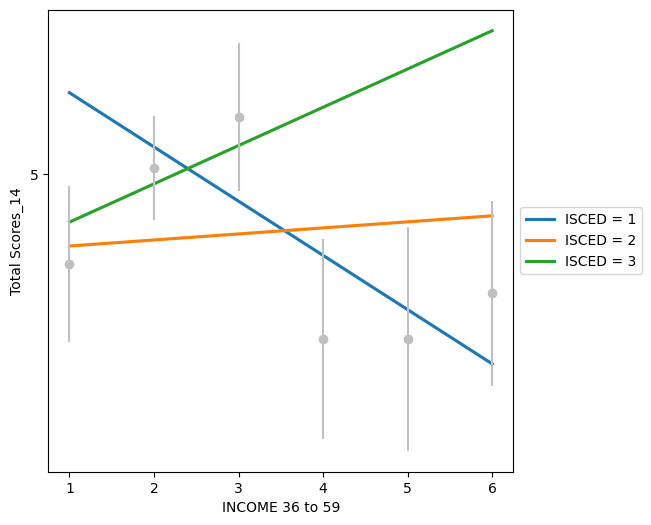

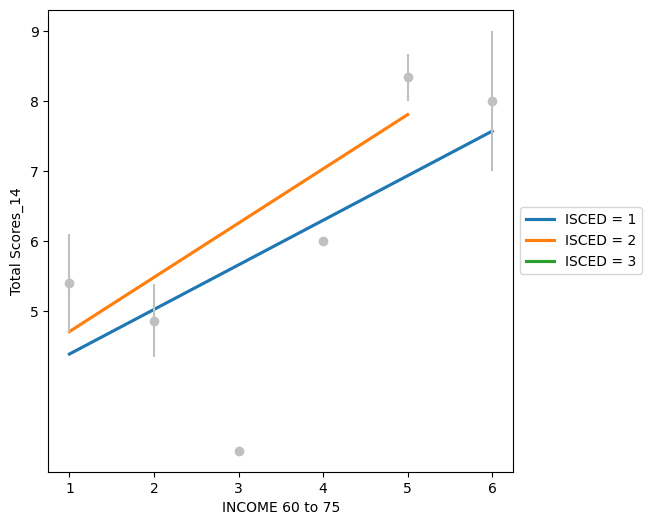

In [128]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['income']).mean(numeric_only=True)['TotalScore_14'], yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['TotalScore_14'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Total Scores_14', xlabel='INCOME 18 to 35',  yticks = np.arange(5, 16 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_14', xlabel='INCOME 36 to 59',  yticks = np.arange(5, 16 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['income']).mean(numeric_only=True)['TotalScore_14'], yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['TotalScore_14'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Total Scores_14', xlabel='INCOME 60 to 75',  yticks = np.arange(5, 16 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==4  ].groupby(['income']).mean(numeric_only=True)['TotalScore_14'], yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['TotalScore_14'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

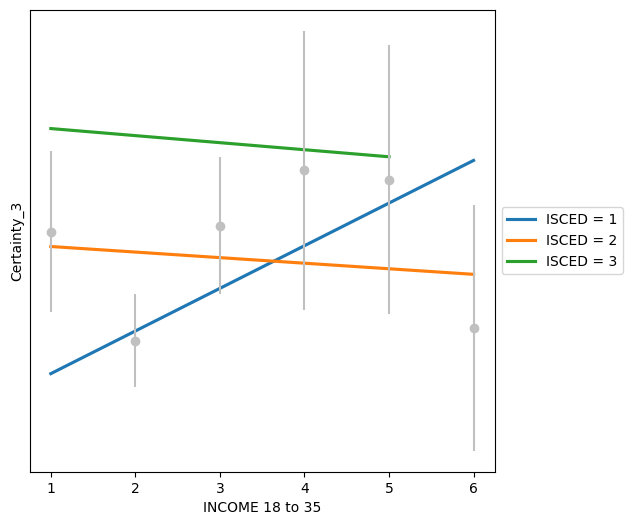

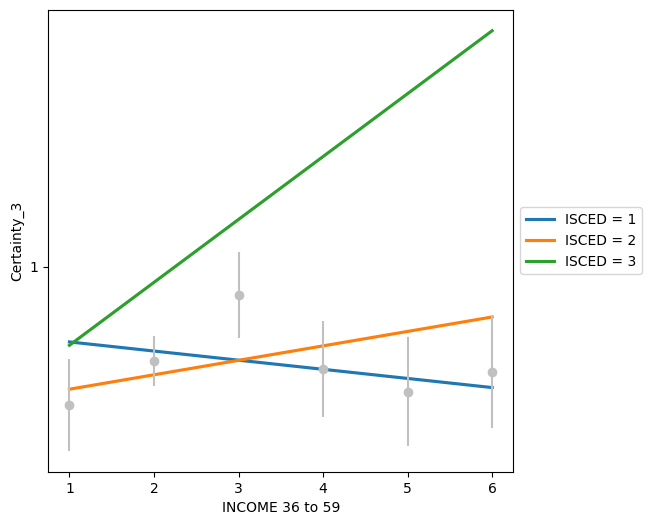

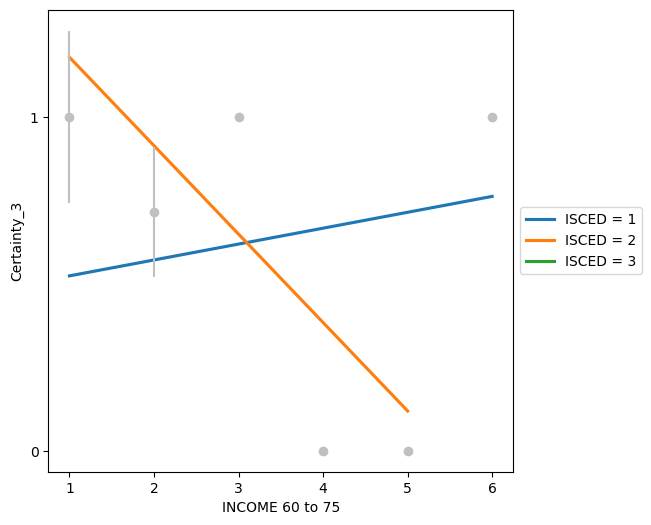

In [129]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Certainty_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Certainty_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Certainty_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Certainty_3', xlabel='INCOME 18 to 35',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['income'])['Certainty_3'].mean(), yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['Certainty_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Certainty_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Certainty_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Certainty_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Certainty_3', xlabel='INCOME 36 to 59',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['income'])['Certainty_3'].mean(), yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['Certainty_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Certainty_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Certainty_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Certainty_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Certainty_3', xlabel='INCOME 60 to 75',  yticks = np.arange(0, 6 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==4  ].groupby(['income'])['Certainty_3'].mean(), yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['Certainty_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

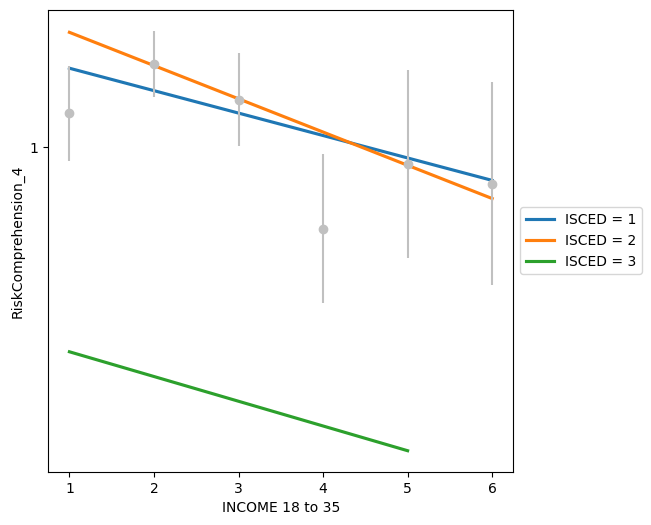

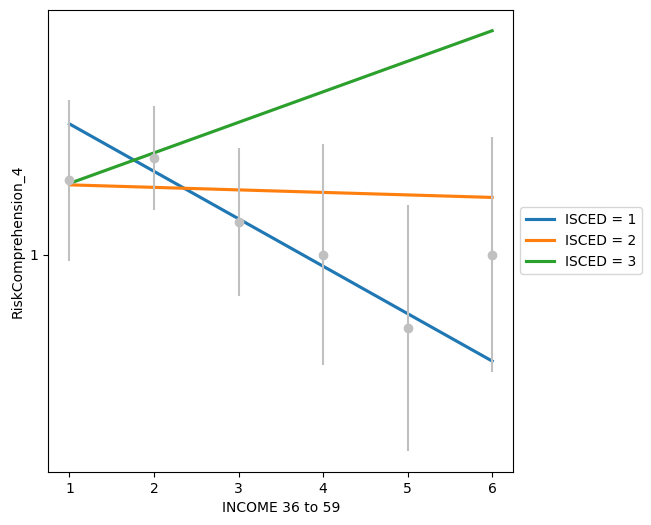

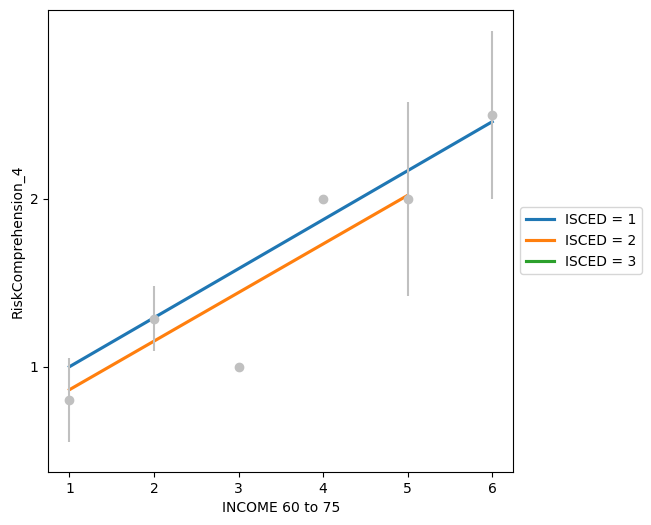

In [130]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='RiskComprehension_4', xlabel='INCOME 18 to 35',  yticks = np.arange(0, 3 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['income'])['RiskComprehension_4'].mean(), yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['RiskComprehension_4'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='RiskComprehension_4', xlabel='INCOME 36 to 59',  yticks = np.arange(0, 3 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['income'])['RiskComprehension_4'].mean(), yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['RiskComprehension_4'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='RiskComprehension_4', xlabel='INCOME 60 to 75',  yticks = np.arange(0, 3 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==4  ].groupby(['income'])['RiskComprehension_4'].mean(), yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['RiskComprehension_4'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

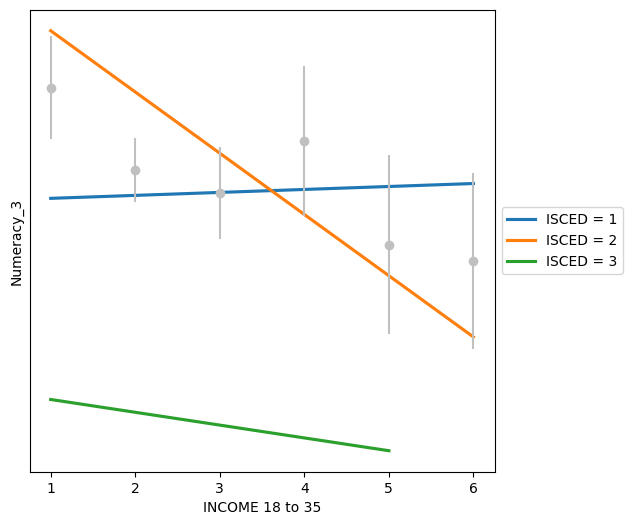

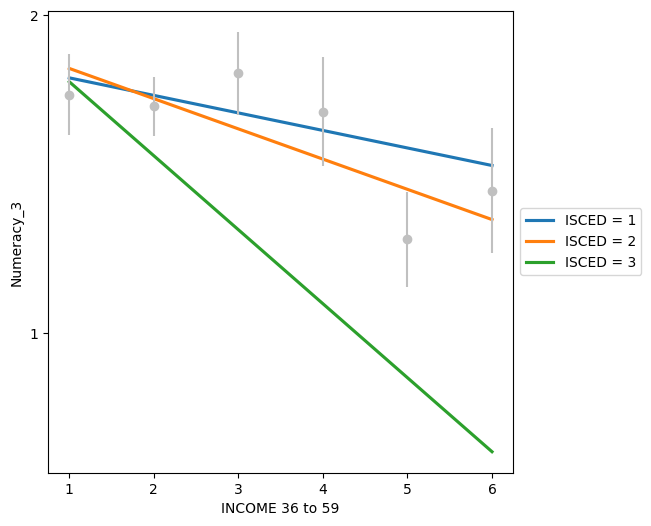

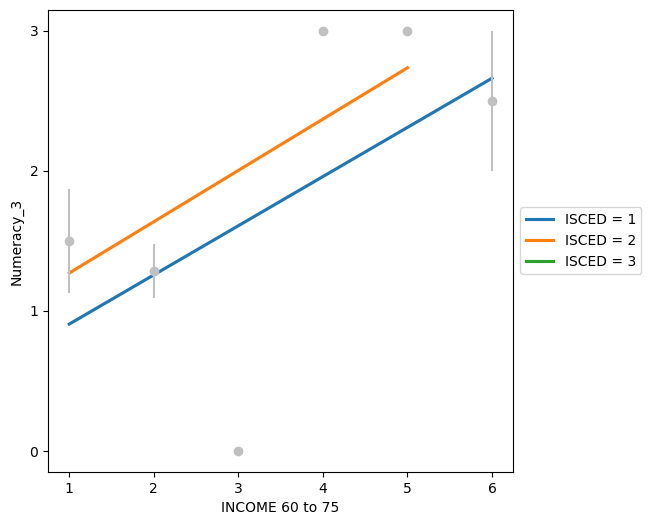

In [131]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Numeracy_3', xlabel='INCOME 18 to 35',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['income'])['Numeracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['Numeracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Numeracy_3', xlabel='INCOME 36 to 59',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['income'])['Numeracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['Numeracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Numeracy_3', xlabel='INCOME 60 to 75',  yticks = np.arange(0, 6 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==4  ].groupby(['income'])['Numeracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['Numeracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

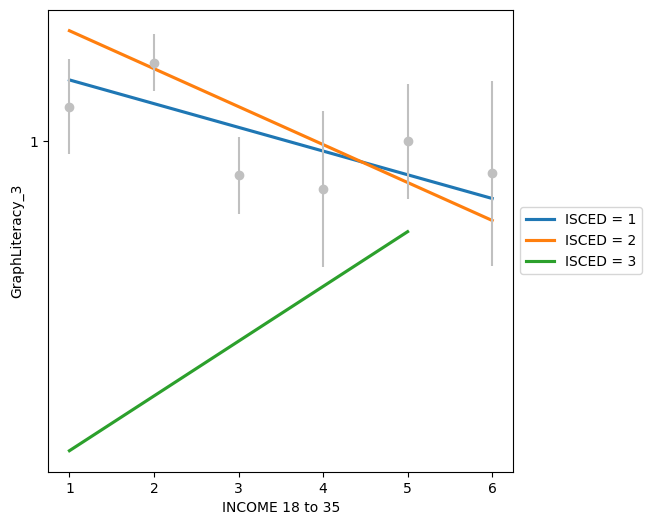

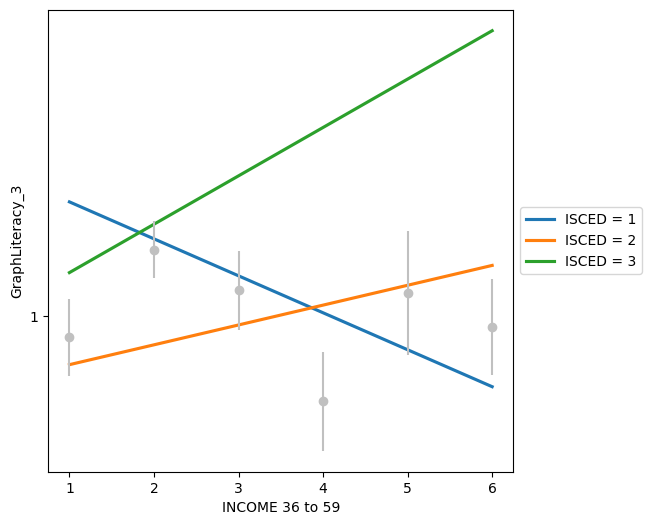

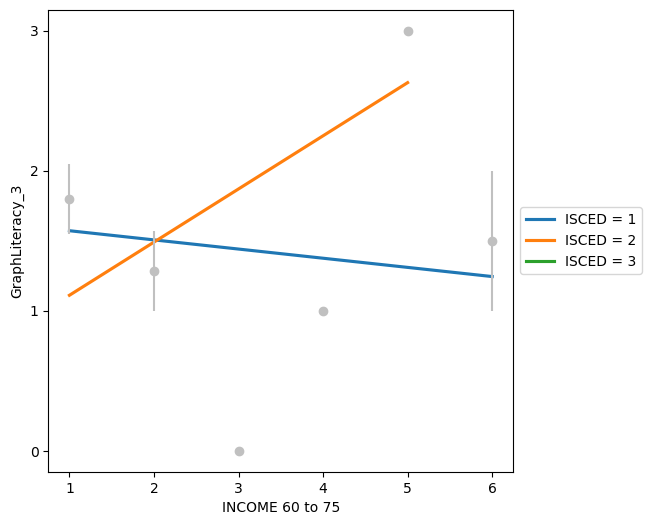

In [132]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='GraphLiteracy_3', xlabel='INCOME 18 to 35',  yticks = np.arange(0, 4 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['income'])['GraphLiteracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='GraphLiteracy_3', xlabel='INCOME 36 to 59',  yticks = np.arange(0, 4 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['income'])['GraphLiteracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='GraphLiteracy_3', xlabel='INCOME 60 to 75',  yticks = np.arange(0, 4 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==4  ].groupby(['income'])['GraphLiteracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

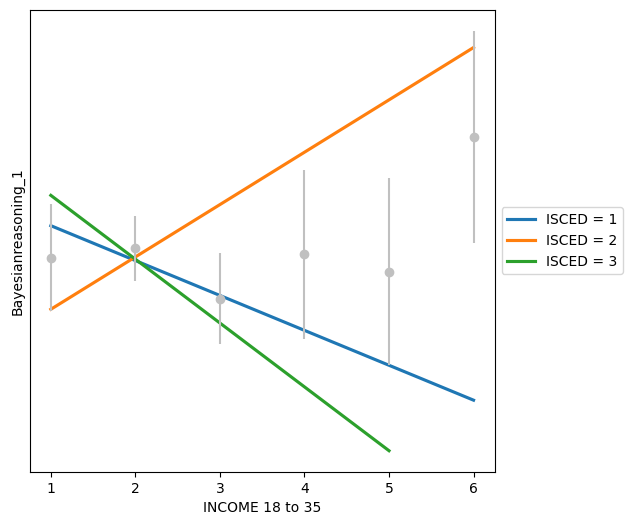

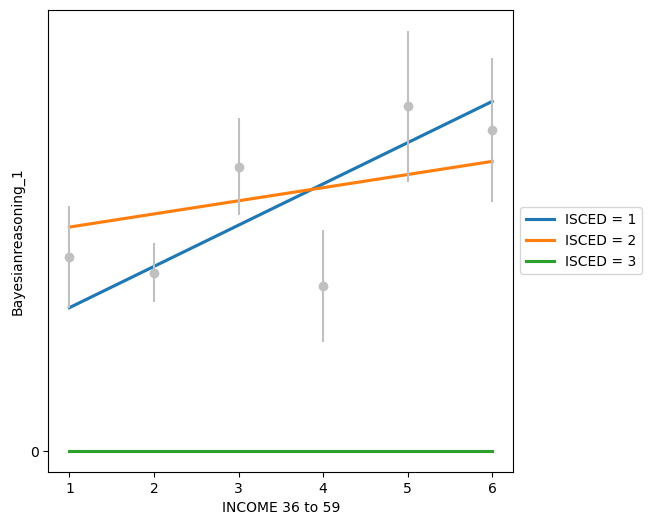

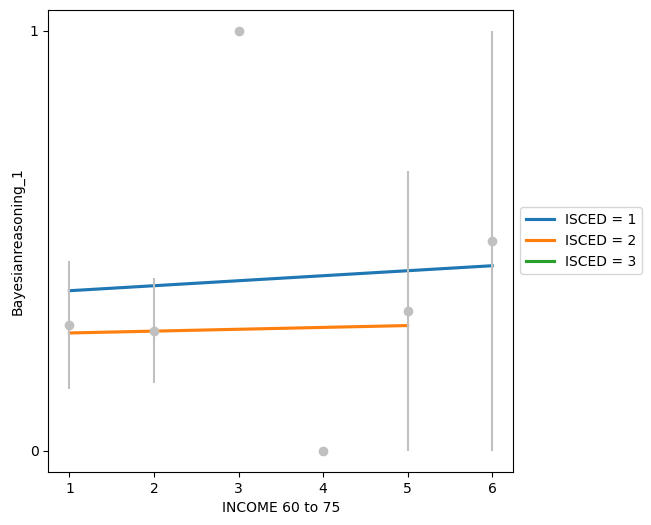

In [133]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Bayesianreasoning_1', xlabel='INCOME 18 to 35',  yticks = np.arange(0, 5 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['income'])['Bayesianreasoning_1'].mean(), yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Bayesianreasoning_1', xlabel='INCOME 36 to 59',  yticks = np.arange(0, 5 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['income'])['Bayesianreasoning_1'].mean(), yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Bayesianreasoning_1', xlabel='INCOME 60 to 75',  yticks = np.arange(0, 5 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==4  ].groupby(['income'])['Bayesianreasoning_1'].mean(), yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

In [134]:
# Age median method
# Age_median
df1["Please mark your age (in years)"].value_counts()

Please mark your age (in years)
25 - 35     495
36 - 45     239
18 - 25     144
46 - 55      76
56 - 65      25
Above 65      6
Name: count, dtype: int64

In [135]:
age_m = (495*(25+35)/2 + ((36 + 45)/2)*239 + ((18 + 25)/2)*144 + ((46 + 55)/2)*76 + ((56 + 65 )/2)*25 +  ((65+75)/2)*6)/(495+239+144+76+25+6)
age_m

33.904568527918784

In [136]:
df7["income"].value_counts()

income
2    425
3    197
1    159
4     77
5     64
6     63
Name: count, dtype: int64

In [137]:
df7.loc[(df7['age'] < age_m)].describe()

age  age_rec       isced      income        wealth  Certainty_3  \
count  639.000000    639.0  639.000000  639.000000  6.390000e+02   639.000000   
mean    28.084507      2.0    1.516432    2.543036  8.317083e+06     0.641628   
std      3.554201      0.0    0.553668    1.278326  4.743555e+07     0.766596   
min     21.500000      2.0    1.000000    1.000000  0.000000e+00     0.000000   
25%     30.000000      2.0    1.000000    2.000000  2.000000e+05     0.000000   
50%     30.000000      2.0    1.000000    2.000000  1.000000e+06     0.000000   
75%     30.000000      2.0    2.000000    3.000000  3.500000e+06     1.000000   
max     30.000000      2.0    3.000000    6.000000  8.700000e+08     3.000000   

       RiskComprehension_4  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
count           639.000000       639.000000  639.000000           639.000000   
mean              1.076682         1.056338    1.671362             0.276995   
std               0.922755         0.921675    0.976997             0.447865   
min               0.000000         0.000000    0.000000             0.000000   
25%               0.000000         0.000000    1.000000             0.000000   
50%               1.000000         1.000000    2.000000             0.000000   
75%               2.000000         2.000000    3.000000             1.000000   
max               3.000000         3.000000    3.000000             1.000000   

       Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
count   639.000000           639.000000       639.000000  639.000000   
mean     21.387585            26.917058        35.211268   55.712050   
std      25.553187            23.068883        30.722515   32.566571   
min       0.000000             0.000000         0.000000    0.000000   
25%       0.000000             0.000000         0.000000   33.333333   
50%       0.000000            25.000000        33.333333   66.666667   
75%      33.333333            50.000000        66.666667  100.000000   
max     100.000000            75.000000       100.000000  100.000000   

       Bayesianreasoning_%  TotalScore_14  TotalScore_%  
count           639.000000     639.000000    639.000000  
mean             27.699531       4.723005     33.735748  
std              44.786472       2.153939     15.385280  
min               0.000000       0.000000      0.000000  
25%               0.000000       3.000000     21.428571  
50%               0.000000       5.000000     35.714286  
75%             100.000000       6.000000     42.857143  
max             100.000000      13.000000     92.857143

In [138]:
df7.loc[(df7['age'] > age_m)].describe()

age     age_rec       isced      income        wealth  \
count  346.000000  346.000000  346.000000  346.000000  3.460000e+02   
mean    44.653179    3.089595    1.468208    2.835260  1.402047e+07   
std      6.989305    0.286015    0.575213    1.499381  5.789221e+07   
min     40.500000    3.000000    1.000000    1.000000  0.000000e+00   
25%     40.500000    3.000000    1.000000    2.000000  3.000000e+05   
50%     40.500000    3.000000    1.000000    2.000000  2.000000e+06   
75%     50.500000    3.000000    2.000000    4.000000  7.500000e+06   
max     70.000000    4.000000    3.000000    6.000000  6.000000e+08   

       Certainty_3  RiskComprehension_4  GraphLiteracy_3  Numeracy_3  \
count   346.000000           346.000000       346.000000  346.000000   
mean      0.728324             1.092486         1.109827    1.670520   
std       0.858820             0.889619         0.977762    0.984576   
min       0.000000             0.000000         0.000000    0.000000   
25%       0.000000             0.000000         0.000000    1.000000   
50%       1.000000             1.000000         1.000000    2.000000   
75%       1.000000             2.000000         2.000000    3.000000   
max       3.000000             3.000000         3.000000    3.000000   

       Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
count           346.000000   346.000000           346.000000       346.000000   
mean              0.294798    24.277457            27.312139        36.994220   
std               0.456612    28.627342            22.240470        32.592076   
min               0.000000     0.000000             0.000000         0.000000   
25%               0.000000     0.000000             0.000000         0.000000   
50%               0.000000    33.333333            25.000000        33.333333   
75%               1.000000    33.333333            50.000000        66.666667   
max               1.000000   100.000000            75.000000       100.000000   

       Numeracy_%  Bayesianreasoning_%  TotalScore_14  TotalScore_%  
count  346.000000           346.000000     346.000000    346.000000  
mean    55.684008            29.479769       4.895954     34.971098  
std     32.819190            45.661209       2.279241     16.280294  
min      0.000000             0.000000       0.000000      0.000000  
25%     33.333333             0.000000       3.000000     21.428571  
50%     66.666667             0.000000       5.000000     35.714286  
75%    100.000000           100.000000       6.000000     42.857143  
max    100.000000           100.000000      11.000000     78.571429

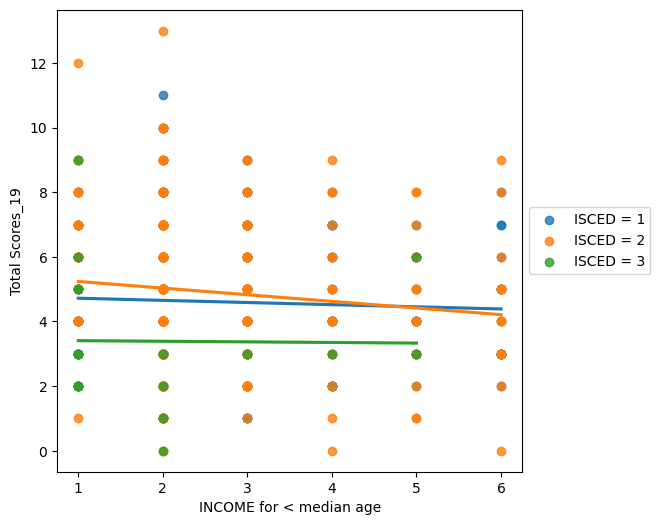

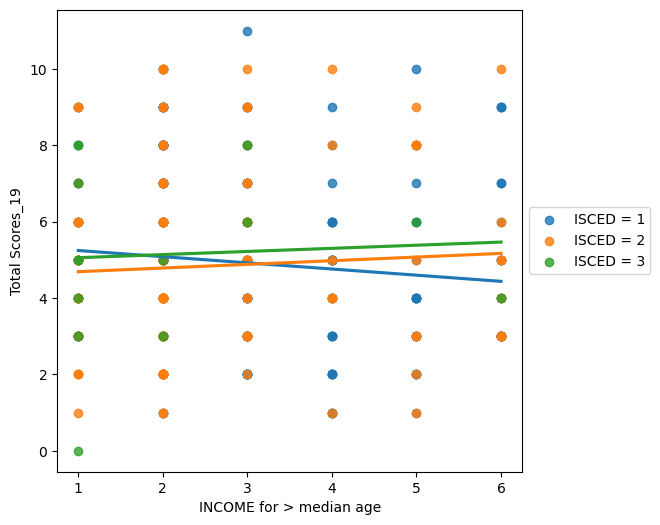

In [139]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Total Scores_19', xlabel='INCOME for < median age')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_19', xlabel='INCOME for > median age')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

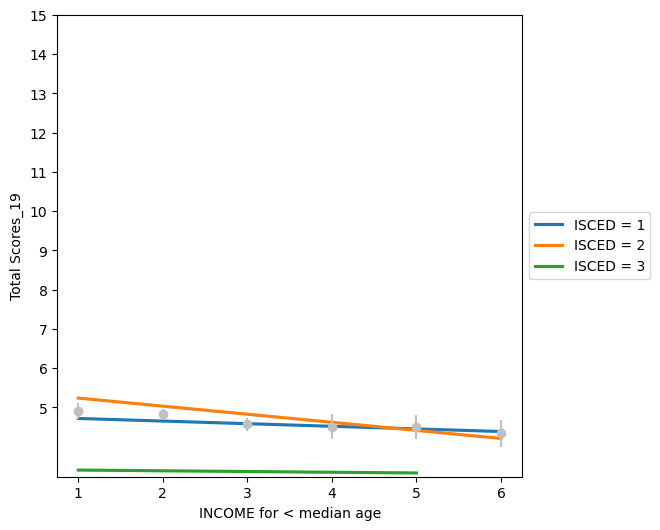

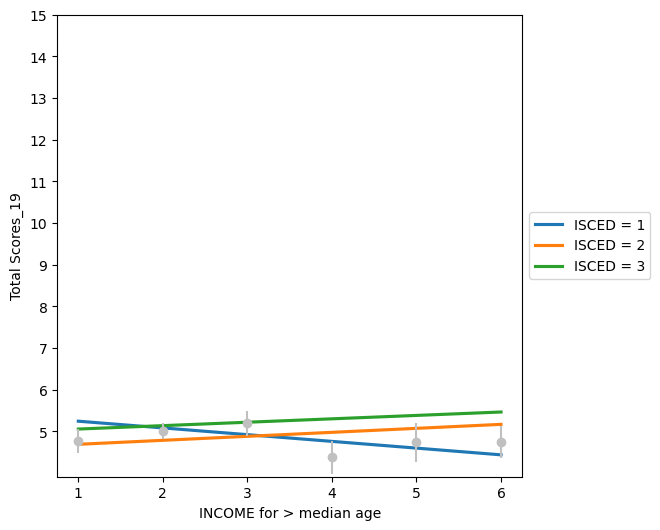

In [140]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['TotalScore_14'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['TotalScore_14'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Total Scores_19', xlabel='INCOME for < median age',  yticks = np.arange(5, 16 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] > age_m)  ].groupby(['income'])['TotalScore_14'].mean(), yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['income'])['TotalScore_14'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Total Scores_19', xlabel='INCOME for > median age',  yticks = np.arange(5, 16 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

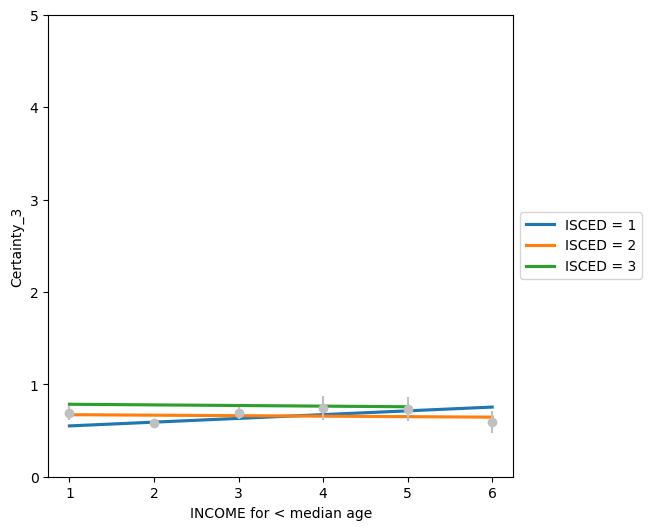

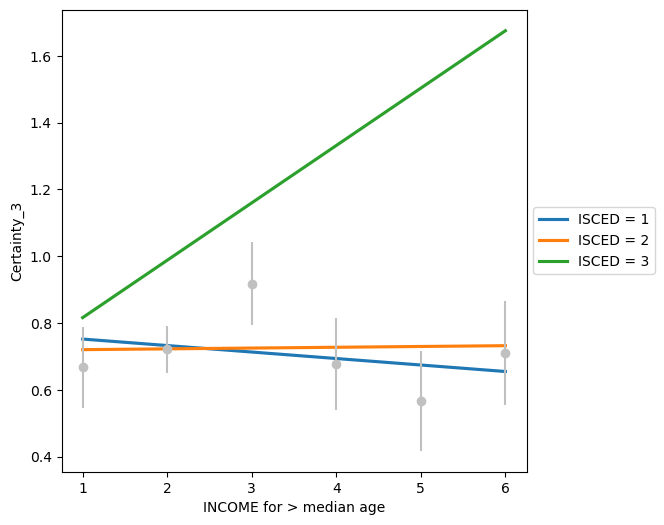

In [141]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Certainty_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Certainty_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Certainty_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['Certainty_3'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['Certainty_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Certainty_3', xlabel='INCOME for < median age',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['Certainty_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['Certainty_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['Certainty_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] > age_m)  ].groupby(['income'])['Certainty_3'].mean(), yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['income'])['Certainty_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Certainty_3', xlabel='INCOME for > median age')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

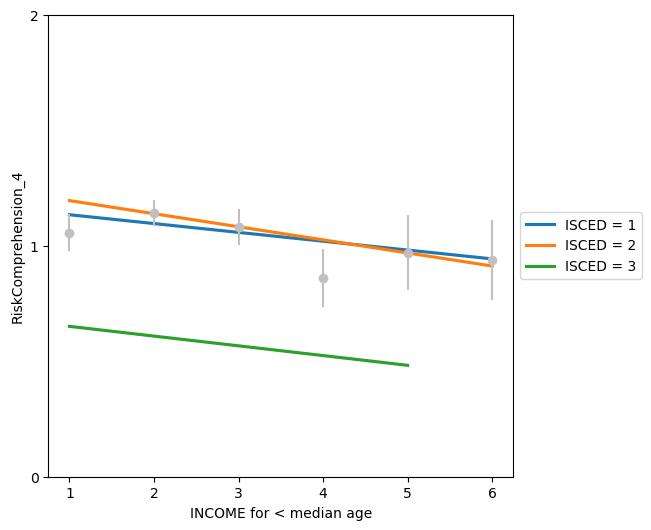

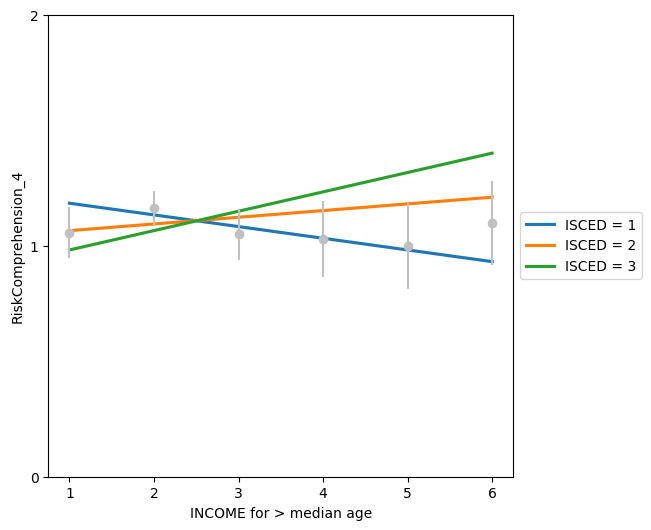

In [142]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['RiskComprehension_4'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['RiskComprehension_4'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='RiskComprehension_4', xlabel='INCOME for < median age',  yticks = np.arange(0, 3 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] > age_m)  ].groupby(['income'])['RiskComprehension_4'].mean(), yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['income'])['RiskComprehension_4'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='RiskComprehension_4', xlabel='INCOME for > median age',  yticks = np.arange(0, 3 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

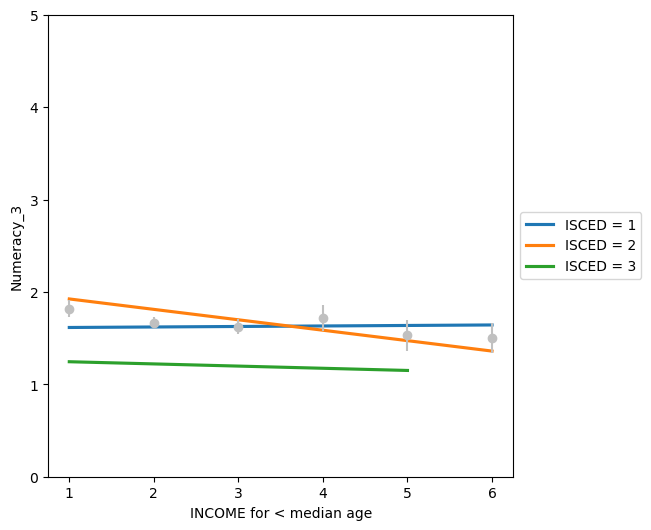

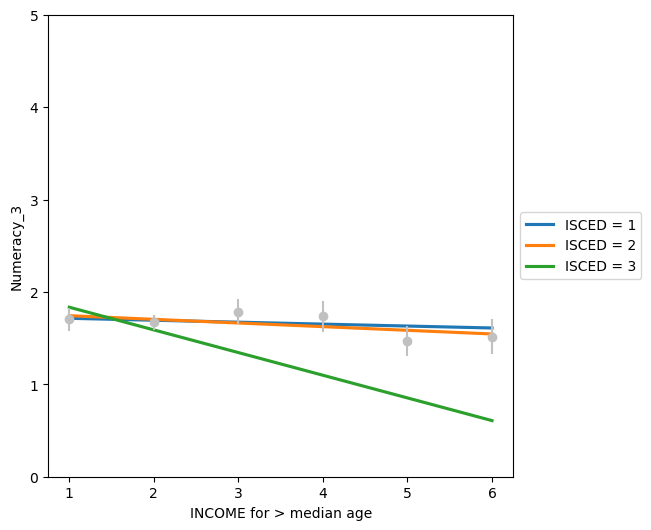

In [143]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['Numeracy_3'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['Numeracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Numeracy_3', xlabel='INCOME for < median age',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] > age_m)  ].groupby(['income'])['Numeracy_3'].mean(), yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['income'])['Numeracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Numeracy_3', xlabel='INCOME for > median age',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

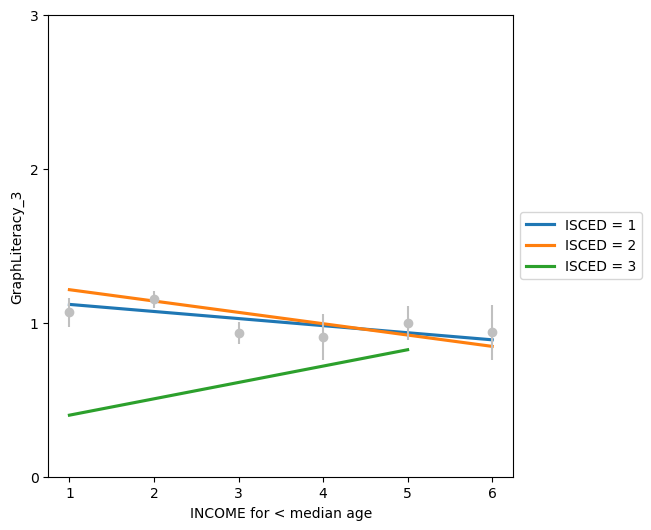

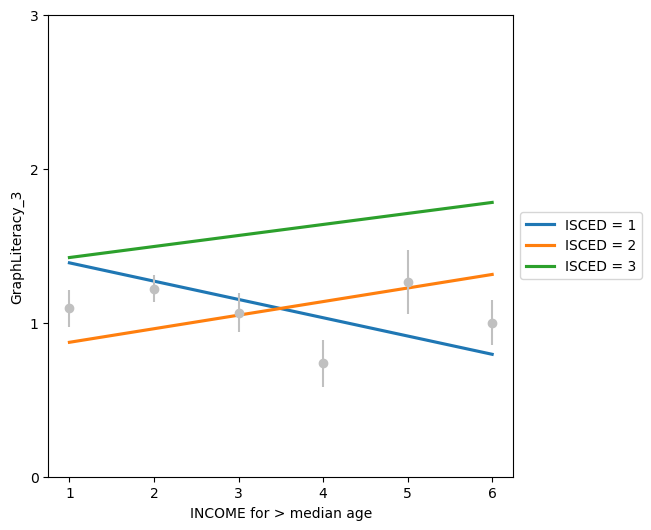

In [144]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['GraphLiteracy_3'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='GraphLiteracy_3', xlabel='INCOME for < median age',  yticks = np.arange(0, 4 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] > age_m)  ].groupby(['income'])['GraphLiteracy_3'].mean(), yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['income'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='GraphLiteracy_3', xlabel='INCOME for > median age',  yticks = np.arange(0, 4 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

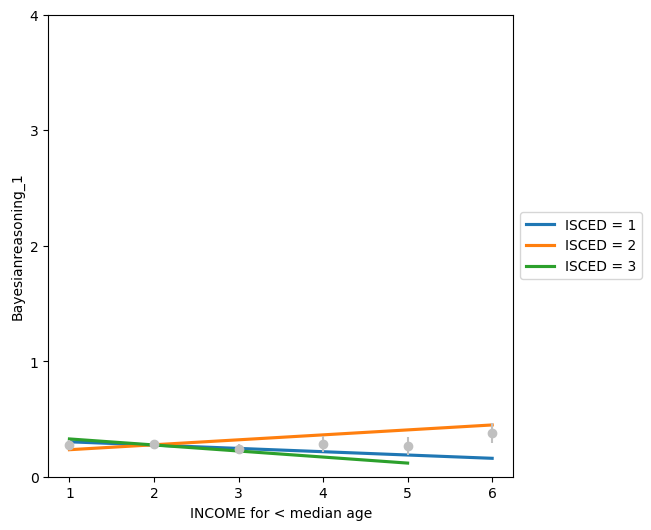

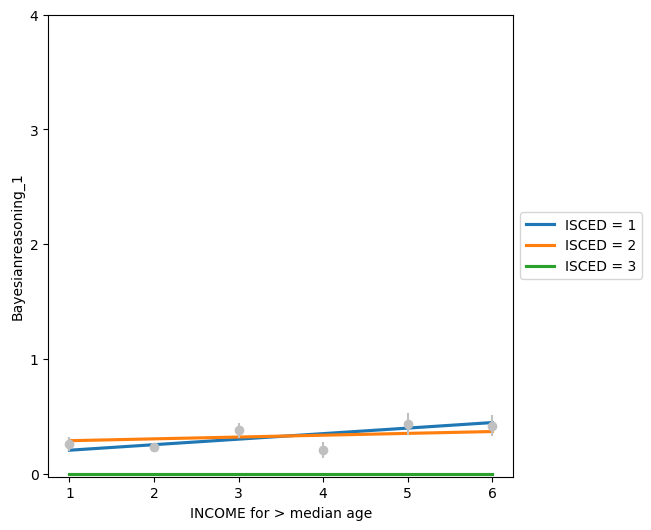

In [145]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['Bayesianreasoning_1'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Bayesianreasoning_1', xlabel='INCOME for < median age',  yticks = np.arange(0, 5 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] > age_m)  ].groupby(['income'])['Bayesianreasoning_1'].mean(), yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['income'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Bayesianreasoning_1', xlabel='INCOME for > median age',  yticks = np.arange(0, 5 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()